<a href="https://colab.research.google.com/github/XSIUUU/Ice-Cream-Truck-Sales-Data-Analysis/blob/main/DAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data Analytics for Performance Management

Authors:
* Maria Niki Antonopoulou - S5803047
* Elisabeta Veliaj - S5792010
* Zhilin Chen - S4119568
* Yichong Tao - S5065623
* Nanyun Zhang - S5658292

# Data Analytics for a family-owned ice cream van business

## Introduction

In today's competitive retail landscape, leveraging data analytics is essential for optimizing operations and enhancing performance. This analysis focuses on a family-owned ice cream van business operated by two sisters, Lily and Suzy. They alternate management of the van daily—Lily on odd-numbered days and Suzy on even-numbered days. Each sister independently handles procurement decisions based on her sales estimates and the remaining stock from the previous day. Recognizing the challenges of manual estimation and the potential for inefficiencies, they seek a data-driven approach to improve their procurement forecasting, evaluate their individual sales performance, and establish a fair profit-sharing mechanism.

### Business Challenge

The primary challenges faced by Lily and Suzy include:

1. Procurement Inefficiencies: Without accurate forecasts, they risk stockouts or overstocking, leading to lost sales opportunities or increased operational costs due to unsold inventory.

2. Performance Evaluation: Determining who outperforms in sales is complicated without a systematic analysis, especially considering external factors like weather and seasonal demand that influence sales.

3. Fair Profit-Sharing: Establishing an equitable profit-sharing model is challenging without a clear understanding of each sister's contribution to the business's profitability.

4. Impact of Product Profit Margins: With varying profit margins between drinks and ice creams, it's crucial to understand how these differences affect overall profitability and individual performance metrics.

### Objectives of the Analysis
To address these challenges, the analysis aims to achieve the following objectives:

* Procurement Forecasting: Develop a
predictive model using regression analysis to forecast the daily quantity of each product that needs to be stocked. This model will consider factors such as the day of the week, month, weather conditions, and temperature ranges.

* Performance Analysis: Evaluate and compare the sales performance of Lily and Suzy by analyzing total and average daily sales. This includes assessing sales efficiency and determining if any statistically significant differences exist between their performances.

* Key Performance Indicators (KPIs): Propose ideal KPIs that account for external factors affecting sales, such as weather conditions and temperature. These KPIs will help Lily and Suzy monitor and improve their performance more effectively.

* Profit-Sharing Proposal: Develop a fair profit-sharing mechanism based on sales performance and product profitability. The proposal will consider both total sales contributions and efficiency metrics to ensure fairness and motivation.

* Profit Margin Impact Analysis: Analyze how different profit margins between drinks and ice creams influence the profit-sharing model and procurement strategy. This will help in making informed decisions about product focus and inventory management.


### The dataset

The dataset is obtained from Kaggle: https://www.kaggle.com/datasets/nicklansley/icecream-data/data

It covers one full year and includes:

**Sales Transactions Dataset:**
Individual sales transactions for 10 products sold from the ice cream van.

Each transaction records:
* Date of sale
* Product ID and name
* Quantity sold
* Price per unit

**Weather and Temperature Dataset:**
Daily weather conditions and temperature ranges corresponding to the sales dates.
Each record includes:
* Date
* Weather condition (e.g., sunny, cloudy, rainy)
* Temperature range (e.g., cool, warm, hot)

An integrated 'main' dataset is also available, which combines the sales transactions with weather and temperature data, grouping weather and temperature into categories.

Lastly, we have the product information in a `csv` file as well.

##Task 1: Data Exploration and Preprocessing

---

With the first command we are connecting to the drive, where our datasets are located.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In order to correctly merge the tables, we are making sure the date is in standard format converting date and time information into a consistent and comparable format. Next we are merging the DataFrames sale transactions, and weather and temperature into a single Dataframe based on matching dates. We then save the merged dataset to a CSV file.

In [ ]:
import pandas as pd

date_weather_temp = pd.read_csv("/content/drive/Shareddrives/Tutorial |   Data Analytics for Perfomance Management | Group 8/OurData/date_weather_temp.csv")
date_weather_temp["weather_date"] = pd.to_datetime(date_weather_temp['weather_date']).dt.date
print(date_weather_temp)


    weather_date dominant_weather_type dominant_temp_category
0     2019-01-04                 windy                   cool
1     2019-01-18                 windy                   cool
2     2019-01-24                 rainy                   cool
3     2019-01-27                 windy                   cool
4     2019-01-28                 rainy                   cool
..           ...                   ...                    ...
296   2019-12-22                 windy                   cool
297   2019-12-23                 windy                   cool
298   2019-12-24                 windy                   cool
299   2019-12-27                 rainy                   cool
300   2019-12-30                 windy                   cool

[301 rows x 3 columns]


In [ ]:
transactions = pd.read_csv("/content/drive/Shareddrives/Tutorial |   Data Analytics for Perfomance Management | Group 8/OurData/transactions.csv")
transactions['sales_date'] = pd.to_datetime(transactions['sales_date_time']).dt.date
print(transactions)

             sales_date_time           gtin  sales_amount  sales_date
0        2019-01-04 13:00:08  8000920461235             1  2019-01-04
1        2019-01-04 13:00:11  8711327489608             1  2019-01-04
2        2019-01-04 13:00:12  4060800171900             1  2019-01-04
3        2019-01-04 13:00:13  8720000066784             1  2019-01-04
4        2019-01-04 13:00:13  5017726133887             1  2019-01-04
...                      ...            ...           ...         ...
1182222  2019-12-30 13:59:30  8711918648606             1  2019-12-30
1182223  2019-12-30 13:59:34  8711327489608             1  2019-12-30
1182224  2019-12-30 13:59:35  8000920461235             1  2019-12-30
1182225  2019-12-30 13:59:35  8711327313712             1  2019-12-30
1182226  2019-12-30 13:59:43  5017726170196             1  2019-12-30

[1182227 rows x 4 columns]


In [ ]:
products = pd.read_csv("/content/drive/Shareddrives/Tutorial |   Data Analytics for Perfomance Management | Group 8/OurData/products.csv")
print(products)

            gtin                                 product_name  price
0  8711327480537  Magnum Double Gold Caramel Billionaire 85ml   2.99
1  8000920461235                           Calippo Cola 105ml   1.99
2  8711327319714                      Cornetto Classico 120ml   3.99
3  8711327489608                Cornetto Soft Chocolate 140ml   3.99
4  8711918648606                     Walls Feast Classic 90ml   1.99
5  8711327313712                    Magnum Vegan Classic 90ml   2.99
6  8720000066784                           Solero Exotic 90ml   1.99
7  5017726133887              Coca-Cola Soft Drink Can 330 ml   1.49
8  4060800171900              Pepsi Regular Cola 330ml bottle   1.49
9  5017726170196   Fanta Zero Orange Soft Drink Bottle 500 ml   2.49


In [ ]:
main= pd.read_csv("/content/drive/Shareddrives/Tutorial |   Data Analytics for Perfomance Management | Group 8/OurData/main_product_sales_weather_view.csv")
main_dataset = pd.read_csv("/content/drive/Shareddrives/Tutorial |   Data Analytics for Perfomance Management | Group 8/OurData/main_product_sales_weather_view.csv")
print(main)

      sales_date                GTIN  \
0     2019-01-04  GTIN-4060800171900   
1     2019-01-04  GTIN-5017726133887   
2     2019-01-04  GTIN-5017726170196   
3     2019-01-04  GTIN-8000920461235   
4     2019-01-04  GTIN-8711327313712   
...          ...                 ...   
3005  2019-12-30  GTIN-8711327319714   
3006  2019-12-30  GTIN-8711327480537   
3007  2019-12-30  GTIN-8711327489608   
3008  2019-12-30  GTIN-8711918648606   
3009  2019-12-30  GTIN-8720000066784   

                                     product_name weekday_name month_name  \
0                 Pepsi Regular Cola 330ml bottle          FRI        JAN   
1                 Coca-Cola Soft Drink Can 330 ml          FRI        JAN   
2      Fanta Zero Orange Soft Drink Bottle 500 ml          FRI        JAN   
3                              Calippo Cola 105ml          FRI        JAN   
4                       Magnum Vegan Classic 90ml          FRI        JAN   
...                                           ...        

Next we are importing pandas and read the data files (weather and temperature, sales transaction, and products).

**Data Integration**

In [ ]:
date_weather_temp["weather_date"] = pd.to_datetime(date_weather_temp['weather_date']).dt.date
transactions['sales_date'] = pd.to_datetime(transactions['sales_date_time']).dt.date

# Merge
merged_data = pd.merge(
    transactions,
    date_weather_temp,
    left_on='sales_date',
    right_on='weather_date',
    how='left'
)
# Main_Merge_data
main_merged_data = pd.merge(
    main_dataset,
    products,
    left_on='product_name',
    right_on='product_name',
    how='left'
)

merged_data.to_csv('/content/drive/Shareddrives/Tutorial |   Data Analytics for Perfomance Management | Group 8/OurData/merged_data.csv', index=False)
merged_data


,sales_date_time,gtin,sales_amount,sales_date,weather_date,dominant_weather_type,dominant_temp_category
0,2019-01-04 13:00:08,8000920461235,1,2019-01-04,2019-01-04,windy,cool
1,2019-01-04 13:00:11,8711327489608,1,2019-01-04,2019-01-04,windy,cool
2,2019-01-04 13:00:12,4060800171900,1,2019-01-04,2019-01-04,windy,cool
3,2019-01-04 13:00:13,8720000066784,1,2019-01-04,2019-01-04,windy,cool
4,2019-01-04 13:00:13,5017726133887,1,2019-01-04,2019-01-04,windy,cool
...,...,...,...,...,...,...,...
1182222,2019-12-30 13:59:30,8711918648606,1,2019-12-30,2019-12-30,windy,cool
1182223,2019-12-30 13:59:34,8711327489608,1,2019-12-30,2019-12-30,windy,cool
1182224,2019-12-30 13:59:35,8000920461235,1,2019-12-30,2019-12-30,windy,cool
1182225,2019-12-30 13:59:35,8711327313712,1,2019-12-30,2019-12-30,windy,cool


**Data Cleaning**

In [ ]:
merged_data.isnull().sum()

,0
sales_date_time,0
gtin,0
sales_amount,0
sales_date,0
weather_date,0
dominant_weather_type,0
dominant_temp_category,0


In [ ]:
#check for unique values across features
for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values in '{column}' ({len(unique_values)}):")
    print(unique_values)
    print("-" * 50)

Unique values in 'sales_date_time' (1002505):
['2019-01-04 13:00:08' '2019-01-04 13:00:11' '2019-01-04 13:00:12' ...
 '2019-12-30 13:59:34' '2019-12-30 13:59:35' '2019-12-30 13:59:43']
--------------------------------------------------
Unique values in 'gtin' (10):
[8000920461235 8711327489608 4060800171900 8720000066784 5017726133887
 5017726170196 8711327480537 8711327313712 8711327319714 8711918648606]
--------------------------------------------------
Unique values in 'sales_amount' (3):
[1 2 3]
--------------------------------------------------
Unique values in 'sales_date' (301):
[datetime.date(2019, 1, 4) datetime.date(2019, 1, 18)
 datetime.date(2019, 1, 24) datetime.date(2019, 1, 27)
 datetime.date(2019, 1, 28) datetime.date(2019, 1, 29)
 datetime.date(2019, 2, 6) datetime.date(2019, 2, 7)
 datetime.date(2019, 2, 10) datetime.date(2019, 2, 11)
 datetime.date(2019, 2, 12) datetime.date(2019, 2, 16)
 datetime.date(2019, 2, 19) datetime.date(2019, 2, 26)
 datetime.date(2019, 2, 2

In [ ]:
# Check for duplicate rows
duplicates = merged_data.duplicated()

# Display duplicate rows
print(merged_data[duplicates])


Empty DataFrame
Columns: [sales_date_time, gtin, sales_amount, sales_date, weather_date, dominant_weather_type, dominant_temp_category]
Index: []


**Feature Engineering**

In [ ]:
# 1. Convert sales_date to date
main_merged_data['sales_date'] = pd.to_datetime(main_merged_data['sales_date'])

# 2. Converting product_name, dominant_weather_type and dominant_temp_category to dummy variables
main_merged_data = pd.get_dummies(main_merged_data, columns=['product_name', 'dominant_weather_type', 'dominant_temp_category'], drop_first=True, dtype=int)

# Extract the day of the month
main_merged_data['day_of_month'] = main_merged_data['sales_date'].dt.day
# Assign the manager based on the day of the month
main_merged_data['manager'] = main_merged_data['day_of_month'].apply(lambda x: 'Lily' if x % 2 != 0 else 'Suzy')


# 3. Convert weekday_name and month_name to integers.
# Customised mapping tables
weekday_mapping = {'MON': 1, 'TUE': 2, 'WED': 3, 'THU': 4, 'FRI': 5, 'SAT': 6, 'SUN': 7}
month_mapping = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

# Applying the mapping
main_merged_data['weekday_name'] = main_merged_data['weekday_name'].map(weekday_mapping)
main_merged_data['month_name'] = main_merged_data['month_name'].map(month_mapping)

# Inspection
print(main_merged_data.dtypes)
print(main_merged_data.head())

sales_date                                                  datetime64[ns]
GTIN                                                                object
weekday_name                                                         int64
month_name                                                           int64
daily_sales_count                                                    int64
daily_sales_value                                                  float64
gtin                                                                 int64
price                                                              float64
product_name_Coca-Cola Soft Drink Can 330 ml                         int64
product_name_Cornetto Classico 120ml                                 int64
product_name_Cornetto Soft Chocolate 140ml                           int64
product_name_Fanta Zero Orange Soft Drink Bottle 500 ml              int64
product_name_Magnum Double Gold Caramel Billionaire 85ml             int64
product_name_Magnum Vegan

We thoroughly examined our dataset for null values, duplicate entries, and inconsistencies in unique values and ranges. No anomalies or inconsistencies were identified during this review.

In [ ]:
 # we create a copy of our current dataset to use it in task 2 for easier use
eda_df = merged_data.copy()
merged_data

,sales_date_time,gtin,sales_amount,sales_date,weather_date,dominant_weather_type,dominant_temp_category
0,2019-01-04 13:00:08,8000920461235,1,2019-01-04,2019-01-04,windy,cool
1,2019-01-04 13:00:11,8711327489608,1,2019-01-04,2019-01-04,windy,cool
2,2019-01-04 13:00:12,4060800171900,1,2019-01-04,2019-01-04,windy,cool
3,2019-01-04 13:00:13,8720000066784,1,2019-01-04,2019-01-04,windy,cool
4,2019-01-04 13:00:13,5017726133887,1,2019-01-04,2019-01-04,windy,cool
...,...,...,...,...,...,...,...
1182222,2019-12-30 13:59:30,8711918648606,1,2019-12-30,2019-12-30,windy,cool
1182223,2019-12-30 13:59:34,8711327489608,1,2019-12-30,2019-12-30,windy,cool
1182224,2019-12-30 13:59:35,8000920461235,1,2019-12-30,2019-12-30,windy,cool
1182225,2019-12-30 13:59:35,8711327313712,1,2019-12-30,2019-12-30,windy,cool


In [ ]:
# Converting product_name, dominant_weather_type and dominant_temp_category to dummy variables
merged_data = pd.get_dummies(merged_data, columns=['dominant_weather_type', 'dominant_temp_category'], drop_first=False, dtype=int)


In [ ]:
# Ensure sales_date is a datetime object
merged_data['sales_date'] = pd.to_datetime(merged_data['sales_date'], errors='coerce')

# Extract the day of the month
merged_data['day_of_month'] = merged_data['sales_date'].dt.day

# Assign the manager based on the day of the month
merged_data['manager'] = merged_data['day_of_month'].apply(lambda x: 'Lily' if x % 2 != 0 else 'Suzy')

# Create a binary variable: 1 for Lily, 0 for Suzy
merged_data['manager_binary'] = merged_data['manager'].apply(lambda x: 1 if x == 'Lily' else 0)
merged_data = merged_data.drop(columns=['manager', 'weather_date'])

# Display the updated DataFrame
print(merged_data)


             sales_date_time           gtin  sales_amount sales_date  \
0        2019-01-04 13:00:08  8000920461235             1 2019-01-04   
1        2019-01-04 13:00:11  8711327489608             1 2019-01-04   
2        2019-01-04 13:00:12  4060800171900             1 2019-01-04   
3        2019-01-04 13:00:13  8720000066784             1 2019-01-04   
4        2019-01-04 13:00:13  5017726133887             1 2019-01-04   
...                      ...            ...           ...        ...   
1182222  2019-12-30 13:59:30  8711918648606             1 2019-12-30   
1182223  2019-12-30 13:59:34  8711327489608             1 2019-12-30   
1182224  2019-12-30 13:59:35  8000920461235             1 2019-12-30   
1182225  2019-12-30 13:59:35  8711327313712             1 2019-12-30   
1182226  2019-12-30 13:59:43  5017726170196             1 2019-12-30   

         dominant_weather_type_cloudy  dominant_weather_type_rainy  \
0                                   0                            

In [ ]:
# Ensure sales_date is a datetime object
merged_data['sales_date'] = pd.to_datetime(merged_data['sales_date'], errors='coerce')

# Extract the day of the month
merged_data['day_of_month'] = merged_data['sales_date'].dt.day

# Assign the manager based on the day of the month
merged_data['manager'] = merged_data['day_of_month'].apply(lambda x: 'Lily' if x % 2 != 0 else 'Suzy')

# Create a binary variable: 1 for Lily, 0 for Suzy
merged_data['manager_binary'] = merged_data['manager'].apply(lambda x: 1 if x == 'Lily' else 0)

# Display the updated DataFrame
print(merged_data[['sales_date', 'day_of_month', 'manager', 'manager_binary']])
print(merged_data)


        sales_date  day_of_month manager  manager_binary
0       2019-01-04             4    Suzy               0
1       2019-01-04             4    Suzy               0
2       2019-01-04             4    Suzy               0
3       2019-01-04             4    Suzy               0
4       2019-01-04             4    Suzy               0
...            ...           ...     ...             ...
1182222 2019-12-30            30    Suzy               0
1182223 2019-12-30            30    Suzy               0
1182224 2019-12-30            30    Suzy               0
1182225 2019-12-30            30    Suzy               0
1182226 2019-12-30            30    Suzy               0

[1182227 rows x 4 columns]
             sales_date_time           gtin  sales_amount sales_date  \
0        2019-01-04 13:00:08  8000920461235             1 2019-01-04   
1        2019-01-04 13:00:11  8711327489608             1 2019-01-04   
2        2019-01-04 13:00:12  4060800171900             1 2019-01-04   


## Task 2: Exploratory Data Analysis (EDA)

---
In this task, we extend our dataset to include additional details, and extract valuable insights about sales patterns. The ultimate goal is to uncover trends, relationships, and anomalies that can inform better decision-making for Lily and Suzy’s ice cream van business.

In [ ]:
# we use the eda_df for this part as it is easier without the dummified features
# Merge with the products dataset
eda_df = pd.merge(
    eda_df,
    products,
    on='gtin',  # Merge on the common column 'gtin'
    how='left',  # Use inner join to keep only matching rows
)

# Display a sample of the merged data
print(eda_df.head(20))


        sales_date_time           gtin  sales_amount  sales_date weather_date  \
0   2019-01-04 13:00:08  8000920461235             1  2019-01-04   2019-01-04   
1   2019-01-04 13:00:11  8711327489608             1  2019-01-04   2019-01-04   
2   2019-01-04 13:00:12  4060800171900             1  2019-01-04   2019-01-04   
3   2019-01-04 13:00:13  8720000066784             1  2019-01-04   2019-01-04   
4   2019-01-04 13:00:13  5017726133887             1  2019-01-04   2019-01-04   
5   2019-01-04 13:00:14  5017726170196             1  2019-01-04   2019-01-04   
6   2019-01-04 13:00:28  4060800171900             1  2019-01-04   2019-01-04   
7   2019-01-04 13:00:31  8000920461235             1  2019-01-04   2019-01-04   
8   2019-01-04 13:00:38  8711327480537             1  2019-01-04   2019-01-04   
9   2019-01-04 13:00:40  8711327313712             1  2019-01-04   2019-01-04   
10  2019-01-04 13:00:42  8711327319714             1  2019-01-04   2019-01-04   
11  2019-01-04 13:00:47  871

We integrated the products dataset with the existing eda_df using the gtin column as the common key. This step enriches the dataset by adding product-specific details, such as product_name and price, to each sales transaction. The updated dataset is saved as merged_data.csv for further use.

In [ ]:
# Step 1: Convert `sales_date` to datetime and extract weekday and month names
eda_df["sales_date"] = pd.to_datetime(eda_df["sales_date"])
eda_df["weekday_name"] = eda_df["sales_date"].dt.strftime("%a").str.upper()  # Mon, Tue, etc.
eda_df["month_name"] = eda_df["sales_date"].dt.strftime("%b").str.upper()   # Jan, Feb, etc.

# Step 2: Aggregate data to compute daily_sales_count and daily_sales_value
eda_df = eda_df.groupby(["sales_date", "product_name", "gtin", "price", "weekday_name", "month_name","dominant_weather_type", "dominant_temp_category"]).agg(
    daily_sales_count=("sales_amount", "sum")
).reset_index()

# Step 3: Calculate `daily_sales_value` as daily_sales_count * price
eda_df["daily_sales_value"] = eda_df["daily_sales_count"] * eda_df["price"]
eda_df

,sales_date,product_name,gtin,price,weekday_name,month_name,dominant_weather_type,dominant_temp_category,daily_sales_count,daily_sales_value
0,2019-01-04,Calippo Cola 105ml,8000920461235,1.99,FRI,JAN,windy,cool,72,143.28
1,2019-01-04,Coca-Cola Soft Drink Can 330 ml,5017726133887,1.49,FRI,JAN,windy,cool,80,119.20
2,2019-01-04,Cornetto Classico 120ml,8711327319714,3.99,FRI,JAN,windy,cool,68,271.32
3,2019-01-04,Cornetto Soft Chocolate 140ml,8711327489608,3.99,FRI,JAN,windy,cool,60,239.40
4,2019-01-04,Fanta Zero Orange Soft Drink Bottle 500 ml,5017726170196,2.49,FRI,JAN,windy,cool,96,239.04
...,...,...,...,...,...,...,...,...,...,...
3005,2019-12-30,Magnum Double Gold Caramel Billionaire 85ml,8711327480537,2.99,MON,DEC,windy,cool,82,245.18
3006,2019-12-30,Magnum Vegan Classic 90ml,8711327313712,2.99,MON,DEC,windy,cool,73,218.27
3007,2019-12-30,Pepsi Regular Cola 330ml bottle,4060800171900,1.49,MON,DEC,windy,cool,102,151.98
3008,2019-12-30,Solero Exotic 90ml,8720000066784,1.99,MON,DEC,windy,cool,92,183.08


In [ ]:

# Define a mapping for product names to product types
product_mapping = {
    'Calippo Cola 105ml': 0,
    'Coca-Cola Soft Drink Can 330 ml': 1,
    'Cornetto Classico 120ml': 0,
    'Cornetto Soft Chocolate 140ml': 0,
    'Fanta Zero Orange Soft Drink Bottle 500 ml': 1,
    'Pepsi Regular Cola 330ml bottle': 1,
    'Magnum Double Gold Caramel Billionaire 85ml': 0,
    'Magnum Vegan Classic 90ml': 0,
    'Solero Exotic 90ml': 0,
    'Walls Feast Classic 90ml': 0
    # Add additional product mappings here as needed
}

# Map the product_type based on product_name
eda_df['product_type'] = eda_df['product_name'].map(product_mapping)

# Display the updated dataset
print(eda_df[['product_name', 'product_type']].head())


                                 product_name  product_type
0                          Calippo Cola 105ml             0
1             Coca-Cola Soft Drink Can 330 ml             1
2                     Cornetto Classico 120ml             0
3               Cornetto Soft Chocolate 140ml             0
4  Fanta Zero Orange Soft Drink Bottle 500 ml             1


Time-based features, such as weekday_name and month_name, were derived from the sales_date to allow analysis of temporal trends. Sales data was aggregated at a daily level to calculate daily_sales_count and daily_sales_value. These metrics provide insights into daily sales performance.

###Summary Statistics

---
Key summary statistics, such as mean, median, and variance, were calculated for daily sales counts by product. These statistics reveal patterns in product performance and variability, essential for inventory and sales strategy decisions.


In [ ]:
# Calculate summary statistics for each product (grouped by 'gtin' and 'product_name')

# Group the dataset by 'gtin' and 'product_name'
grouped = eda_df.groupby(['gtin', 'product_name'])

# Compute summary statistics
summary_stats = grouped['daily_sales_count'].agg(
    Mean='mean',
    Median='median',
    Min='min',
    Max='max',
    Count='count',
    Sum='sum',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    Range=lambda x: x.max() - x.min(),
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25),
    Variance='var',
    StdDev='std',
    Skewness=lambda x: (x.mean() - x.median()) / x.std() if x.std() != 0 else None
).reset_index()

print(summary_stats)

            gtin                                 product_name        Mean  \
0  4060800171900              Pepsi Regular Cola 330ml bottle  516.302326   
1  5017726133887              Coca-Cola Soft Drink Can 330 ml  514.159468   
2  5017726170196   Fanta Zero Orange Soft Drink Bottle 500 ml  512.272425   
3  8000920461235                           Calippo Cola 105ml  466.774086   
4  8711327313712                    Magnum Vegan Classic 90ml  431.534884   
5  8711327319714                      Cornetto Classico 120ml  380.850498   
6  8711327480537  Magnum Double Gold Caramel Billionaire 85ml  433.083056   
7  8711327489608                Cornetto Soft Chocolate 140ml  388.820598   
8  8711918648606                     Walls Feast Classic 90ml  468.471761   
9  8720000066784                           Solero Exotic 90ml  465.750831   

   Median  Min   Max  Count     Sum  Mode  Range    IQR       Variance  \
0   217.0   57  1330    301  155407   102   1273  803.0  187698.524961   
1   

### Visualization 1: Sales Trend

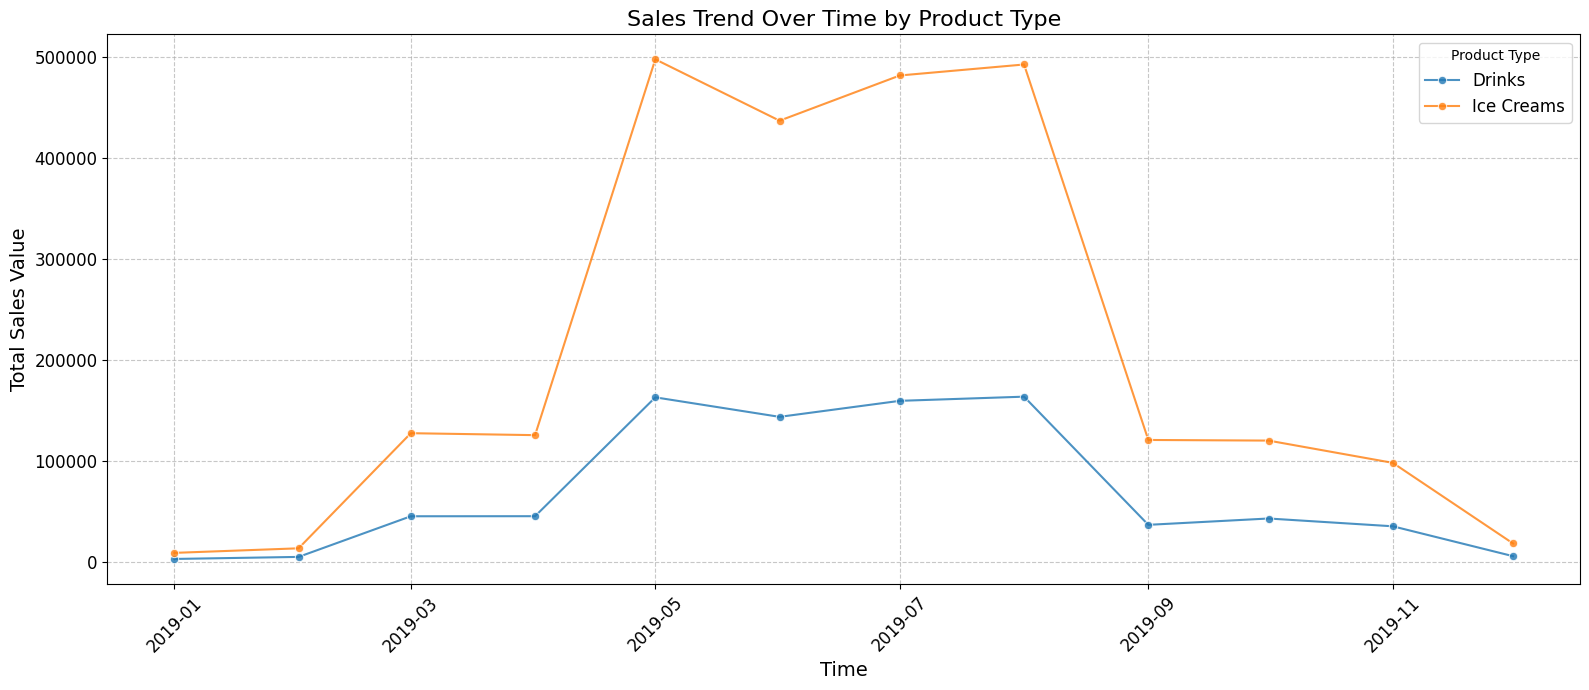

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert sales_date to datetime for easier manipulation
eda_df['sales_date'] = pd.to_datetime(eda_df['sales_date'])

# Map product_type values to descriptive labels
product_type_map = {0: 'Ice Creams', 1: 'Drinks'}
eda_df['product_type_label'] = eda_df['product_type'].map(product_type_map)

# Extract year and month from the date
eda_df['Year'] = eda_df['sales_date'].dt.year
eda_df['Month'] = eda_df['sales_date'].dt.month_name().str[:3]  # Shortened month name (e.g., Jan, Feb)

# Aggregate data: sum daily_sales_value by Year, Month, and product_type
monthly_sales = eda_df.groupby(['Year', 'Month', 'product_type_label'], as_index=False).agg(
    total_sales_value=('daily_sales_value', 'sum')
)

# Create a combined Year-Month column for clarity
monthly_sales['Year_Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month']

# Sort Year_Month for consistent plotting
monthly_sales['Year_Month'] = pd.to_datetime(monthly_sales['Year_Month'], format='%Y-%b')
monthly_sales = monthly_sales.sort_values('Year_Month')

# Visualization: Sales Trend Over Time
plt.figure(figsize=(16, 7))
sns.lineplot(
    data=monthly_sales,
    x='Year_Month',
    y='total_sales_value',
    hue='product_type_label',
    marker='o',
    linewidth=1.5,
    alpha=0.8
)
plt.title('Sales Trend Over Time by Product Type', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Sales Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Product Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


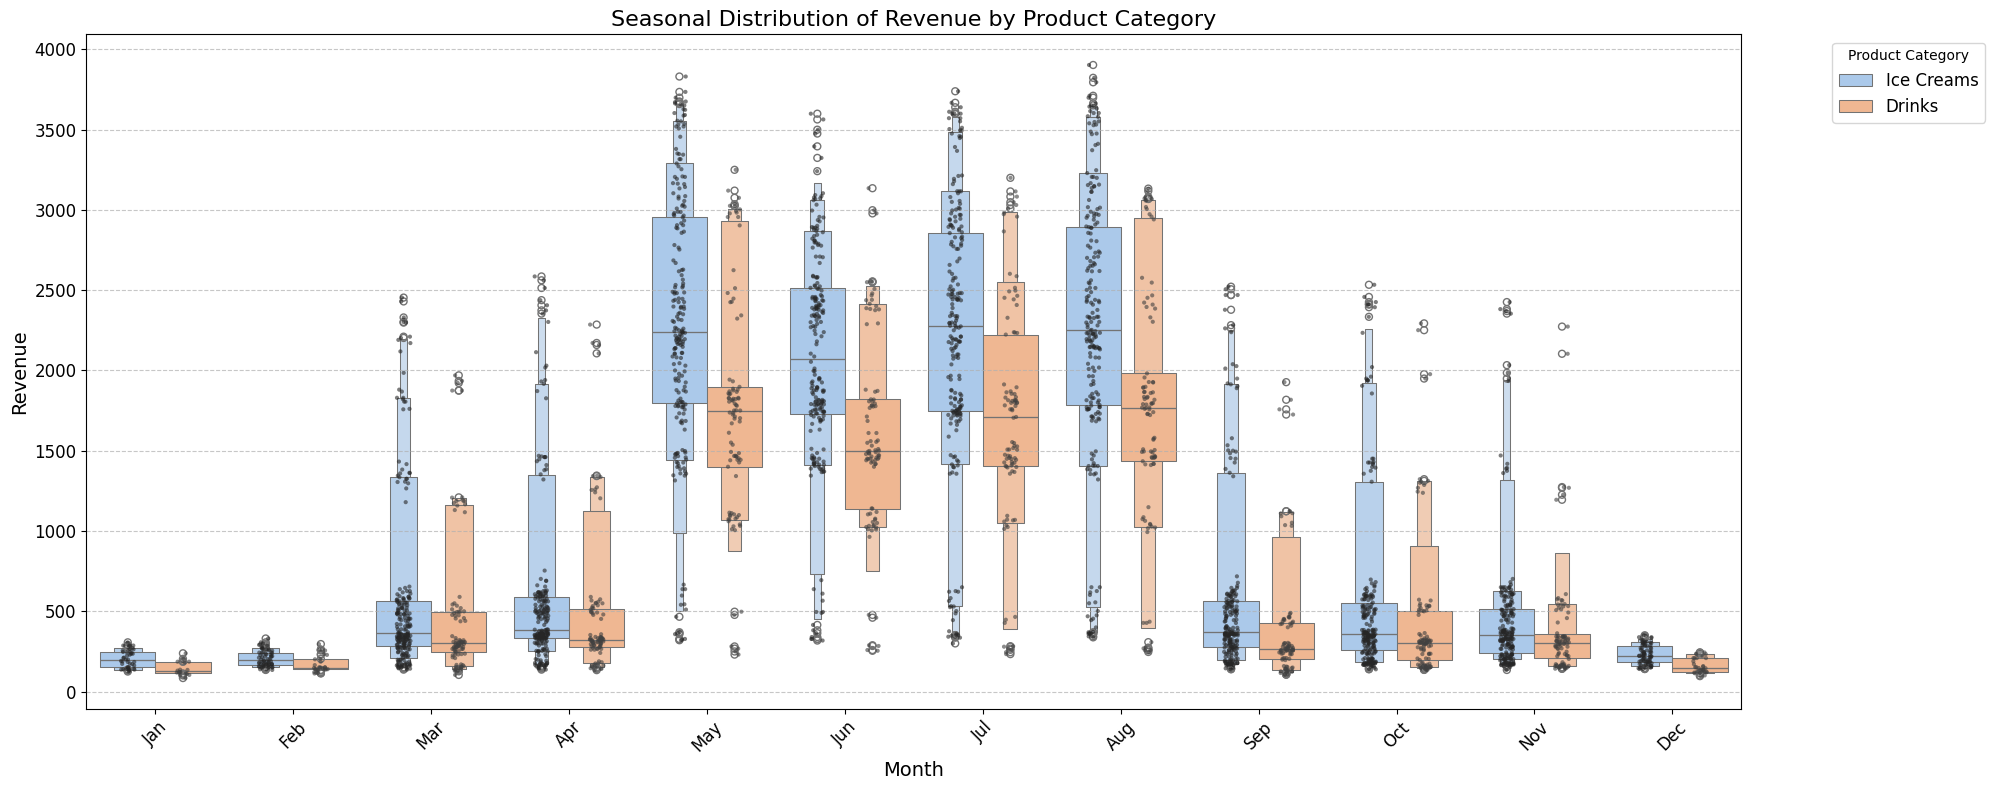

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
eda_df['sales_date'] = pd.to_datetime(eda_df['sales_date'])
product_type_map = {0: 'Ice Creams', 1: 'Drinks'}
eda_df['product_type_label'] = eda_df['product_type'].map(product_type_map)
eda_df['Month'] = eda_df['sales_date'].dt.month_name().str[:3]

# Define month order to ensure chronological plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
eda_df['Month'] = pd.Categorical(eda_df['Month'], categories=month_order, ordered=True)

# Visualization: Boxenplot with Stripplot
plt.figure(figsize=(20, 8))

# Boxenplot for seasonal revenue distribution
ax = sns.boxenplot(
    data=eda_df,
    x='Month',
    y='daily_sales_value',
    hue='product_type_label',
    palette='pastel',
    dodge=True
)

# Stripplot for individual data points (outliers)
sns.stripplot(
    data=eda_df,
    x='Month',
    y='daily_sales_value',
    hue='product_type_label',
    dodge=True,
    palette='dark:.25',
    alpha=0.6,
    jitter=True,  # Add jitter to spread out points
    size=3        # Reduce marker size
)

# Customize plot
plt.title('Seasonal Distribution of Revenue by Product Category', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend to avoid duplication
handles, labels = ax.get_legend_handles_labels()
# Since both boxenplot and stripplot add legends, we need to remove duplicates
n_product_types = len(product_type_map)
plt.legend(handles[:n_product_types], labels[:n_product_types],
           title='Product Category', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This line plot visualizes the daily sales trend over the year. The chart reveals periods of high activity interspersed with intervals of lower sales and vice versa. These patterns reflect seasonal demand, operational downtimes, or external factors like weather conditions.

#### Analysis of the Sales Trend Over Time

##### **1. Anomalies in the Plot**
- **Sudden Increase in Sales (Around March 2019):**
  - The sales trend shows a significant jump in total sales starting in **March 2019**, with values rising consistently to around 800–1200 units. This abrupt shift may indicate:
    - A change in the data collection process.
    - A new product launch or promotional campaign.
    - Seasonal demand starting from spring or early summer.

- **Sharp Decline (Around September 2019):**
  - After peaking mid-year, the sales trend drops sharply in **September 2019**, returning to levels observed before March. This could indicate:
    - The end of a seasonal product's peak period.
    - A change in market conditions, such as a competitor’s impact or reduced customer interest.
    - Inventory or supply chain issues leading to reduced sales.

- **Inconsistent Data Points:**
  - There are frequent spikes and drops in the sales data, particularly between **March and August 2019**, suggesting fluctuations in daily sales. These anomalies may be due to:
    - Weekend or holiday effects.
    - Large orders or bulk purchases on specific days.

---

##### **2. Seasonality**
- **Peak Period (Spring and Summer):**
  - The sustained high sales from **March to August 2019** suggest a seasonal trend. This aligns with warmer months in most regions, possibly driving demand for products like beverages, ice creams, or other summer-specific goods.

- **Off-Peak Period (Winter Months):**
  - Sales in the early months (**January to February**) and later months (**October to December**) are relatively low. This could indicate:
    - Reduced demand during colder months.
    - Seasonality affecting specific products.

- **Periodic Fluctuations:**
  - The graph shows recurring small dips and peaks during the high-sales period (March–August), potentially corresponding to:
    - Weekday vs. weekend sales patterns (e.g., higher sales on weekends).
    - Special promotions or events driving periodic boosts in sales.


---

#### Summary of Findings
- **Anomalies:** Significant increases in sales starting March 2019 and a sharp drop in September 2019. Fluctuations during peak periods suggest daily or weekly variations.
- **Seasonality:** Strong seasonal trend, with higher sales during warmer months (March–August) and lower sales during colder months (January–February and October–December).


### Visualization 2: Weekdays vs Weekends

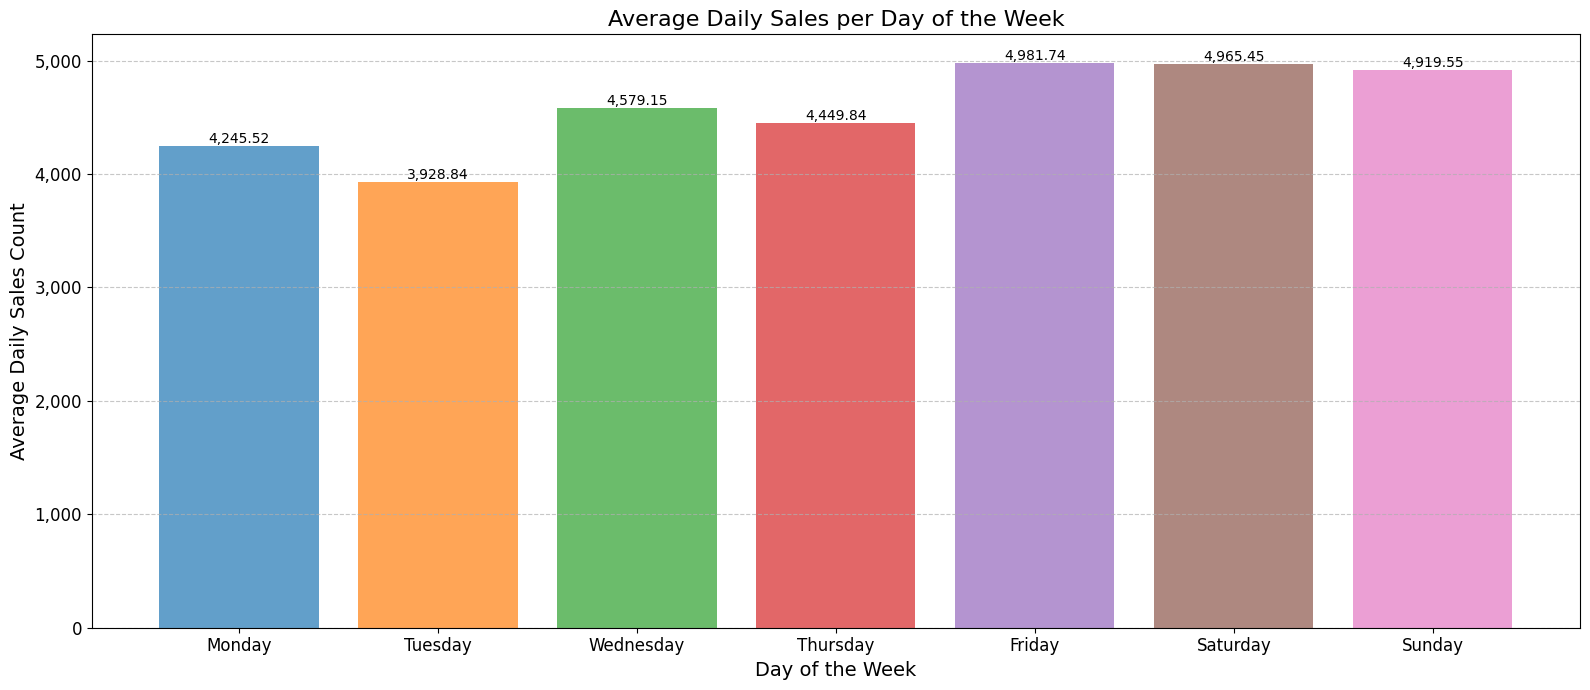

In [ ]:
# Visualization 2: Weekday vs Weekend Sales
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

daily_sales = eda_df.groupby(['sales_date', 'weekday_name'])['daily_sales_count'].sum().reset_index()

# Step 1: Aggregate total daily sales by summing 'daily_sales_count' across all products
daily_sales = eda_df.groupby(['sales_date', 'weekday_name'])['daily_sales_count'].sum().reset_index()

# Step 2: Define the order of the days and map to full names
day_order = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
full_day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a mapping from weekday abbreviation to full name and day number for sorting
day_mapping = {
    'MON': ('Monday', 0),
    'TUE': ('Tuesday', 1),
    'WED': ('Wednesday', 2),
    'THU': ('Thursday', 3),
    'FRI': ('Friday', 4),
    'SAT': ('Saturday', 5),
    'SUN': ('Sunday', 6)
}

# Add 'day_num' and 'full_day_name' columns for sorting and labeling
daily_sales['day_num'] = daily_sales['weekday_name'].map(lambda x: day_mapping[x][1])
daily_sales['full_day_name'] = daily_sales['weekday_name'].map(lambda x: day_mapping[x][0])

# Step 3: Calculate average daily sales for each day of the week
average_sales = daily_sales.groupby(['day_num', 'full_day_name'])['daily_sales_count'].mean().reset_index()

# Sort the DataFrame by 'day_num' to ensure the correct order (Monday to Sunday)
average_sales = average_sales.sort_values('day_num')

# Step 4: Define custom colors for each day
# Customize this list with any colors you prefer. Ensure there are 7 colors.
custom_colors = [
    '#1f77b4',  # Monday - Blue
    '#ff7f0e',  # Tuesday - Orange
    '#2ca02c',  # Wednesday - Green
    '#d62728',  # Thursday - Red
    '#9467bd',  # Friday - Purple
    '#8c564b',  # Saturday - Brown
    '#e377c2'   # Sunday - Pink
]

# Step 5: Define a custom formatter for large numbers
def format_large_numbers(x, pos):
    return f'{int(x):,}'  # Format numbers with commas

# Step 6: Plot average sales per day
plt.figure(figsize=(16, 7))
bars = plt.bar(
    average_sales['full_day_name'],
    average_sales['daily_sales_count'],
    color=custom_colors,
    alpha=0.7
)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_large_numbers))

# Add exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels and titles
plt.title('Average Daily Sales per Day of the Week', fontsize=16)
plt.ylabel('Average Daily Sales Count', fontsize=14)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

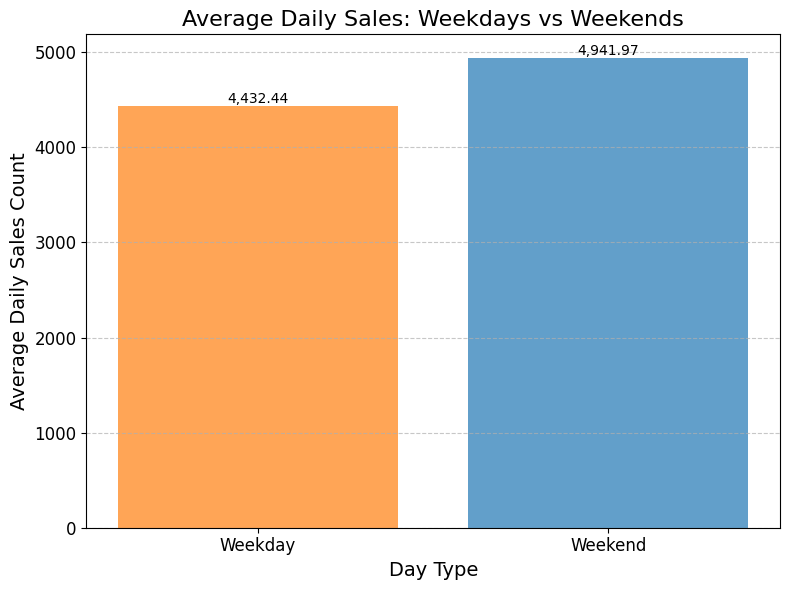

In [ ]:
# Step 1: Define weekdays and weekends
weekend_days = ['Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Step 2: Add a column to categorize days as 'Weekend' or 'Weekday'
daily_sales['day_type'] = daily_sales['full_day_name'].apply(
    lambda x: 'Weekend' if x in weekend_days else 'Weekday'
)

# Step 3: Calculate average daily sales for Weekends and Weekdays
weekend_weekday_avg = daily_sales.groupby('day_type')['daily_sales_count'].mean().reset_index()

# Step 4: Plot the data
plt.figure(figsize=(8, 6))

# Define custom colors for Weekend and Weekday
custom_colors = ['#ff7f0e', '#1f77b4']  # Orange for Weekend, Blue for Weekday

# Create the bar plot
bars = plt.bar(
    weekend_weekday_avg['day_type'],
    weekend_weekday_avg['daily_sales_count'],
    color=custom_colors,
    alpha=0.7
)

# Add exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:,.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels and titles
plt.title('Average Daily Sales: Weekdays vs Weekends', fontsize=16)
plt.ylabel('Average Daily Sales Count', fontsize=14)
plt.xlabel('Day Type', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


#### Analysis of Average Daily Sales per Day of the Week

This bar chart visualizes the **average daily sales count** for each day of the week, providing insights into how sales vary across the week.

---

### **1. Highest Average Sales Days**
- **Friday (4,981.74)** and **Saturday (4,965.45)** have the highest average daily sales.
  - This suggests that sales peak at the end of the workweek and during the weekend.
  - These peaks could be influenced by:
    - Increased consumer activity as people prepare for the weekend.
    - Higher shopping demand for leisure, groceries, or entertainment-related items.
    - Potentially more promotions or discounts offered on these days.

---

### **2. Lowest Average Sales Day**
- **Tuesday (3,928.84)** has the lowest average daily sales among all the days.
  - This indicates that Tuesday might be a slower day for sales, possibly due to:
    - Less consumer activity early in the workweek.
    - Minimal promotions or demand-driven sales on this day.

---

### **3. Mid-Week Sales Trends**
- **Monday (4,245.52), Wednesday (4,579.15), and Thursday (4,449.84)** show a moderate increase in sales compared to Tuesday but do not reach the levels of Friday or Saturday.
  - This steady rise could reflect:
    - Regular weekday consumer patterns as people gradually increase shopping activity toward the weekend.
    - Preparations for events or errands later in the week.

---

### **4. Weekend Sales Patterns**
- **Sunday (4,919.55)** has slightly lower sales than Friday and Saturday but is still one of the highest-performing days.
  - This could be due to:
    - Last-minute weekend shopping.
    - Restocking for the upcoming week.
    - Decreased activity later in the day as people wind down for the week.

---


### **Conclusion**
The sales pattern clearly highlights the importance of the weekend for business performance, with Friday and Saturday leading in sales. Midweek days like Tuesday present opportunities for growth through targeted strategies, while Monday, Wednesday, and Thursday maintain steady performance. Understanding these patterns allows businesses to optimize operations, marketing, and resource allocation effectively.

### Visualization 3: Correlation Heatmap

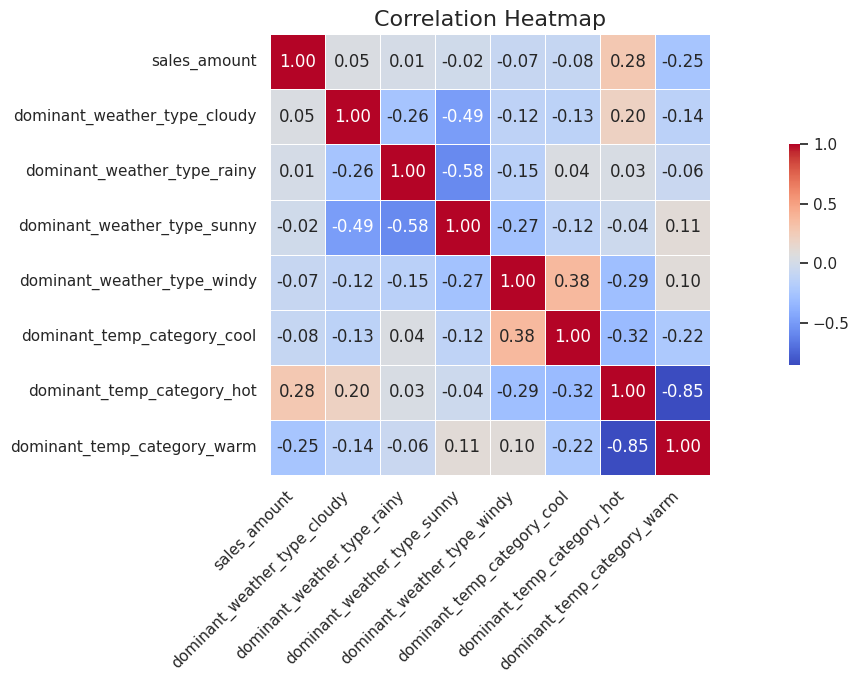

In [ ]:
# List of numerical and binary columns
numeric_cols = [
    'sales_amount',
    'dominant_weather_type_cloudy',
    'dominant_weather_type_rainy',
    'dominant_weather_type_sunny',
    'dominant_weather_type_windy',
    'dominant_temp_category_cool',
    'dominant_temp_category_hot',
    'dominant_temp_category_warm'
]

corr_matrix = merged_data[numeric_cols].corr()

# Set the size of the plot
plt.figure(figsize=(16, 7))

# Set up the matplotlib figure
sns.set(style='white')  # Set the style to white

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,  # Annotate cells with correlation coefficients
    fmt=".2f",   # Format the annotations to two decimal places
    cmap='coolwarm',  # Color map
    linewidths=.5,    # Width of the lines that divide the cells
    cbar_kws={"shrink": .5},  # Adjust the color bar size
    square=True  # Make the cells square-shaped
)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure y-axis labels are horizontal
plt.yticks(rotation=0)

# Adjust layout to make room for the title and labels
plt.tight_layout()

# Display the heatmap
plt.show()


#### Analysis of Heatmap

* Correlation with sales_amount
  * **hot temperature and sales (0.28)**: There is a weak-to-moderate positive correlation, suggesting that sales are slightly higher when the temperature is categorized as "hot".
  * **warm temperature and sales (-0.25)**: A weak-to-moderate negative correlation implies that sales decrease slightly when the temperature is categorized as "warm."
  * **sunny weather and sales (-0.02)**: Virtually no correlation, meaning sunny days do not have a noticeable impact on sales.
dominant_weather_type_rainy and sales_amount (0.01):
Similarly, rainy conditions have no significant effect on sales.

---

**Conclusions:** Many weather-related variables (e.g., dominant_weather_type_sunny) show little to no correlation with sales_amount. This could imply that sales patterns are relatively independent of specific weather conditions in the given dataset.

### Visualization 4: Sales by the hour

<ipython-input-26-84233ee82e9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friday_data['hour'] = friday_data['sales_date_time'].dt.hour


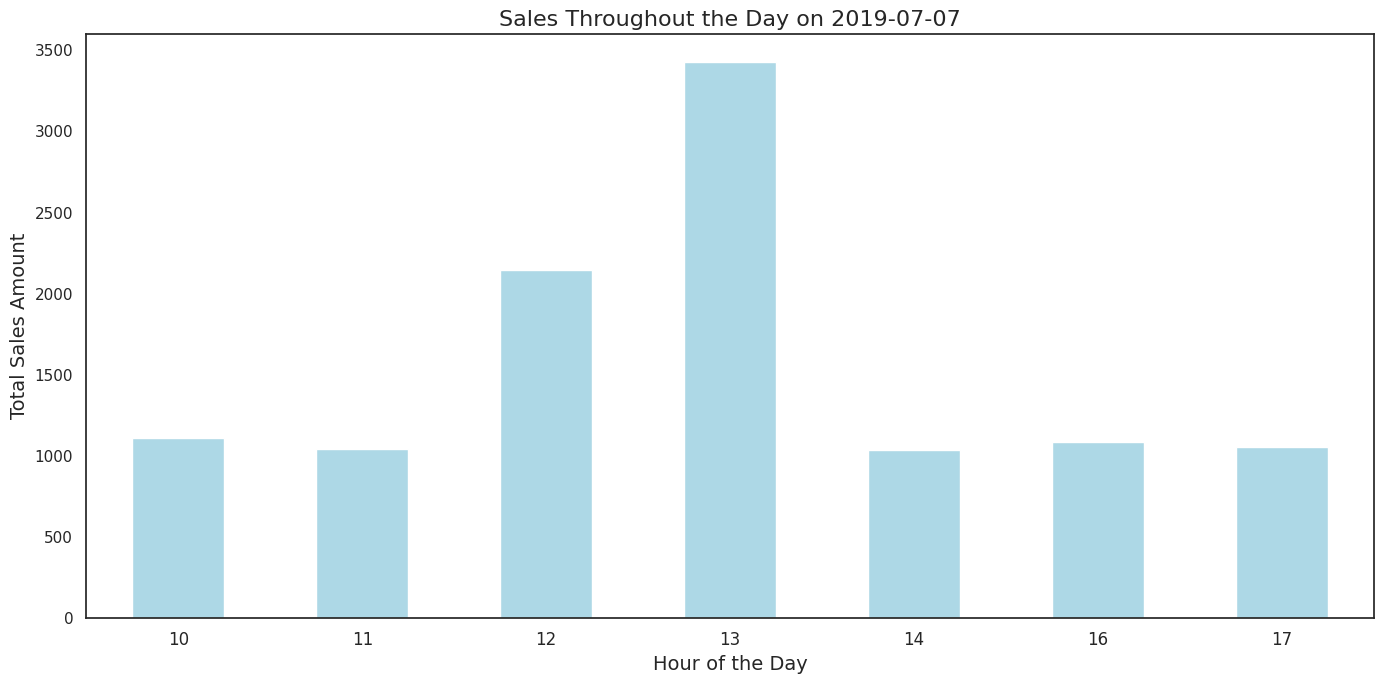

In [ ]:

# Ensure the sales_date_time column is in datetime format
merged_data['sales_date_time'] = pd.to_datetime(merged_data['sales_date_time'])

specific_friday = "2019-07-07"
friday_data = merged_data[merged_data['sales_date_time'].dt.date == pd.to_datetime(specific_friday).date()]

# Extract the hour from sales_date_time
friday_data['hour'] = friday_data['sales_date_time'].dt.hour

# Group by hour and calculate total sales
hourly_sales = friday_data.groupby('hour')['sales_amount'].sum()

# Plot the sales throughout the day
plt.figure(figsize=(14, 7))
hourly_sales.plot(kind='bar', color='lightblue')
plt.title(f'Sales Throughout the Day on {specific_friday}', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

####**Analysis of Sales by the hour**

This bar chart visualizes the **total sales amount** for different hours of the day on **2019-07-07**. Here's a detailed analysis of the trends and insights:

---

**Key Observations**
1. **Peak Sales Hour:**
   - The highest sales occur at **1 PM (13:00)**, where the total sales amount exceeds 3,500. This represents the **peak sales hour** of the day.
   - This peak could be driven by lunchtime traffic or a specific promotion/event around that time.

2. **Consistently Lower Sales in Early Morning and Afternoon:**
   - Sales between **10 AM (10:00)** and **11 AM (11:00)** remain steady but low, hovering around 1,000.
   - After the peak, sales drop significantly during **2 PM (14:00)**, **4 PM (16:00)**, and **5 PM (17:00)**, settling at a similar level to the morning.

3. **Gradual Build-Up:**
   - Sales increase steadily from **10 AM (10:00)** to **12 PM (12:00)**, with a notable rise before peaking at **1 PM (13:00)**.


### Visualization 5: Anomalies

Anomalies Detected:
       sales_date  sales_amount   z_score
149634 2019-05-02             3  4.300663
149640 2019-05-02             3  4.300663
149645 2019-05-02             3  4.300663
149688 2019-05-02             3  4.300663
149703 2019-05-02             3  4.300663
...           ...           ...       ...
995748 2019-08-31             3  4.300663
995789 2019-08-31             3  4.300663
995794 2019-08-31             3  4.300663
995834 2019-08-31             3  4.300663
995879 2019-08-31             3  4.300663

[25875 rows x 3 columns]


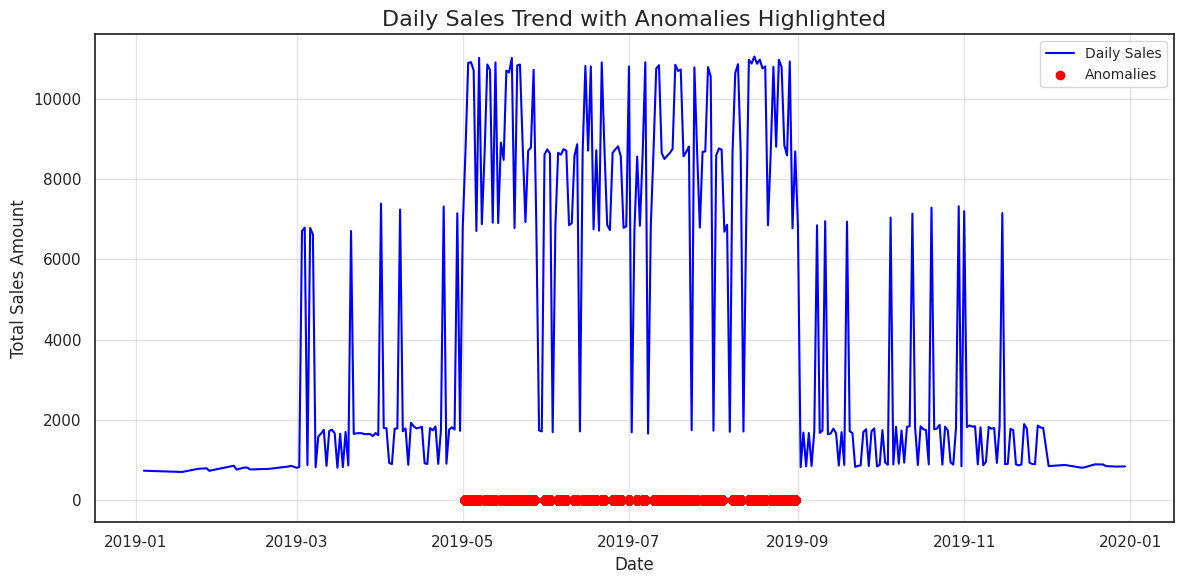

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for sales amounts
merged_data['z_score'] = zscore(merged_data['sales_amount'])

# Identify anomalies where the absolute z-score is greater than 3
anomalies = merged_data[merged_data['z_score'].abs() > 3]
print(f"Anomalies Detected:\n{anomalies[['sales_date', 'sales_amount', 'z_score']]}")

# Aggregate daily sales
daily_sales = merged_data.groupby('sales_date')['sales_amount'].sum()

# Plot daily sales trend with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='blue')
plt.scatter(
    anomalies['sales_date'],
    anomalies['sales_amount'],
    color='red',
    label='Anomalies'
)
plt.title('Daily Sales Trend with Anomalies Highlighted', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Anomalies in daily sales were identified using z-scores and were marked in red, representing days with exceptionally high or low sales.

####Analysis of Daily Sales Trend with Anomalies Highlighted

1. **Sales Patterns**:
   - The blue line shows daily sales patterns with distinct periods of activity and inactivity throughout the year.
   - Sales sharply increase from **March 2019 to September 2019**, indicating a peak season (summer-related demand for ice creams or drinks).

2. **Anomalies (Red Dots)**:
   - The anomalies, represented by red dots, appear during periods of high volatility and rapid sales fluctuations, particularly during the peak sales period.
   - Many anomalies are clustered around **May to September 2019**, where sales values frequently deviate from expected ranges.
   - From the grapoh there is abvious there are also high spikes in sales during off peak months, most likely due to local events and holidays.

3. **Seasonal Behavior**:
   - No anomalies are detected during the initial months of **January and February 2019**, likely because of steady and lower sales activity.
   - Anomalies are scarce toward the end of the year, particularly from **October onwards**, as sales decline and stabilize.

4. **Possible Causes for Anomalies**:
   - **Demand Spikes**: Anomalies during high sales periods might indicate events such as heatwaves, holidays, or special promotions driving unexpected demand.
   - **Operational Issues**: Sudden dips could reflect stockouts, supply chain interruptions, or unexpected closures.



## Task 3: Procurement Forecasting Model
The goal of this section is to build a predictive model that will predict the amount of each product that needs to be stocked each day. The model will take into account factors such as day of the week, month, weather conditions and temperature, manager and product.

### 3.1 Preparation
**merging**: Since the tables needed for model construction are different from those needed for the previous exploratory data analysis, the data integration is re-conducted. The main_dataset, products dataset are merged into model_data by pd.merge function for model training.

In [ ]:
# Merge
model_data = pd.merge(
    main_dataset,
    products,
    left_on='product_name',
    right_on='product_name',
    how='left'
)

print(model_data)
print(model_data.columns)


      sales_date                GTIN  \
0     2019-01-04  GTIN-4060800171900   
1     2019-01-04  GTIN-5017726133887   
2     2019-01-04  GTIN-5017726170196   
3     2019-01-04  GTIN-8000920461235   
4     2019-01-04  GTIN-8711327313712   
...          ...                 ...   
3005  2019-12-30  GTIN-8711327319714   
3006  2019-12-30  GTIN-8711327480537   
3007  2019-12-30  GTIN-8711327489608   
3008  2019-12-30  GTIN-8711918648606   
3009  2019-12-30  GTIN-8720000066784   

                                     product_name weekday_name month_name  \
0                 Pepsi Regular Cola 330ml bottle          FRI        JAN   
1                 Coca-Cola Soft Drink Can 330 ml          FRI        JAN   
2      Fanta Zero Orange Soft Drink Bottle 500 ml          FRI        JAN   
3                              Calippo Cola 105ml          FRI        JAN   
4                       Magnum Vegan Classic 90ml          FRI        JAN   
...                                           ...        

Setting Up the Environment

In [ ]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression  # Regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score  # Evaluation metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest model

### 3.2 Data Cleaning


Data inspection

In [ ]:
print(model_data.dtypes)
print(model_data.head())
print(model_data.isnull().sum())

sales_date                 object
GTIN                       object
product_name               object
weekday_name               object
month_name                 object
dominant_weather_type      object
dominant_temp_category     object
daily_sales_count           int64
daily_sales_value         float64
gtin                        int64
price                     float64
dtype: object
   sales_date                GTIN                                product_name  \
0  2019-01-04  GTIN-4060800171900             Pepsi Regular Cola 330ml bottle   
1  2019-01-04  GTIN-5017726133887             Coca-Cola Soft Drink Can 330 ml   
2  2019-01-04  GTIN-5017726170196  Fanta Zero Orange Soft Drink Bottle 500 ml   
3  2019-01-04  GTIN-8000920461235                          Calippo Cola 105ml   
4  2019-01-04  GTIN-8711327313712                   Magnum Vegan Classic 90ml   

  weekday_name month_name dominant_weather_type dominant_temp_category  \
0          FRI        JAN                 windy    

**Transforming data type:**

Convert 'sales_date' to datetime format and extract day of week and month information.
Convert 'product_name', 'dominant_weather_type', 'dominant_temp_category', 'manager' to dummy variables for use in regression models using pd.get_dummies.
Mapping 'weekday_name' and 'month_name' to numeric representation.

In [ ]:
# 1. Convert sales_date to date
model_data['sales_date'] = pd.to_datetime(model_data['sales_date'])

# 2. Create variables for manager

# Extract the day of the month
model_data['day_of_month'] = model_data['sales_date'].dt.day

# Assign the manager based on the day of the month
model_data['manager'] = model_data['day_of_month'].apply(lambda x: 'Lily' if x % 2 != 0 else 'Suzy')

# Backup of the table before creating the dummy for the randomized tree
rf_model_data=model_data

# 3. Converting product_name, dominant_weather_type and dominant_temp_category and manager to dummy variables
model_data = pd.get_dummies(model_data, columns=['product_name', 'dominant_weather_type', 'dominant_temp_category', 'manager'], drop_first=True, dtype=int)
rf_model_data = pd.get_dummies(rf_model_data, columns=['product_name', 'dominant_weather_type', 'dominant_temp_category', 'manager'], drop_first=False, dtype=int)

# 4. Convert weekday_name and month_name to integers.
# Customised mapping tables
weekday_mapping = {'MON': 1, 'TUE': 2, 'WED': 3, 'THU': 4, 'FRI': 5, 'SAT': 6, 'SUN': 7}
month_mapping = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

# Applying the mapping
model_data['weekday_name'] = model_data['weekday_name'].map(weekday_mapping)
model_data['month_name'] = model_data['month_name'].map(month_mapping)
rf_model_data['weekday_name'] = rf_model_data['weekday_name'].map(weekday_mapping)
rf_model_data['month_name'] = rf_model_data['month_name'].map(month_mapping)
# Inspection
print(model_data.dtypes)
print(model_data.head())
print(rf_model_data.dtypes)
print(rf_model_data.head())

sales_date                                                  datetime64[ns]
GTIN                                                                object
weekday_name                                                         int64
month_name                                                           int64
daily_sales_count                                                    int64
daily_sales_value                                                  float64
gtin                                                                 int64
price                                                              float64
day_of_month                                                         int32
product_name_Coca-Cola Soft Drink Can 330 ml                         int64
product_name_Cornetto Classico 120ml                                 int64
product_name_Cornetto Soft Chocolate 140ml                           int64
product_name_Fanta Zero Orange Soft Drink Bottle 500 ml              int64
product_name_Magnum Doubl

### 3.3 Descriptive analysis

In [ ]:
print(model_data.describe())

                          sales_date  weekday_name   month_name  \
count                           3010   3010.000000  3010.000000   
mean   2019-07-13 14:54:37.076411904      3.993355     6.906977   
min              2019-01-04 00:00:00      1.000000     1.000000   
25%              2019-04-30 00:00:00      2.000000     4.000000   
50%              2019-07-14 00:00:00      4.000000     7.000000   
75%              2019-09-27 00:00:00      6.000000     9.000000   
max              2019-12-30 00:00:00      7.000000    12.000000   
std                              NaN      2.013569     2.907340   

       daily_sales_count  daily_sales_value          gtin        price  \
count        3010.000000        3010.000000  3.010000e+03  3010.000000   
mean          457.801993        1125.512512  7.437440e+12     2.540000   
min            48.000000          84.930000  4.060800e+12     1.490000   
25%           124.750000         293.147500  5.017726e+12     1.990000   
50%           195.000000  

### 3.4 Regression Analysis


**Constructing Multiple Linear Model**


Multiple linear regression models were constructed using the statsmodels.api library.
Use 'daily_sales_count' as the dependent variable and other features as independent variables.
Use the train_test_split function to divide the data into training (70%) and test (30%) sets.

In [ ]:
import statsmodels.api as sm

# Defining the dependent variable
Y = model_data['daily_sales_count']

# Defining the independent variable
X = model_data[
    [
        'weekday_name',
        'month_name',
        'product_name_Coca-Cola Soft Drink Can 330 ml',
        'product_name_Cornetto Classico 120ml',
        'product_name_Cornetto Soft Chocolate 140ml',
        'product_name_Fanta Zero Orange Soft Drink Bottle 500 ml',
        'product_name_Magnum Double Gold Caramel Billionaire 85ml',
        'product_name_Magnum Vegan Classic 90ml',
        'product_name_Pepsi Regular Cola 330ml bottle',
        'product_name_Solero Exotic 90ml',
        'product_name_Walls Feast Classic 90ml',
        'dominant_weather_type_rainy',
        'dominant_weather_type_sunny',
        'dominant_weather_type_windy',
        'dominant_temp_category_hot',
        'dominant_temp_category_warm',
        'manager_Suzy'
    ]
]
# Adding an intercept
X = sm.add_constant(X)
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)  # random_state ensures reproducibility



**Multi-collinearity detection**

*   The variance inflation factor (VIF) was calculated for each independent variable using the variance_inflation_factor function to detect multicollinearity.
*   According to the VIF value to determine whether there is a multicollinearity problem or not, from the result we got, the **VIF value of all variables is less than 5**, so there is no multicollinearity, save all variables.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Calculating VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)

                                             Variable        VIF
0                                               const  36.262443
1                                        weekday_name   1.015307
2                                          month_name   1.017505
3        product_name_Coca-Cola Soft Drink Can 330 ml   1.800000
4                product_name_Cornetto Classico 120ml   1.800000
5          product_name_Cornetto Soft Chocolate 140ml   1.800000
6   product_name_Fanta Zero Orange Soft Drink Bott...   1.800000
7   product_name_Magnum Double Gold Caramel Billio...   1.800000
8              product_name_Magnum Vegan Classic 90ml   1.800000
9        product_name_Pepsi Regular Cola 330ml bottle   1.800000
10                    product_name_Solero Exotic 90ml   1.800000
11              product_name_Walls Feast Classic 90ml   1.800000
12                        dominant_weather_type_rainy   3.368116
13                        dominant_weather_type_sunny   2.958030
14                       

**Train the model**

*  Fit the training data using a linear regression model.
*  Visualize actual sales versus predicted sales using the sns.scatterplot function.

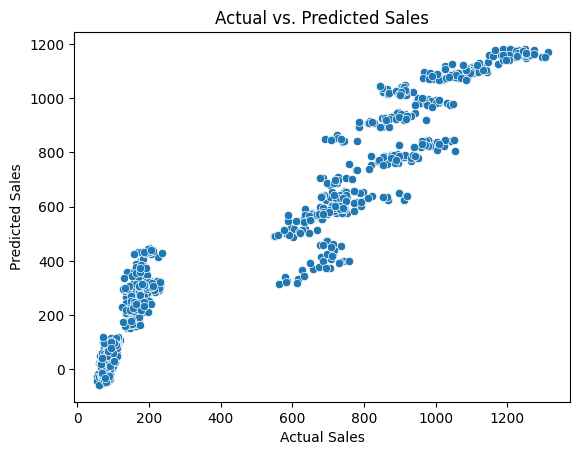

In [ ]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, Y_train)

# Predict the target variable for the test data
Y_linear_test_pred = model.predict(X_test)

# visulization
sns.scatterplot(x=Y_test, y=Y_linear_test_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()



**Summary of regression analysis**

*  Perform regression analysis using the OLS function of the statsmodels.api library and output a summary of the regression results.
*  Analyze metrics such as regression coefficients, p-values, and R² to assess the goodness-of-fit and significance of the model.

In [ ]:
# Regression with statsmodels
model = sm.OLS(Y, X).fit()

# Output regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      daily_sales_count   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2259.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:40:17   Log-Likelihood:                -18250.
No. Observations:                3010   AIC:                         3.654e+04
Df Residuals:                    2992   BIC:                         3.664e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

**Model Evaluation**



*  Evaluate the performance of the model using the test data and calculate metrics such as Mean Absolute Error (MAE), Mean Square Error (MSE) and Coefficient of Determination (R²).



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics for the test set
mae_linear_test = mean_absolute_error(Y_test, Y_linear_test_pred)  # Mean Absolute Error
print(f"Mean Absolute Error (MAE) of linear on test: {mae_linear_test}")
mse_linear_test = mean_squared_error(Y_test, Y_linear_test_pred)  # Mean Squared Error
print(f"Mean Squared Error (MSE) of linear on test: {mse_linear_test}")
rmse_linear_test = np.sqrt(mse_linear_test)  # Root Mean Squared Error
print(f"Root Mean Squared Error (RMSE) of linear on test: {rmse_linear_test}")
r2_linear_test = r2_score(Y_test, Y_linear_test_pred)  # R-squared
print(f"r2 of linear on test: {r2_linear_test}")

# Calculate metrics for the training set
Y_linear_train_pred = model.predict(X_train)
mae_linear_train = mean_absolute_error(Y_train, Y_linear_train_pred)  # Mean Absolute Error
print(f"Mean Absolute Error (MAE) of linear on train: {mae_linear_train}")
mse_linear_train = mean_squared_error(Y_train, Y_linear_train_pred)  # Mean Squared Error
print(f"Mean Squared Error (MSE) of linear on train: {mse_linear_train}")
rmse_linear_train = np.sqrt(mse_linear_train)  # Root Mean Squared Error
print(f"Root Mean Squared Error (RMSE) of linear on train: {rmse_linear_train}")
r2_linear_train = r2_score(Y_train, Y_linear_train_pred)  # R-squared
print(f"r2 of linear on train: {r2_linear_train}")


Mean Absolute Error (MAE) of linear on test: 87.89484269541794
Mean Squared Error (MSE) of linear on test: 12178.510694100116
Root Mean Squared Error (RMSE) of linear on test: 110.35628978042038
r2 of linear on test: 0.9186543786854517
Mean Absolute Error (MAE) of linear on train: 83.47792167390146
Mean Squared Error (MSE) of linear on train: 10399.390853839956
Root Mean Squared Error (RMSE) of linear on train: 101.97740364335598
r2 of linear on train: 0.930442734173588




**Residual Analysis**

*  Checking the predictive stability of the model, by visualizing the residual, we can see that the distribution is close to normal, but with a number of large variances.

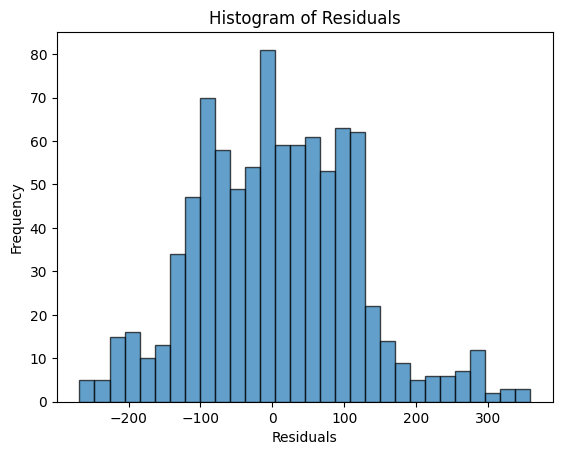

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = Y_test - Y_linear_test_pred

# Plotting the residual distribution
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

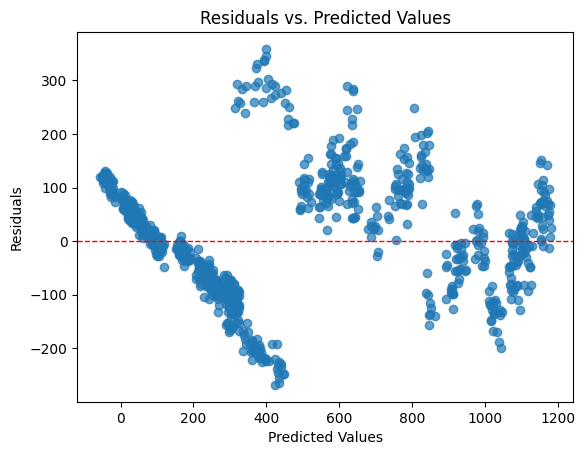

In [ ]:
# Plotting Scatter Plots of Residuals vs. Predicted Values
plt.scatter(Y_linear_test_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

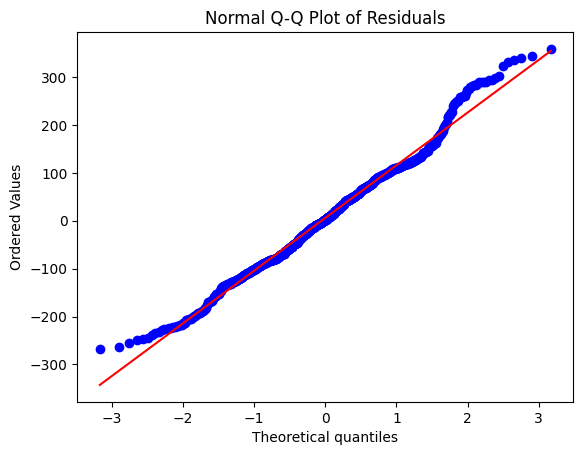

In [ ]:
import scipy.stats as stats

#  Plotting Q-Q plots
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

## Analysis of Linear Regression Results

### Model Performance:
1. **R-squared**: The R-squared value is 0.918, indicating that the model explains about 91.8% of the variance of the dependent variable (daily sales). This suggests excellent predictive power.
2. **F-statistic**: The F-statistic is large with a very small p-value (close to 0), showing that the model as a whole is significant. At least one of the independent variables significantly affects the dependent variable.

### Coefficients:
- Most independent variable coefficients are statistically significant (p-value < 0.05), meaning they significantly impact daily sales.
- Exceptions: 'weekday_name' and 'month_name' variables show no significant effect on daily sales.
- Variables like **weather** and **temperature** have the largest coefficients, demonstrating their strong impact on sales volume.

### Residuals:
- The residuals follow a normal distribution and display no discernible pattern.

### Limitations:
- Despite the high R² values on both training (0.93) and test sets (0.92), suggesting a good model fit, the **Mean Absolute Error (MAE)** and **Root Mean Square Error (RMSE)** are relatively high:
  - Test set: MAE = 87.89, RMSE = 110.36.
  - This implies that the model still has a high prediction error.

### Conclusion:
Based on the above analysis, we recommend exploring alternative models to improve prediction accuracy. The linear regression model demonstrates strong explanatory power but does not meet our error tolerance for predictive tasks.


### 3.5 Random Forest Model with Cross Validation


**Setting of Cross Validation & Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the dependent variable
y = rf_model_data['daily_sales_count']

# Defining the independent variable
x = rf_model_data[
    [
        'weekday_name',
        'month_name',
        'product_name_Calippo Cola 105ml',
        'product_name_Coca-Cola Soft Drink Can 330 ml',
        'product_name_Cornetto Classico 120ml',
        'product_name_Cornetto Soft Chocolate 140ml',
        'product_name_Fanta Zero Orange Soft Drink Bottle 500 ml',
        'product_name_Magnum Double Gold Caramel Billionaire 85ml',
        'product_name_Magnum Vegan Classic 90ml',
        'product_name_Pepsi Regular Cola 330ml bottle',
        'product_name_Solero Exotic 90ml',
        'product_name_Walls Feast Classic 90ml',
        'dominant_weather_type_cloudy',
        'dominant_weather_type_rainy',
        'dominant_weather_type_sunny',
        'dominant_weather_type_windy',
        'dominant_temp_category_cool',
        'dominant_temp_category_hot',
        'dominant_temp_category_warm',
        'manager_Suzy',
        'manager_Lily'
    ]
]

# Split the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)  # random_state ensures reproducibility


# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=101)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [500, 600, 700],
}

**Finding the optimal hyperparameters & Model**

In [ ]:
# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [500, 600, 700]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'max_features': None, 'n_estimators': 600}


**Model Validation**

In [ ]:
# Predict the target variable for the test data using the best model
y_rf_test_pred = best_rf.predict(x_test)

# Evaluate the model using evaluation metrics for regression
mae_rf = mean_absolute_error(y_test, y_rf_test_pred)  # Mean Absolute Error
mse_rf = mean_squared_error(y_test, y_rf_test_pred)  # Mean Squared Error
rmse_rf = np.sqrt(mse_rf)  # Root Mean Squared Error
r2_rf = r2_score(y_test, y_rf_test_pred)  # R-squared

# Print the evaluation metrics
print(f"Random Forest Regressor on y_test MAE: {mae_rf}")
print(f"Random Forest Regressor on y_test MSE: {mse_rf}")
print(f"Random Forest Regressor on y_test RMSE: {rmse_rf}")
print(f"Random Forest Regressor on y_test R^2: {r2_rf}")


y_rf_train_pred = best_rf.predict(x_train)
# Evaluate the model using evaluation metrics for regression
mae_train_rf = mean_absolute_error(y_train, y_rf_train_pred)  # Mean Absolute Error
mse_train_rf = mean_squared_error(y_train, y_rf_train_pred)  # Mean Squared Error
rmse_train_rf = np.sqrt(mse_train_rf)  # Root Mean Squared Error
r2_train_rf = r2_score(y_train, y_rf_train_pred)  # R-squared

# Print the evaluation metrics
print(f"Random Forest Regressor on y_train MAE: {mae_train_rf}")
print(f"Random Forest Regressor on y_train MSE: {mse_train_rf}")
print(f"Random Forest Regressor on y_train RMSE: {rmse_train_rf}")
print(f"Random Forest Regressor on y_train R^2: {r2_train_rf}")

Random Forest Regressor on y_test MAE: 18.184762162973456
Random Forest Regressor on y_test MSE: 671.4573670215427
Random Forest Regressor on y_test RMSE: 25.912494419131917
Random Forest Regressor on y_test R^2: 0.9955150413643715
Random Forest Regressor on y_train MAE: 13.140702491705133
Random Forest Regressor on y_train MSE: 354.57127721335445
Random Forest Regressor on y_train RMSE: 18.830063122925385
Random Forest Regressor on y_train R^2: 0.997628417959266


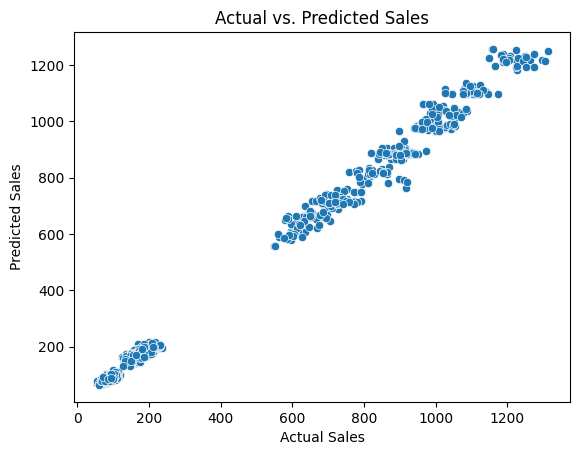

In [ ]:
# Visualization of Actual vs Predicted
sns.scatterplot(x=y_test, y=y_rf_test_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

**Residual analysis**

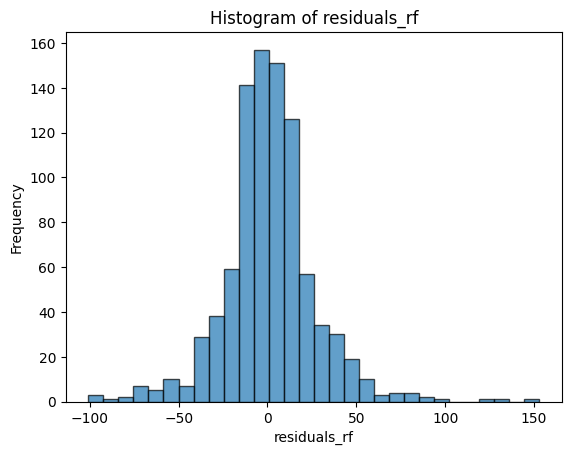

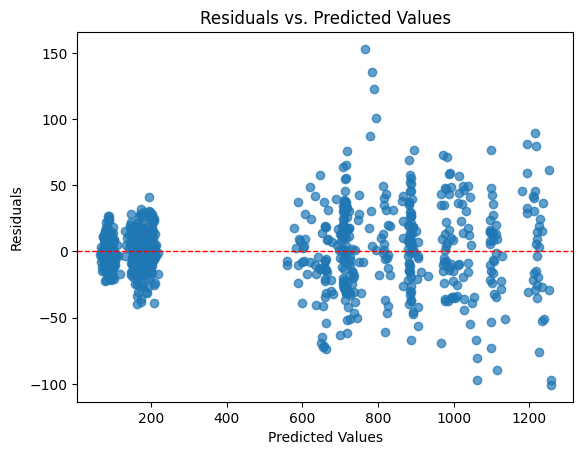

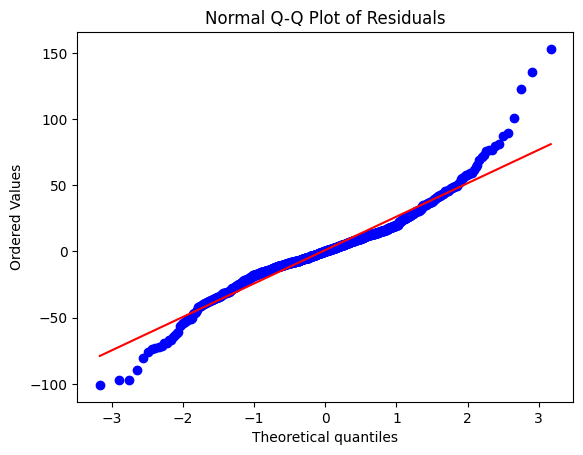

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals_rf = y_test - y_rf_test_pred

# Plotting the residual distribution
plt.hist(residuals_rf, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of residuals_rf")
plt.xlabel("residuals_rf")
plt.ylabel("Frequency")
plt.show()

# Plotting Scatter Plots of Residuals vs. Predicted Values
plt.scatter(y_rf_test_pred, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

import scipy.stats as stats

#  Plotting Q-Q plots
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

**Feature Importance**

                                              Feature  Importance
17                         dominant_temp_category_hot    0.706942
14                        dominant_weather_type_sunny    0.154061
18                        dominant_temp_category_warm    0.038098
12                       dominant_weather_type_cloudy    0.036283
16                        dominant_temp_category_cool    0.035703
4                product_name_Cornetto Classico 120ml    0.008739
5          product_name_Cornetto Soft Chocolate 140ml    0.008274
7   product_name_Magnum Double Gold Caramel Billio...    0.002318
8              product_name_Magnum Vegan Classic 90ml    0.002103
1                                          month_name    0.001296
3        product_name_Coca-Cola Soft Drink Can 330 ml    0.001261
9        product_name_Pepsi Regular Cola 330ml bottle    0.001219
6   product_name_Fanta Zero Orange Soft Drink Bott...    0.001112
0                                        weekday_name    0.000674
11        

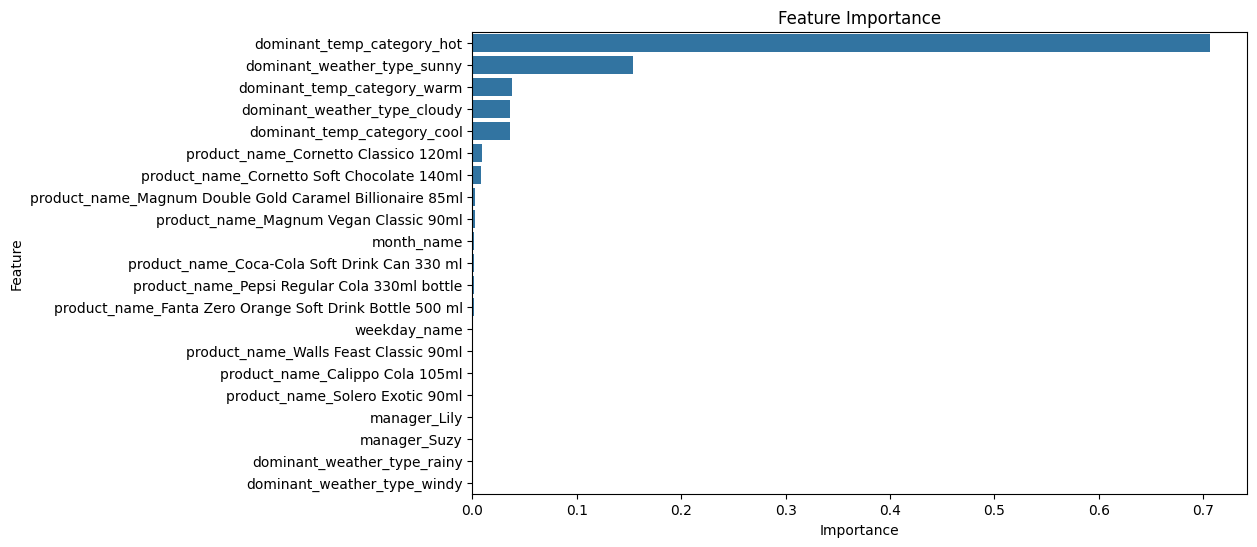

In [ ]:
# Get feature importances
importances = best_rf.feature_importances_
# Get feature names
feature_names = x_train.columns
# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print feature importances
print(feature_importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Including Error**

In [ ]:
std_error = residuals.std()
print('Standard diviation of resudual: ', std_error)
procurement_upper = y_rf_test_pred + std_error
procurement_lower = y_rf_test_pred - std_error


Standard diviation of resudual:  110.2647188861575


## Analysis of Random Forest Regression Results

### Model Optimization:
- After performing 5-fold cross-validation, the optimal parameters for the Random Forest model were determined as:
  - **max_depth**: 10
  - **max_features**: None
  - **n_estimators**: 600

### Model Performance on Test Set:
1. **MAE**: 18.18 (reduced from 87.89 in Linear Regression, an improvement of ~79.3%).
2. **MSE**: 671.46 (reduced from 12,179.3 in Linear Regression, an improvement of ~94.5%).
3. **RMSE**: 25.91 (reduced from 110.36 in Linear Regression, an improvement of ~76.5%).
4. **R²**: 0.9955 (increased from 0.918 in Linear Regression, an improvement of ~8.5%).


### Feature Importance:
The Random Forest model highlights the following as the most important predictors of daily sales:
1. **dominant_temp_category_hot**: 70.69%
2. **dominant_weather_type_sunny**: 15.41%
3. **dominant_temp_category_warm**: 3.81%
4. **dominant_weather_type_cloudy**: 3.63%
5. **dominant_temp_category_cool**: 3.57%

- Product-specific features and time-related variables (e.g., `month_name` and `weekday_name`) have minimal impact.
- Manager-related variables (e.g., `manager_Lily` and `manager_Suzy`) and less frequent weather categories contribute negligibly.

### Residual Analysis:
- The residuals follow a normal distribution and are tightly centered around 0, indicating that the model captures the data patterns effectively.
- The predicted vs. actual values graph shows a near-perfect alignment, confirming the model's predictive accuracy.

### Comparison with Linear Regression:
The Random Forest model significantly outperforms the Linear Regression model in terms of error metrics (MAE, MSE, RMSE) and overall explanatory power (R²). Below is a direct comparison:

| Metric        | Linear Regression | Random Forest | Improvement   |
|---------------|-------------------|---------------|---------------|
| **MAE**       | 87.89             | 18.18         | ~79.3%        |
| **MSE**       | 12,179.3          | 671.46        | ~94.5%        |
| **RMSE**      | 110.36            | 25.91         | ~76.5%        |
| **R²**        | 0.918             | 0.9955        | ~8.5%         |

### Conclusion:
The Random Forest model significantly outperforms Linear Regression, providing accurate daily sales predictions and enabling more effective procurement planning. Its product-level predictions can guide procurement decisions, aligning stock levels with forecasted demand to minimize overstocking or shortages. Adopting this model supports both sales forecasting and efficient procurement management.

## Task 4: Sales Performance Analysis

---

###Manager Level Sales efficiency

In [ ]:
# Add Profit Margin (assumed to be 40%)
profit_margin = 0.4

# Group by Manager and calculate sales and profit metrics
grouped_data = data.groupby('Manager').agg(
    Total_Daily_Sales=('daily_sales_value', 'sum'),
    Total_Products_Sold=('daily_sales_count', 'sum'),
    Average_Selling_Price=('price', 'mean'),
    Total_Days=('sales_date', 'nunique')
).reset_index()

# Calculate profitability metrics
grouped_data['Total_Profit'] = grouped_data['Total_Daily_Sales'] * profit_margin
grouped_data['Profit_Per_Unit'] = grouped_data['Total_Profit'] / grouped_data['Total_Products_Sold']
grouped_data['Profit_Per_Day'] = grouped_data['Total_Profit'] / grouped_data['Total_Days']
grouped_data['Average_Daily_Sales'] = grouped_data['Total_Daily_Sales'] / grouped_data['Total_Days']
grouped_data['Units_Per_Day'] = grouped_data['Total_Products_Sold'] / grouped_data['Total_Days']
grouped_data['Total_Costs'] = grouped_data['Total_Daily_Sales'] - grouped_data['Total_Profit']

# Calculate relative performance contributions
total_sales = grouped_data['Total_Daily_Sales'].sum()
total_profit = grouped_data['Total_Profit'].sum()

grouped_data['Sales_Contribution'] = grouped_data['Total_Daily_Sales'] / total_sales
grouped_data['Profit_Contribution'] = grouped_data['Total_Profit'] / total_profit

grouped_data['Sales_Efficiency_Index'] = (
    grouped_data['Profit_Per_Day'] / grouped_data['Average_Selling_Price']
) * grouped_data['Sales_Contribution']
grouped_data['Return_on_Sales'] = grouped_data['Total_Profit'] / grouped_data['Total_Daily_Sales']


# Display manager-level metrics
print("Manager-Level Sales Efficiency Metrics:")
print(grouped_data)


Manager-Level Sales Efficiency Metrics:
  Manager  Total_Daily_Sales  Total_Products_Sold  Average_Selling_Price  \
0    Lily         1805302.65               734385                   2.54   
1    Suzy         1582490.01               643599                   2.54   

   Total_Days  Total_Profit  Profit_Per_Unit  Profit_Per_Day  \
0         151    722121.060         0.983300     4782.258675   
1         150    632996.004         0.983525     4219.973360   

   Average_Daily_Sales  Units_Per_Day  Total_Costs  Sales_Contribution  \
0         11955.646689    4863.476821  1083181.590            0.532885   
1         10549.933400    4290.660000   949494.006            0.467115   

   Profit_Contribution  Sales_Efficiency_Index  Return_on_Sales  
0             0.532885             1003.304001              0.4  
1             0.467115              776.068662              0.4  


#### **Manager-Level Sales Efficiency Metrics Analysis**

In this part, we assess the sales performance of **Lily** and **Suzy** using various sales efficiency metrics. Given the dataset limitations (e.g., lack of cost data), we assume a **40% profit margin** for both drinks (P. S. Gurskikh et al., 2021) and ice creams (V. Jham et al., 2019).

---



### **1. Sales Efficiency Metrics Used**
Below is the list of sales efficiency metrics calculated, along with their formulas:

1. **Total Daily Sales**:
   - **Definition**: Aggregated sales revenue across all days for each manager.
   - **Formula**:
$$[
    \text{Total Daily Sales} = \sum (\text{daily_sales_value})
   ]$$

2. **Total Products Sold**:
   - **Definition**: Total number of products sold by each manager.
   - **Formula**:
     $$[
     \text{Total Products Sold} = \sum (\text{daily_sales_count})
     ]$$

3. **Average Selling Price**:
   - **Definition**: The mean price of products sold.
   - **Formula**:
     $$[
     \text{Average Selling Price} = \frac{\sum (\text{price})}{\text{Number of Products Sold}}
     ]$$

4. **Total Days**:
   - **Definition**: Number of days with sales activity under each manager.
   - **Formula**:
     $$[
     \text{Total Days} = \text{Unique Count of Dates in Sales Records}
     ]$$

5. **Total Profit**:
   - **Definition**: Calculated as 40% of Total Daily Sales.
   - **Formula**:
     $$[
     \text{Total Profit} = \text{Total Daily Sales} \times \text{Profit Margin}
     ]$$
   - Assumption: Profit Margin = 0.4 (40%).

6. **Total Costs**:
   - **Definition**: Total revenue minus profit.
   - **Formula**:
     $$[
     \text{Total Costs} = \text{Total Daily Sales} - \text{Total Profit}
     ]$$


7. **Profit Per Unit**:
   - **Definition**: Profit generated per product sold.
   - **Formula**:
     $$[
     \text{Profit Per Unit} = \frac{\text{Total Profit}}{\text{Total Products Sold}}
     ]$$

8. **Profit Per Day**:
   - **Definition**: Average profit earned per active sales day.
   - **Formula**:
     $$[
     \text{Profit Per Day} = \frac{\text{Total Profit}}{\text{Total Days}}
     ]$$

9. **Average Daily Sales**:
    - **Definition**: Average sales revenue generated per day.
    - **Formula**:
      $$[
      \text{Average Daily Sales} = \frac{\text{Total Daily Sales}}{\text{Total Days}}
      ]$$

10. **Units Per Day**:
    - **Definition**: Average number of products sold per day.
    - **Formula**:
      $$[
      \text{Units Per Day} = \frac{\text{Total Products Sold}}{\text{Total Days}}
      ]$$

11. **Sales Contribution**:
    - **Definition**: Proportion of a manager’s sales to the total sales across both managers.
    - **Formula**:
      $$[
      \text{Sales Contribution} = \frac{\text{Total Daily Sales (Manager)}}{\text{Total Daily Sales (All Managers)}}
      ]$$

12. **Profit Contribution**:
    - **Definition**: Proportion of a manager’s profit to the total profit across both managers.
    - **Formula**:
      $$[
      \text{Profit Contribution} = \frac{\text{Total Profit (Manager)}}{\text{Total Profit (All Managers)}}
      ]$$

13. **Sales Efficiency Index**:
    - **Definition**: A composite metric combining profit generation with sales contribution.
    - **Formula**:
      $$
      \text{Sales Efficiency Index} = \left( \frac{\text{Profit Per Day}}{\text{Average Selling Price}} \right) \times \text{Sales Contribution}
      $$


---

### **2. Interpretation of Results**

#### **Overview Table**
| Metric                  | Lily               | Suzy               |
|-------------------------|--------------------|--------------------|
| Total Daily Sales       | 1,805,302.65       | 1,582,490.01       |
| Total Products Sold     | 734,385            | 643,599            |
| Average Selling Price   | 2.54               | 2.54               |
| Total Days              | 151                | 150                |
| Total Profit            | 722,121.06         | 632,996.004        |
| Total Costs             | 1,083,181.59       | 949,493.01         |
| Profit Per Unit         | 0.9833             | 0.9835             |
| Profit Per Day          | 4,782.26           | 4,219.97           |
| Average Daily Sales     | 11,955.65          | 10,549.93          |
| Units Per Day           | 4,863.48           | 4,290.66           |
| Sales Contribution      | 53.29%             | 46.71%             |
| Profit Contribution     | 53.29%             | 46.71%             |
| Sales Efficiency Index  | 1,003.30        | 776.07          |

---

#### **Insights**
1. **Sales and Profit Contributions**:
   - Lily contributed **53.29%** of the total sales and profit, outperforming Suzy.

2. **Profitability**:
   - Lily also outperformed Suzy in Sales efficiency index with Lily reaching 1003.3 and Suzy reaching 776.07, a **29.3%** difference.

3. **Daily Efficiency**:
   - Lily generated **~13.3% more sales and units per day** than Suzy.



---

#### **Conclusion**
Lily demonstrates higher total sales and daily revenue efficiency, likely driven by greater sales volume. However, the identical **Sales Efficiency** metric shows parity in cost-to-profit effectiveness, suggesting both managers perform equally well under similar operational conditions.

In [ ]:
from scipy.stats import ttest_ind

# Metrics to test
metrics_to_test = {
    'Profit_Per_Day': lambda x: x['daily_sales_value'] * profit_margin,
    'Average_Daily_Sales': lambda x: x['daily_sales_value'],
    'Units_Per_Day': lambda x: x['daily_sales_count']
}

# -----------------t-tests-------------------
test_results = {}

for metric, calculation in metrics_to_test.items():
    # Calculate daily values
    data[metric] = calculation(data)
    daily_data = data.groupby(['sales_date', 'Manager'])[metric].sum().reset_index()

    # Split by manager
    lily_metric = daily_data[daily_data['Manager'] == 'Lily'][metric]
    suzy_metric = daily_data[daily_data['Manager'] == 'Suzy'][metric]

    # Perform Welch's t-test
    t_stat, p_val = ttest_ind(lily_metric, suzy_metric, equal_var=False)
    test_results[metric] = {'T-statistic': t_stat, 'P-value': p_val}

# Print results
print("T-Test Results for Metrics:")
for metric, result in test_results.items():
    print(f"{metric}: T-statistic = {result['T-statistic']:.4f}, P-value = {result['P-value']:.4f}")



# -----------------Mann-Whitney U Test -------------------

from scipy.stats import mannwhitneyu

mann_whitney_results = {}

for metric, calculation in metrics_to_test.items():
    # Calculate daily values
    data[metric] = calculation(data)
    daily_data = data.groupby(['sales_date', 'Manager'])[metric].sum().reset_index()

    # Split by manager
    lily_metric = daily_data[daily_data['Manager'] == 'Lily'][metric]
    suzy_metric = daily_data[daily_data['Manager'] == 'Suzy'][metric]

    # Perform Mann-Whitney U test
    u_stat, p_val = mannwhitneyu(lily_metric, suzy_metric, alternative='two-sided')
    mann_whitney_results[metric] = {'U-statistic': u_stat, 'P-value': p_val}

# Print results
print("\nMann-Whitney U Test Results for Metrics:")
for metric, result in mann_whitney_results.items():
    print(f"{metric}: U-statistic = {result['U-statistic']:.4f}, P-value = {result['P-value']:.4f}")



#----------------factorial ANOVA------------------

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: Manager × dominant_weather_type
factors_to_test = ['dominant_weather_type', 'dominant_temp_category', 'weekday_name', 'month_name']
metrics_to_test = ['Profit_Per_Day', 'Average_Daily_Sales', 'Units_Per_Day']

anova_results = {}

for factor in factors_to_test:
    for metric in metrics_to_test:
        # Prepare data for ANOVA
        data[metric] = data.groupby(['sales_date', 'Manager'])[metric].transform('sum')

        # Factorial ANOVA formula
        formula = f"{metric} ~ C(Manager) + C({factor}) + C(Manager):C({factor})"
        model = ols(formula, data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)  # Type II ANOVA

        # Store results
        anova_results[(factor, metric)] = anova_table

# Print results for each combination of factors and metrics
for (factor, metric), result in anova_results.items():
    print(f"\nFactorial ANOVA Results for {metric} with Factor: {factor}\n")
    print(result)




T-Test Results for Metrics:
Profit_Per_Day: T-statistic = 1.3043, P-value = 0.1931
Average_Daily_Sales: T-statistic = 1.3043, P-value = 0.1931
Units_Per_Day: T-statistic = 1.3041, P-value = 0.1932

Mann-Whitney U Test Results for Metrics:
Profit_Per_Day: U-statistic = 12592.0000, P-value = 0.0934
Average_Daily_Sales: U-statistic = 12592.0000, P-value = 0.0934
Units_Per_Day: U-statistic = 12588.5000, P-value = 0.0944

Factorial ANOVA Results for Profit_Per_Day with Factor: dominant_weather_type

                                           sum_sq      df            F  \
C(Manager)                           5.631238e+07     1.0     8.789445   
C(dominant_weather_type)             2.229246e+10     3.0  1159.829989   
C(Manager):C(dominant_weather_type)  3.031376e+08     3.0    15.771612   
Residual                             1.923327e+10  3002.0          NaN   

                                           PR(>F)  
C(Manager)                           3.053634e-03  
C(dominant_weather_type) 

#### **Statistical Analysis of Manager Sales Performance**

To evaluate the sales performance of Lily and Suzy, we conducted a series of statistical tests to determine whether differences in metrics such as **Profit_Per_Day**, **Average_Daily_Sales**, and **Units_Per_Day** were statistically significant. The analysis began with Welch’s t-tests and Mann-Whitney U tests followed by factorial ANOVA to explore the influence of external factors such as **dominant_weather_type**, **dominant_temp_category**, **weekday_name** and month on these metrics.

The **t-tests** were used to compare the means of the metrics between the two managers. This test was chosen to determine if there were significant differences in overall performance. Similarly, the **Mann-Whitney U test**, a non-parametric alternative to the t-test, was employed to account for non-normality in the data distribution.

To delve deeper, we used **factorial ANOVA** to assess not only the independent effects of factors like manager identity and external conditions but also their interaction effects. This approach allowed us to determine whether differences in performance were consistent across various weather types, temperature categories, and days of the week and months.



**Factorial ANOVA Results**
- **Profit_Per_Day, Average_Daily_Sales, Units_Per_Day (Factor: dominant_weather_type)**:
  - Significant effects:
    - **Manager**: \( p < 0.05 \) (\( p \approx 0.003 \)).
    - **Weather Type**: \( p < 0.001 \).
    - **Interaction** (\( Manager \times Weather Type \)): \( p < 0.001 \).
  - **Interpretation**: While aggregated performance is not significantly different, performance depends on weather type, highlighting significant interaction effects.

- **Metrics (Factor: dominant_temp_category)**:
  - Significant effects:
    - **Manager**: \( p \approx 0.043 \).
    - **Temperature Category**: \( p < 0.001 \).
    - **Interaction** (\( Manager \times Temperature Category \)): \( p < 0.01 \).
  - **Interpretation**: Temperature category significantly impacts performance, with interactions further differentiating manager effectiveness in specific conditions.

- **Metrics (Factor: weekday_name)**:
  - Significant effects:
    - **Manager**: \( p < 0.001 \).
    - **Weekday Name**: \( p < 0.001 \).
    - **Interaction** (\( Manager \times Weekday Name \)): \( p \approx 0.004 \).
  - **Interpretation**: Certain weekdays favor one manager over the other, with significant interaction effects.

- **Metrics (Factor: month_name)**:
  - Significant effects:
    - **Manager**: \( p < 0.001 \).
    - **Month**: \( p < 0.001 \).
    - **Interaction** (\( Manager \times Month \)): \( p < 0.001 \).
  - **Interpretation**: Performance varies significantly across months, with manager effectiveness influenced by seasonal patterns.

---


### **Conclusion**
These findings suggest that while aggregate performance differences between the managers are not statistically significant, external factors and their interactions with manager identity significantly influence sales metrics. This highlights the importance of tailoring managerial assignments and strategies based on external conditions to maximize performance.

Factorial ANOVA Results

| Metric                | Weather Type                                | Temperature Category                         | Weekday Name                              | Month                                    |
|-----------------------|---------------------------------------------|---------------------------------------------|-------------------------------------------|------------------------------------------|
| Profit_Per_Day,       | Manager (p ≈ 0.003),                       | Manager (p ≈ 0.043),                        | Manager (p < 0.001),                      | Manager (p < 0.001),                     |
| Average_Daily_Sales,  | Weather Type (p < 0.001),                  | Temperature (p < 0.001),                    | Weekday Name (p < 0.001),                 | Month (p < 0.001),                       |
| Units_Per_Day         | Interaction (p < 0.001)                    | Interaction (p < 0.01)                      | Interaction (p ≈ 0.004)                   | Interaction (p < 0.001)                  |
|-----------------------|---------------------------------------------|---------------------------------------------|-------------------------------------------|------------------------------------------|
| Interpretation        | Performance depends on weather,            | Temperature impacts performance, with       | Certain weekdays favor one manager,       | Performance varies seasonally, driven by|
|                       | with significant Manager × Weather         | interactions differentiating manager         | with significant Manager × Weekday        | Manager × Month interactions.           |
|                       | interactions.                              | effectiveness in specific conditions.       | interactions.                             |                                          |


###Product Level Sales efficiency

In [ ]:
# Correctly calculate profit per unit
data['profit_per_unit'] = (data['daily_sales_value'] * profit_margin) / data['daily_sales_count']

# Aggregated product data
product_data = data.groupby('product_name').agg(
    Total_Sales=('daily_sales_value', 'sum'),
    Units_Sold=('daily_sales_count', 'sum'),
    Profit_Per_Unit=('profit_per_unit', 'mean'),
    Units_Per_Day=('daily_sales_count', 'mean'),
    Total_Days=('sales_date', 'nunique')
).reset_index()

# Calculate profitability metrics for categories
product_data['Total_Profit'] = product_data['Total_Sales'] * profit_margin
product_data['Profit_Per_Unit'] = product_data['Total_Profit'] / product_data['Units_Sold']
product_data['Profit_Per_Day'] = product_data['Total_Profit'] / product_data['Total_Days']
product_data['Average_Daily_Sales'] = product_data['Total_Sales'] / product_data['Total_Days']
product_data['Units_Per_Day'] = product_data['Units_Sold'] / product_data['Total_Days']
product_data['Total_Costs'] = product_data['Total_Sales'] - product_data['Total_Profit']
product_data['Volume_Efficiency'] = product_data['Total_Profit'] / product_data['Units_Sold']  # Profit per unit sold


# Calculate profitability metrics for products
product_data['Profit_Per_Day'] = product_data['Profit_Per_Unit'] * product_data['Units_Per_Day']

print("\nProduct-Level Sales Efficiency Metrics:")
print(product_data)



Product-Level Sales Efficiency Metrics:
                                  product_name  Total_Sales  Units_Sold  \
0                           Calippo Cola 105ml    279593.01      140499   
1              Coca-Cola Soft Drink Can 330 ml    230595.38      154762   
2                      Cornetto Classico 120ml    457397.64      114636   
3                Cornetto Soft Chocolate 140ml    466969.65      117035   
4   Fanta Zero Orange Soft Drink Bottle 500 ml    383943.06      154194   
5  Magnum Double Gold Caramel Billionaire 85ml    389770.42      130358   
6                    Magnum Vegan Classic 90ml    388377.08      129892   
7              Pepsi Regular Cola 330ml bottle    231556.43      155407   
8                           Solero Exotic 90ml    278980.09      140191   
9                     Walls Feast Classic 90ml    280609.90      141010   

   Profit_Per_Unit  Units_Per_Day  Total_Days  Total_Profit  Profit_Per_Day  \
0            0.796     466.774086         301    11183

#### **Product-Level Sales Efficiency Metrics Analysis**

### **1. Metrics Used**

1. **Total Sales**:
   - **Definition**: Aggregated sales revenue for each product.
   - **Formula**: $$[
   \text{Total Sales} = \sum (\text{daily_sales_value})
   ]$$

2. **Units Sold**:
   - **Definition**: Total number of units sold for each product.
   - **Formula**: $$[
   \text{Units Sold} = \sum (\text{daily_sales_count})
   ]$$

3. **Profit Per Unit**:
   - **Definition**: Average profit generated per unit sold.
   - **Formula**: $$[
   \text{Profit Per Unit} = \frac{\text{Total Profit}}{\text{Units Sold}}
   ]$$

4. **Units Per Day**:
   - **Definition**: Average number of units sold daily for each product.
   - **Formula**: $$[
   \text{Units Per Day} = \frac{\text{Units Sold}}{\text{Total Days}}
   ]$$

5. **Total Days**:
   - **Definition**: Number of unique days with sales data for each product.
   - **Formula**: $$[
   \text{Total Days} = \text{Count of Unique Sales Dates}
   ]$$

6. **Total Profit**:
   - **Definition**: Total profit generated for each product.
   - **Formula**: $$[
   \text{Total Profit} = \text{Total Sales} \times \text{Profit Margin}
   ]$$
   - **Assumption**: Profit Margin = 0.4 (40%).

7. **Profit Per Day**:
   - **Definition**: Average profit generated daily for each product.
   - **Formula**: $$[
   \text{Profit Per Day} = \frac{\text{Total Profit}}{\text{Total Days}}
   ]$$

8. **Average Daily Sales**:
   - **Definition**: Average daily sales revenue for each product.
   - **Formula**: $$[
   \text{Average Daily Sales} = \frac{\text{Total Sales}}{\text{Total Days}}
   ]$$

9. **Total Costs**:
   - **Definition**: Total costs incurred for each product.
   - **Formula**:
     $$[
     \text{Total Costs} = \text{Total Sales} - \text{Total Profit}
     ]$$
10. **Volume Efficiency**:
    - **Definition**: Average profit generated per unit sold.
    - **Formula**:
      $$[
      \text{Volume Efficiency} = \frac{\text{Total Profit}}{\text{Units Sold}}
      ]$$



---


### **2. Results**

| **Product Name**                              | **Total Sales** | **Units Sold** | **Profit Per Unit** | **Units Per Day** | **Total Days** | **Total Profit** | **Profit Per Day** | **Average Daily Sales** | **Total Costs** | **Volume Efficiency** |
|-----------------------------------------------|-----------------|----------------|----------------------|-------------------|----------------|------------------|--------------------|-------------------------|-----------------|-------------------------|
| Calippo Cola 105ml                            | 279,593.01      | 140,499        | 0.80                 | 466.77            | 301            | 111,837.20       | 371.55             | 928.88                  | 167,755.81      | 0.80                   |
| Coca-Cola Soft Drink Can 330 ml               | 230,595.38      | 154,762        | 0.60                 | 514.16            | 301            | 92,238.15        | 306.44             | 766.10                  | 138,357.23      | 0.60                   |
| Cornetto Classico 120ml                       | 457,397.64      | 114,636        | 1.60                 | 380.85            | 301            | 182,959.06       | 607.84             | 1,519.59                | 274,438.58      | 1.60                   |
| Cornetto Soft Chocolate 140ml                 | 466,969.65      | 117,035        | 1.60                 | 388.82            | 301            | 186,787.86       | 620.56             | 1,551.39                | 280,181.79      | 1.60                   |
| Fanta Zero Orange Soft Drink Bottle 500 ml    | 383,943.06      | 154,194        | 1.00                 | 512.27            | 301            | 153,577.22       | 510.22             | 1,275.56                | 230,365.84      | 1.00                   |
| Magnum Double Gold Caramel Billionaire 85ml   | 389,770.42      | 130,358        | 1.20                 | 433.08            | 301            | 155,908.17       | 517.97             | 1,294.92                | 233,862.25      | 1.20                   |
| Magnum Vegan Classic 90ml                     | 388,377.08      | 129,892        | 1.20                 | 431.53            | 301            | 155,350.83       | 516.12             | 1,290.29                | 233,026.25      | 1.20                   |
| Pepsi Regular Cola 330ml bottle               | 231,556.43      | 155,407        | 0.60                 | 516.30            | 301            | 92,622.57        | 307.72             | 769.29                  | 138,933.86      | 0.60                   |
| Solero Exotic 90ml                            | 278,980.09      | 140,191        | 0.80                 | 465.75            | 301            | 111,592.04       | 370.74             | 926.84                  | 167,388.05      | 0.80                   |
| Walls Feast Classic 90ml                      | 280,609.90      | 141,010        | 0.80                 | 468.47            | 301            | 112,243.96       | 372.90             | 932.26                  | 168,365.94      | 0.80                   |


---
                

### **3. Overall Summary**

- **High Performers**:
  - **Cornetto Soft Chocolate 140ml** and **Cornetto Classico 120ml** are top products, excelling in both daily profitability and total sales, making them key contributors to profit.
- **Steady Contributors**:
  - Products like **Fanta Zero Orange** and **Magnum Double Gold** demonstrate strong daily sales and profitability, sustaining overall revenue.
- **Opportunities for Growth**:
  - **Coca-Cola Soft Drink Can** and **Pepsi Regular Cola Bottle** have lower profitability metrics. Strategies like price optimization or cost control could enhance their contributions.

---

### **Conclusion**

The metrics highlight the importance of balancing **daily performance metrics (Profit Per Day, Average Daily Sales)** with profitability per unit. Products like the Cornetto range and Magnum consistently excel, suggesting they should be prioritized in inventory and promotional strategies. Meanwhile, optimization efforts should focus on low-performing products to improve overall efficiency.

This analysis can guide product-level decisions and strategic alignment in sales efforts.

###Category Level Sales efficiency

In [ ]:
# Calculate efficiency metrics for each product category
category_data = data.groupby('product_category').agg(
    Total_Sales=('daily_sales_value', 'sum'),
    Units_Sold=('daily_sales_count', 'sum'),
    Total_Days=('sales_date', 'nunique'),
    Average_Selling_Price=('price', 'mean')
).reset_index()

# Define a profit margin (assumed to be 40%)
profit_margin = 0.4

# Calculate profitability metrics for product categories
category_data['Total_Profit'] = category_data['Total_Sales'] * profit_margin
category_data['Profit_Per_Unit'] = category_data['Total_Profit'] / category_data['Units_Sold']
category_data['Profit_Per_Day'] = category_data['Total_Profit'] / category_data['Total_Days']
category_data['Average_Daily_Sales'] = category_data['Total_Sales'] / category_data['Total_Days']
category_data['Units_Per_Day'] = category_data['Units_Sold'] / category_data['Total_Days']

# Display the results
print("\nProduct Category-Level Efficiency Metrics:")
print(category_data)



Product Category-Level Efficiency Metrics:
  product_category  Total_Sales  Units_Sold  Total_Days  \
0           Drinks    846094.87      464363         301   
1       Ice Creams   2541697.79      913621         301   

   Average_Selling_Price  Total_Profit  Profit_Per_Unit  Profit_Per_Day  \
0               1.823333    338437.948         0.728822     1124.378565   
1               2.847143   1016679.116         1.112802     3377.671482   

   Average_Daily_Sales  Units_Per_Day  
0          2810.946412    1542.734219  
1          8444.178704    3035.285714  


#### **Product Category-Level Efficiency Metrics Analysis**


### **1. Metrics Used**

1. **Total Sales**:
   - **Definition**: Total revenue generated by each product category.
   - **Formula**: $$[
   \text{Total Sales} = \sum (\text{daily_sales_value})
   ]$$

2. **Units Sold**:
   - **Definition**: Total number of units sold in each category.
   - **Formula**: $$[
   \text{Units Sold} = \sum (\text{daily_sales_count})
   ]$$

3. **Total Days**:
   - **Definition**: Unique number of days with sales activity for each category.
   - **Formula**: $$[
   \text{Total Days} = \text{Unique Count of Sales Dates}
   ]$$

4. **Average Selling Price**:
   - **Definition**: Average price of products within each category.
   - **Formula**: $$[
   \text{Average Selling Price} = \frac{\sum (\text{price})}{\text{Number of Products}}
   ]$$

5. **Total Profit**:
   - **Definition**: Total profit generated by each category.
   - **Formula**: $$[
   \text{Total Profit} = \text{Total Sales} \times \text{Profit Margin}
   ]$$

6. **Profit Per Unit**:
   - **Definition**: Average profit generated per unit sold.
   - **Formula**: $$[
   \text{Profit Per Unit} = \frac{\text{Total Profit}}{\text{Units Sold}}
   ]$$

7. **Profit Per Day**:
   - **Definition**: Average profit generated daily.
   - **Formula**: $$[
   \text{Profit Per Day} = \frac{\text{Total Profit}}{\text{Total Days}}
   ]$$

8. **Average Daily Sales**:
   - **Definition**: Average daily revenue generated.
   - **Formula**: $$[
   \text{Average Daily Sales} = \frac{\text{Total Sales}}{\text{Total Days}}
   ]$$

9. **Units Per Day**:
   - **Definition**: Average number of units sold daily.
   - **Formula**: $$[
   \text{Units Per Day} = \frac{\text{Units Sold}}{\text{Total Days}}
   ]$$

---

### **2. Results**

| **Product Category** | **Total Sales** | **Units Sold** | **Average Selling Price** | **Total Profit** | **Profit Per Unit** | **Profit Per Day** | **Average Daily Sales** | **Units Per Day** |
|-----------------------|-----------------|----------------|---------------------------|------------------|---------------------|--------------------|-------------------------|-------------------|
| **Drinks**           | 846,094.87      | 464,363        | 1.82                      | 338,437.95       | 0.73                | 1,124.38           | 2,810.95                | 1,542.73          |
| **Ice Creams**        | 2,541,697.79    | 913,621        | 2.85                      | 1,016,679.12     | 1.11                | 3,377.67           | 8,444.18                | 3,035.29          |

---

### **3. Interpretation of Results**

#### **Key Insights**
1. **Revenue Contribution**:
   - **Ice Creams** dominate in total sales (2.54M) compared to **Drinks** (846K), contributing significantly more to overall revenue.
   - The higher sales figure suggests a stronger demand or higher pricing for ice creams.

2. **Profitability**:
   - **Ice Creams** also lead in total profit (1.02M vs. 338K) and have a higher **Profit Per Unit** (1.11 vs. 0.73).
   - This indicates better margin efficiency for ice creams, driven by their higher pricing.

3. **Daily Performance**:
   - Ice Creams outperform Drinks in both **Profit Per Day** (3,377.67 vs. 1,124.38) and **Average Daily Sales** (8,444.18 vs. 2,810.95).
   - This indicates consistent, strong daily contributions from ice creams.

4. **Volume Sales**:
   - While **Ice Creams** sell more units daily (3,035.29), **Drinks** achieve a comparable volume (1,542.73).


### Post-Hoc Analysis

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind


# Metrics to test
metrics_to_test = ['Average_Daily_Sales']

# Include all relevant factors
factors_to_test = ['dominant_weather_type', 'dominant_temp_category', 'month_name', 'weekday_name']


# --------------------------- Tukey’s Honestly Significant Difference (HSD) Test

for factor in factors_to_test:
    for metric in metrics_to_test:
        # Prepare data
        data[metric] = data.groupby(['sales_date', 'Manager'])[metric].transform('sum')

        # Tukey's HSD
        # Convert the categorical column to string before concatenation
        tukey = pairwise_tukeyhsd(
            endog=data[metric],  # Dependent variable
            groups=data[factor].astype(str) + '_' + data['Manager'],  # Combined factor groups
            alpha=0.05
        )
        print(f"Tukey HSD Results for {metric} with {factor} × Manager:")
        print(tukey)



Tukey HSD Results for Average_Daily_Sales with dominant_weather_type × Manager:
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
   group1      group2       meandiff    p-adj       lower           upper      reject
-------------------------------------------------------------------------------------
cloudy_Lily cloudy_Suzy   -2076139.3162    1.0  -24166896.8999   20014618.2674  False
cloudy_Lily  rainy_Lily -143518954.5635    0.0 -159963553.4789 -127074355.6481   True
cloudy_Lily  rainy_Suzy -115960428.7212    0.0 -132517849.2291  -99403008.2132   True
cloudy_Lily  sunny_Lily  -13144375.9259  0.235  -29662883.5234    3374131.6716  False
cloudy_Lily  sunny_Suzy  -21714940.2778 0.0034  -38940979.8374   -4488900.7182   True
cloudy_Lily  windy_Lily -173246242.9952    0.0 -192346070.6946 -154146415.2957   True
cloudy_Lily  windy_Suzy -175324691.4141    0.0 -192305991.8489 -158343390.9794   True
cloudy_Suzy  rainy_Lily -141442815.2473    0.0 -160127963.47

#### Post-Hoc Analysis

Since the factorial ANOVA statistical analysis showed some significance diffences in the performances of the 2 managers, we decided to do a post hoc analysis to identify which manager performs better and under which conditions.

We chose Tukey HSD post-hoc comparisons for **Average daily sales**, across different conditions (dominant weather types, dominant temperature categories, month and week day) and managers (Lily and Suzy).
Average Daily Sales is a robust, intuitive metric that captures the daily effectiveness of sales operations. It enables fair comparisons, uncovers trends, and provides actionable insights, making it a valuable choice for analyzing sales performance across varying conditions. Tukey HSD was chosen as the post-hoc method for Average Daily Sales due to its robustness, error control, and ability to provide detailed pairwise comparisons, enabling actionable insights into the impact of external conditions and managerial performance on sales outcomes.
- **Dominant Weather Type × Manager:**  
  On rainy days, Suzy consistently outperformed Lily, achieving higher average daily sales. No significant differences were observed across other weather types.

- **Dominant Temperature Category × Manager:**  
  During hot days, Lily demonstrated superior sales performance compared to Suzy. No significant differences were detected in other temperature categories.

- **Month × Manager:**  
  Suzy outperformed Lily in July, May, and September, achieving higher average daily sales during these months.

- **Weekday × Manager:**  
  Lily outperformed Suzy on Mondays, achieving significantly higher average daily sales.

- **Statistical Significance of Differences:**  
  The presence of multiple comparisons with highly significant p-values (< 0.05) and substantial mean differences indicates that these performance disparities are unlikely to be due to chance. Instead, they highlight systematic variations in managerial effectiveness under different market conditions.

- **Manager-Specific Strengths:**  
  Certain conditions appear to align more favorably with the strengths of each manager. For instance, Lily excels under "hot" conditions, while Suzy demonstrates better performance on "rainy" days.


**Discussion:**

The differences in Lily and Suzy's performance likely stem from their unique management styles and adaptability to external factors, despite operating the same truck. Lily excels in high-demand conditions, such as hot weather and Mondays, where quick decision-making and a focus on ice cream sales drive results. Conversely, Suzy performs better during rainy days and in months like May and September, where steady or niche demand dominates. These variations suggest that customer interaction styles and adaptability play a key role in their performance. Aligning their shifts to leverage these strengths could optimize overall sales while maintaining fairness in this family business.

**Conclusion:**

The Tukey HSD results confirm that environmental factors but also seasonality influence sales performance. Lily’s adaptability and strong performance under specific conditions, such as hot temperatures, suggest that her strategies are better optimized for certain market environments. Conversely, Suzy's strengths in rainy conditions highlight her effectiveness in other niches. These insights emphasize the importance of aligning managerial assignments with external conditions to maximize performance.s.

##Task 5: Key Performance Indicators (KPIs)

---


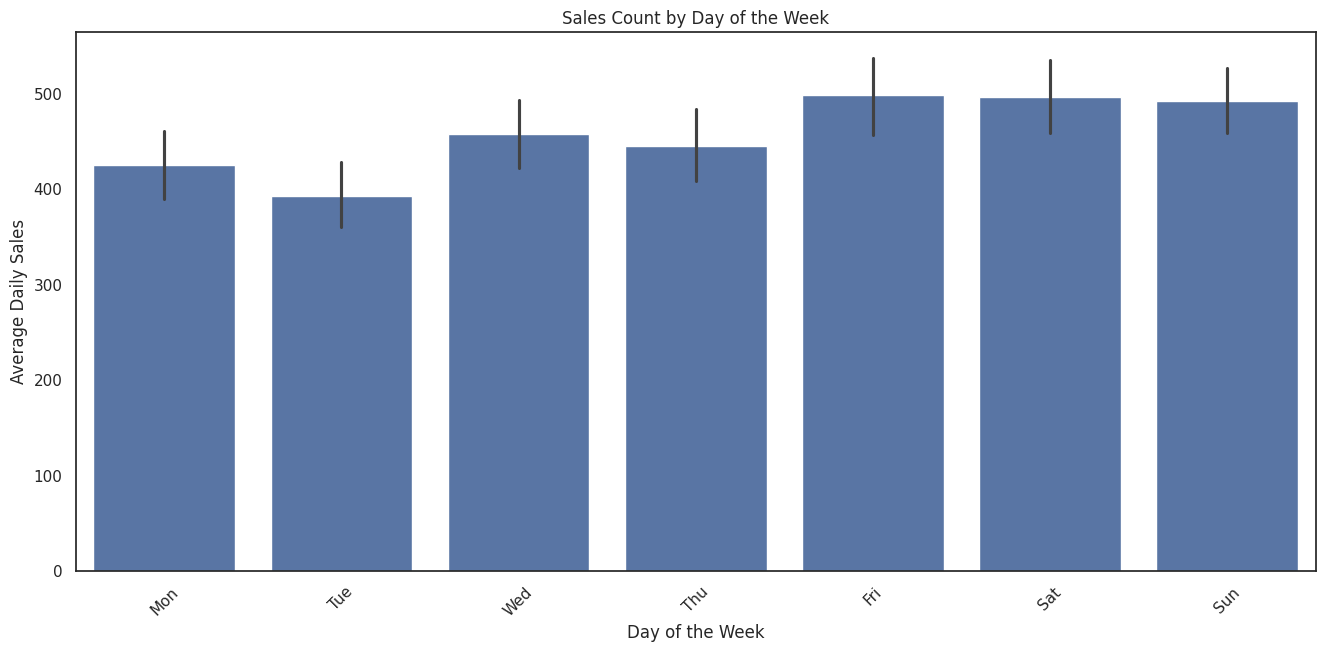

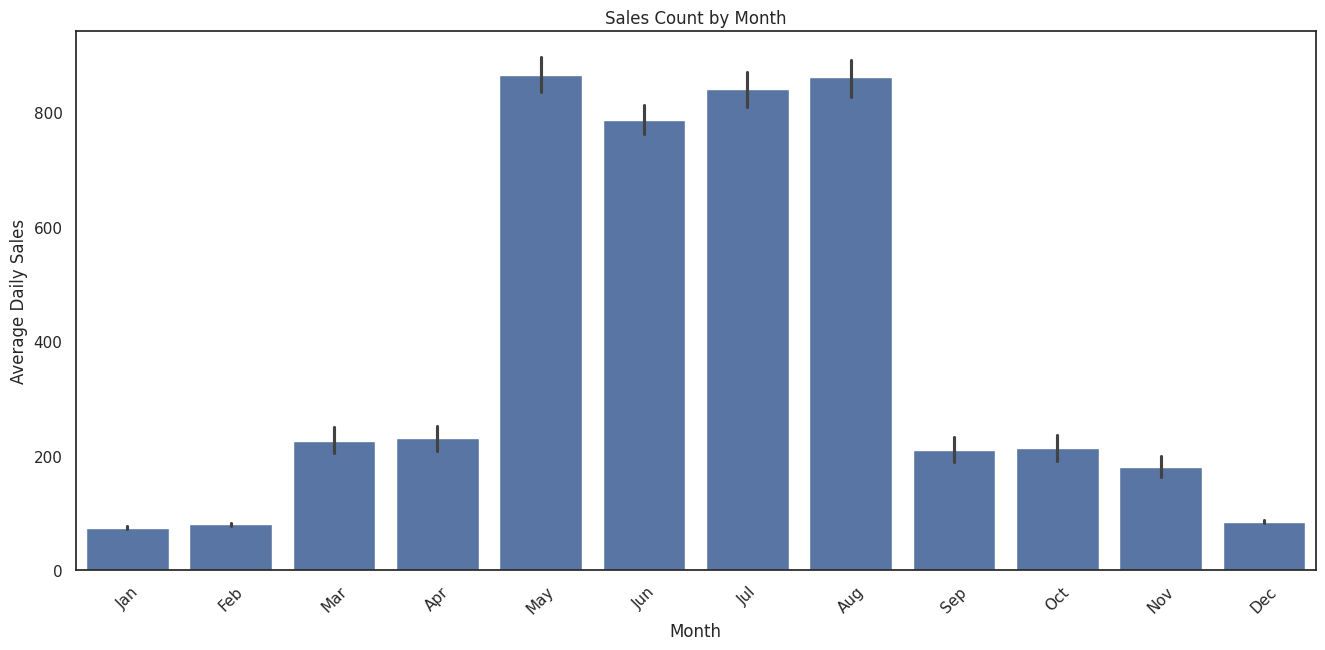

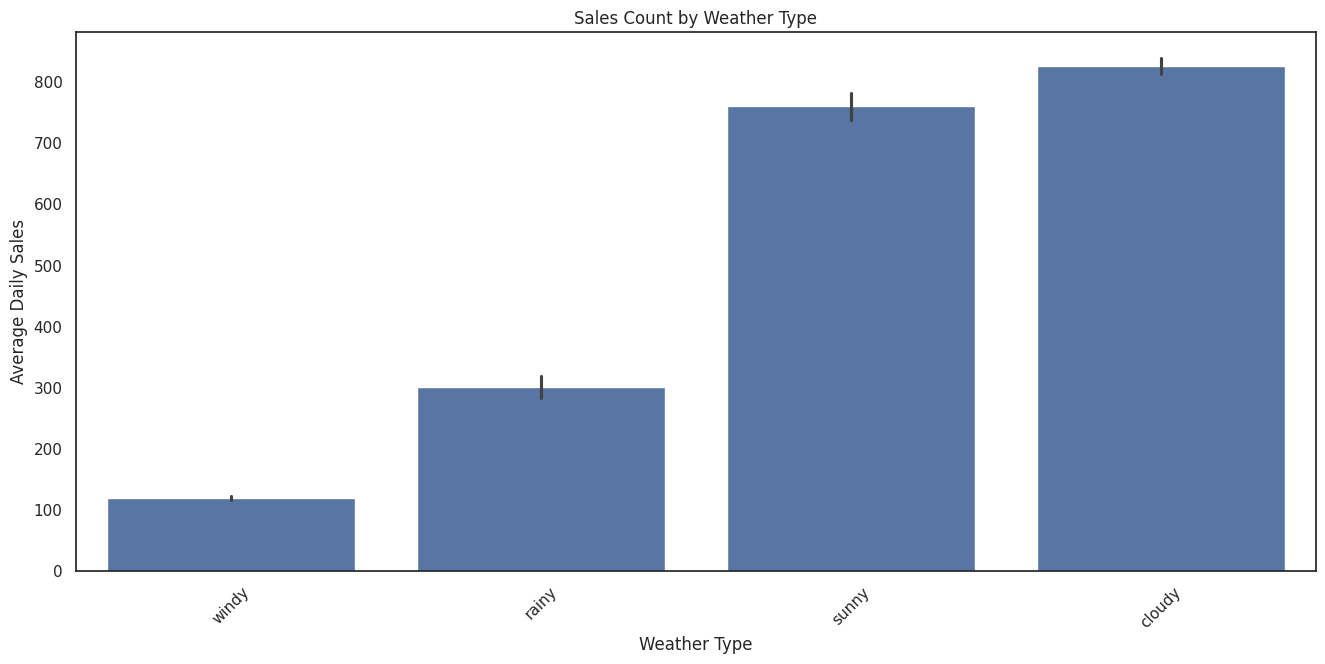

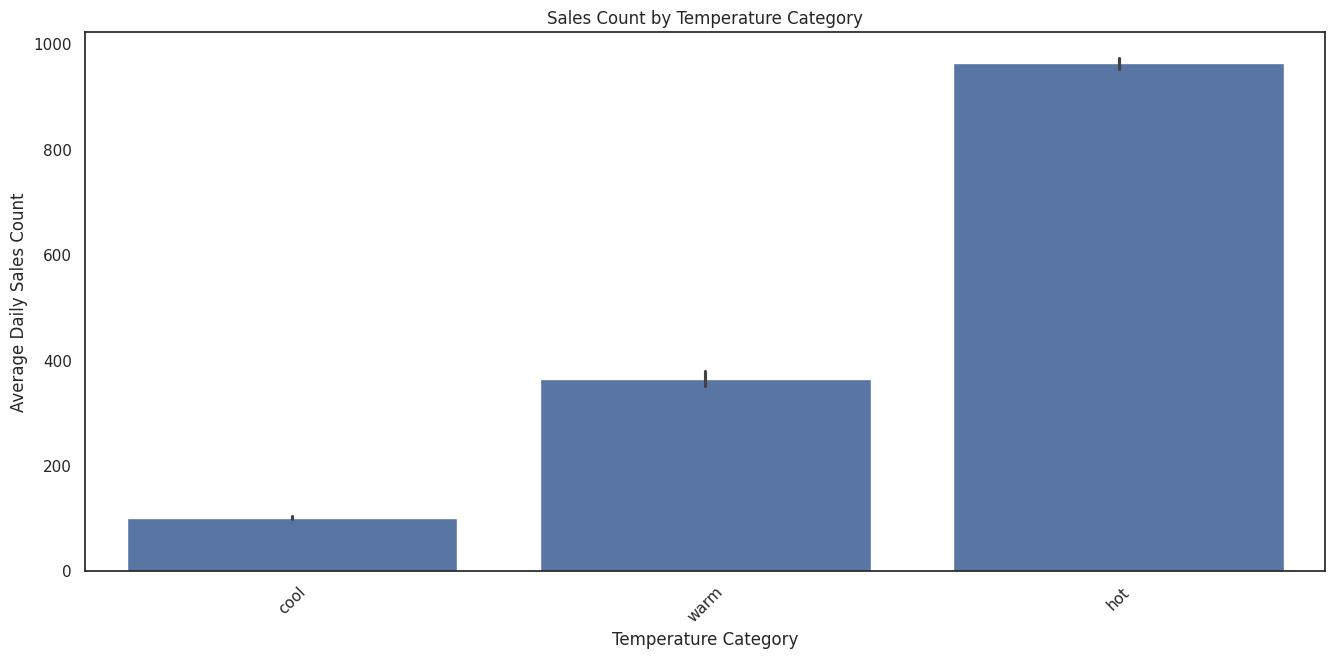

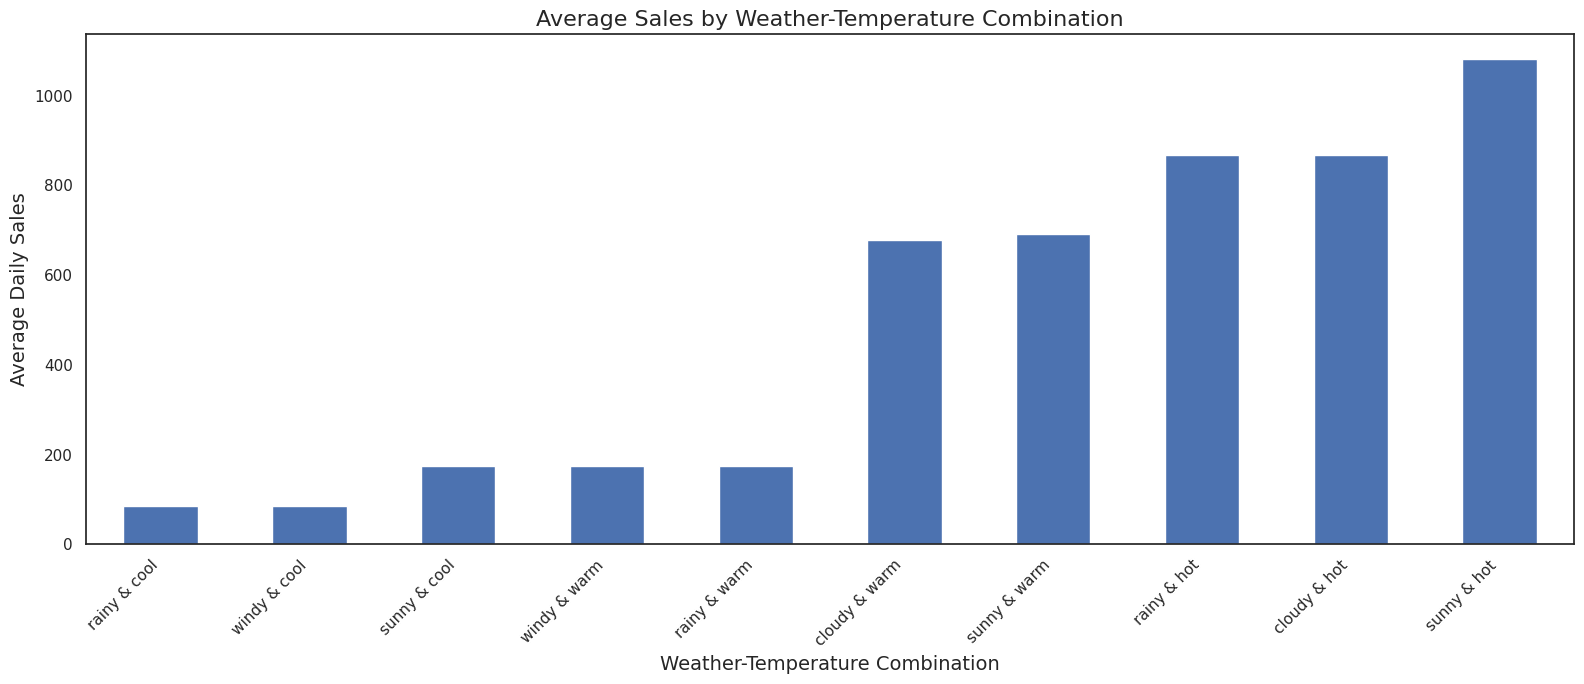

In [ ]:

# Define the mappings for weekdays and months
weekday_mapping = {
    'MON': 1, 'TUE': 2, 'WED': 3, 'THU': 4, 'FRI': 5, 'SAT': 6, 'SUN': 7
}

month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Create new columns for the mapped values
data['weekday_numeric'] = data['weekday_name'].map(weekday_mapping)
data['month_numeric'] = data['month_name'].map(month_mapping)


# Summarize sales count by categories for analysis
aggregated_data = data.groupby(['weekday_name', 'month_name', 'dominant_weather_type', 'dominant_temp_category'])['daily_sales_count'].mean().reset_index()

# Define categorical columns for one-hot encoding
categorical_columns = ['weekday_name', 'month_name', 'dominant_weather_type', 'dominant_temp_category']

# Encoding categorical variables for statistical analysis
#data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

# Set the order for weekdays and months
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set categorical type with order
data['weekday_name'] = pd.Categorical(data['weekday_name'], categories=weekday_order, ordered=True)
data['month_name'] = pd.Categorical(data['month_name'], categories=month_order, ordered=True)

# Sales count by day of the week
plt.figure(figsize=(16, 7))
sns.barplot(x='weekday_numeric', y='daily_sales_count', data=data)
plt.title('Sales Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Sales')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

# Sales count by month
plt.figure(figsize=(16, 7))
sns.barplot(x='month_numeric', y='daily_sales_count', data=data)
plt.title('Sales Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Sales')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


# Sales count by weather type
plt.figure(figsize=(16, 7))
sns.barplot(x='dominant_weather_type', y='daily_sales_count', data=data)
plt.title('Sales Count by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Average Daily Sales')
plt.xticks(rotation=45)
plt.show()

# Sales count by temperature category
plt.figure(figsize=(16, 7))
sns.barplot(x='dominant_temp_category', y='daily_sales_count', data=data)
plt.title('Sales Count by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Daily Sales Count')
plt.xticks(rotation=45)
plt.show()


# Combine the `dominant_weather_type` and `dominant_temp_category` into a single combined feature
data['weather_temp_combined'] = (
    data['dominant_weather_type'] + " & " + data['dominant_temp_category']
)

# Group by the combined feature and calculate the mean of `daily_sales_value`
weather_temp_sales = data.groupby('weather_temp_combined')['daily_sales_count'].mean()

# Plot the sales for each weather-temp combination
plt.figure(figsize=(16, 7))
weather_temp_sales.sort_values().plot(kind='bar')
plt.title('Average Sales by Weather-Temperature Combination', fontsize=16)
plt.xlabel('Weather-Temperature Combination', fontsize=14)
plt.ylabel('Average Daily Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-40-d7da7dcb643c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='daily_sales_count', data=category_sales, palette='Set2')


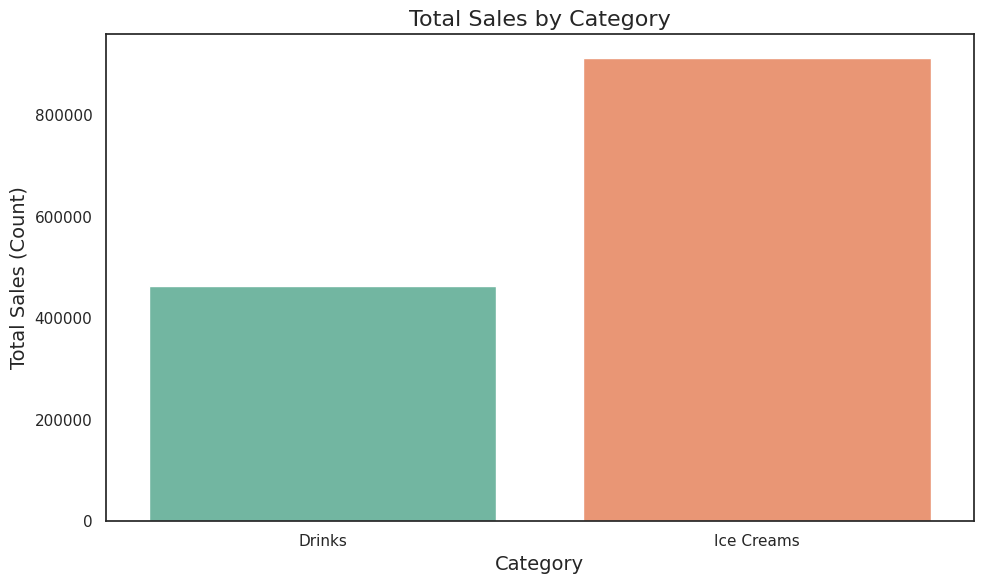

In [ ]:
# Create a new column 'category' based on 'product_type' mapping to category_labels
data['category'] = data['product_type'].map(category_labels)
# Aggregate total sales by category

category_sales = data.groupby('category')['daily_sales_count'].sum().reset_index()

# Visualization: Total Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='daily_sales_count', data=category_sales, palette='Set2')
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales (Count)', fontsize=14)
plt.tight_layout()
plt.show()


  sales_date    category  daily_sales_count
0 2019-01-04      Drinks                233
1 2019-01-04  Ice Creams                501
2 2019-01-18      Drinks                223
3 2019-01-18  Ice Creams                480
4 2019-01-24      Drinks                223


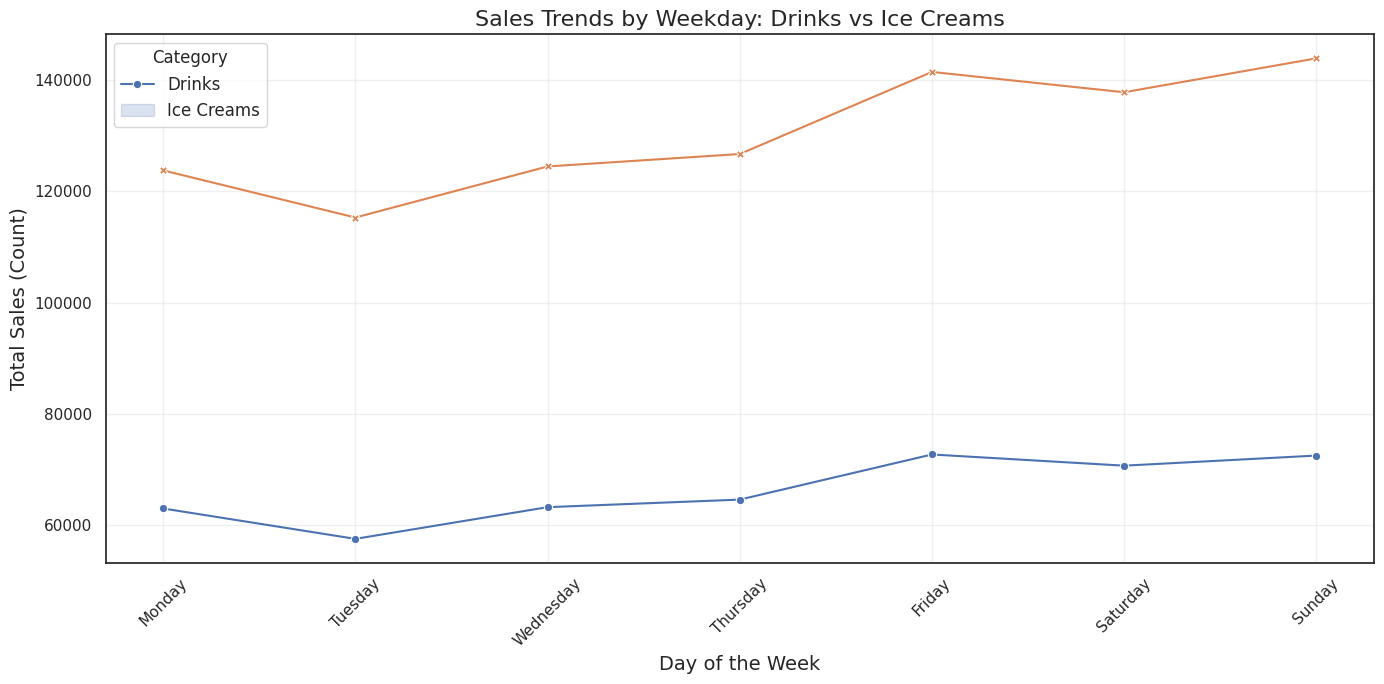

In [ ]:
# Aggregate sales by weekday and category
weekday_category_sales = data.groupby(['weekday_numeric', 'category'])['daily_sales_count'].sum().reset_index()

# Order weekdays and map numeric to names
#weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_category_sales['weekday_name'] = weekday_category_sales['weekday_numeric'].map(
    {i + 1: name for i, name in enumerate(weekday_order)}
)

# Pivot for line plot
weekday_pivot = weekday_category_sales.pivot(index='weekday_numeric', columns='category', values='daily_sales_count')

# Use the 'data' DataFrame for daily_sales_volume as it contains the 'category' column
daily_sales_volume = data.groupby(['sales_date', 'category'])['daily_sales_count'].sum().reset_index() # Changed from eda_df to data
daily_sales_volume['sales_date'] = pd.to_datetime(daily_sales_volume['sales_date'])

print(daily_sales_volume.head())  # Check the first few rows

# Visualization: Line Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekday_pivot, markers=True, dashes=False)
plt.title('Sales Trends by Weekday: Drinks vs Ice Creams', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Sales (Count)', fontsize=14)
plt.xticks(ticks=range(1, 8), labels=weekday_order, rotation=45)
plt.legend(title='Category', labels=weekday_pivot.columns, fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


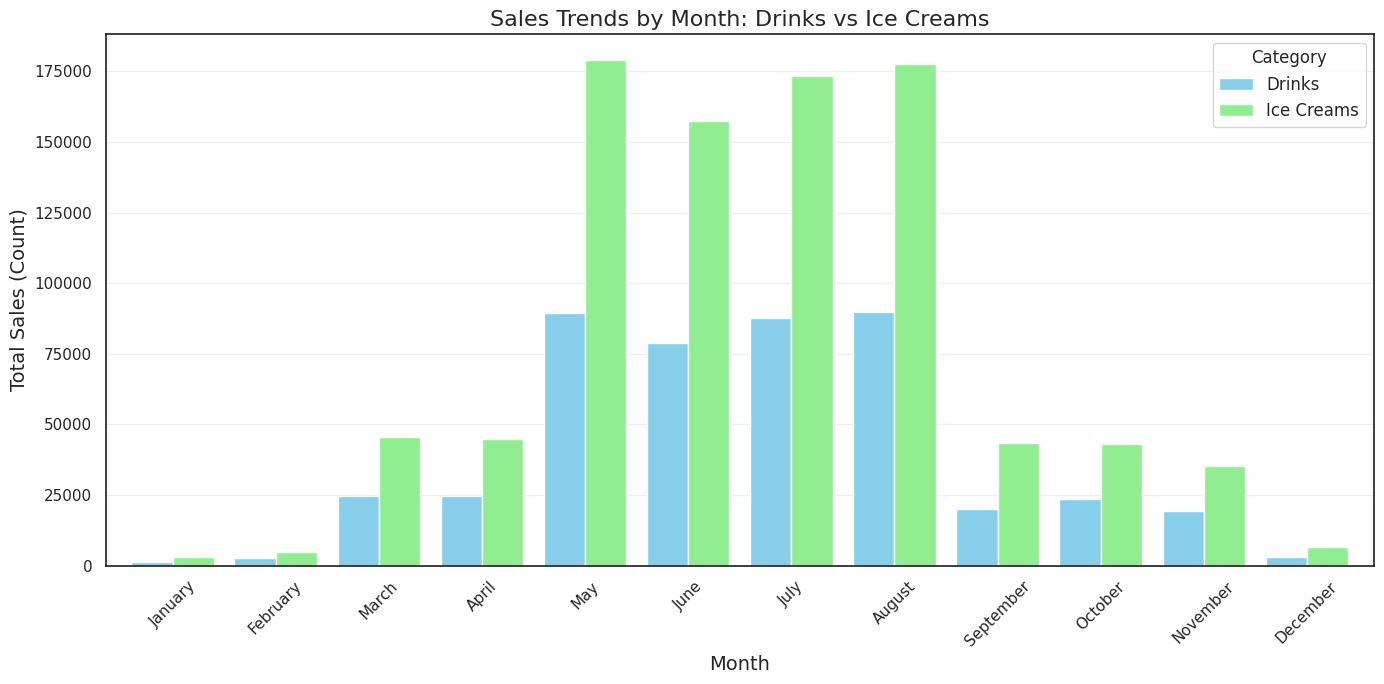

In [ ]:
# Aggregate sales by month and category
month_category_sales = data.groupby(['month_numeric', 'category'])['daily_sales_count'].sum().reset_index()

# Order months and map numeric to names
#month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_category_sales['month_name'] = month_category_sales['month_numeric'].map(
    {i + 1: name for i, name in enumerate(month_order)}
)

# Pivot for grouped bar chart
month_pivot = month_category_sales.pivot(index='month_numeric', columns='category', values='daily_sales_count')

# Visualization: Grouped Bar Chart
month_pivot.plot(kind='bar', figsize=(14, 7), width=0.8, color=['skyblue', 'lightgreen'])
plt.title('Sales Trends by Month: Drinks vs Ice Creams', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (Count)', fontsize=14)
plt.xticks(ticks=range(12), labels=month_order, rotation=45)
plt.legend(title='Category', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


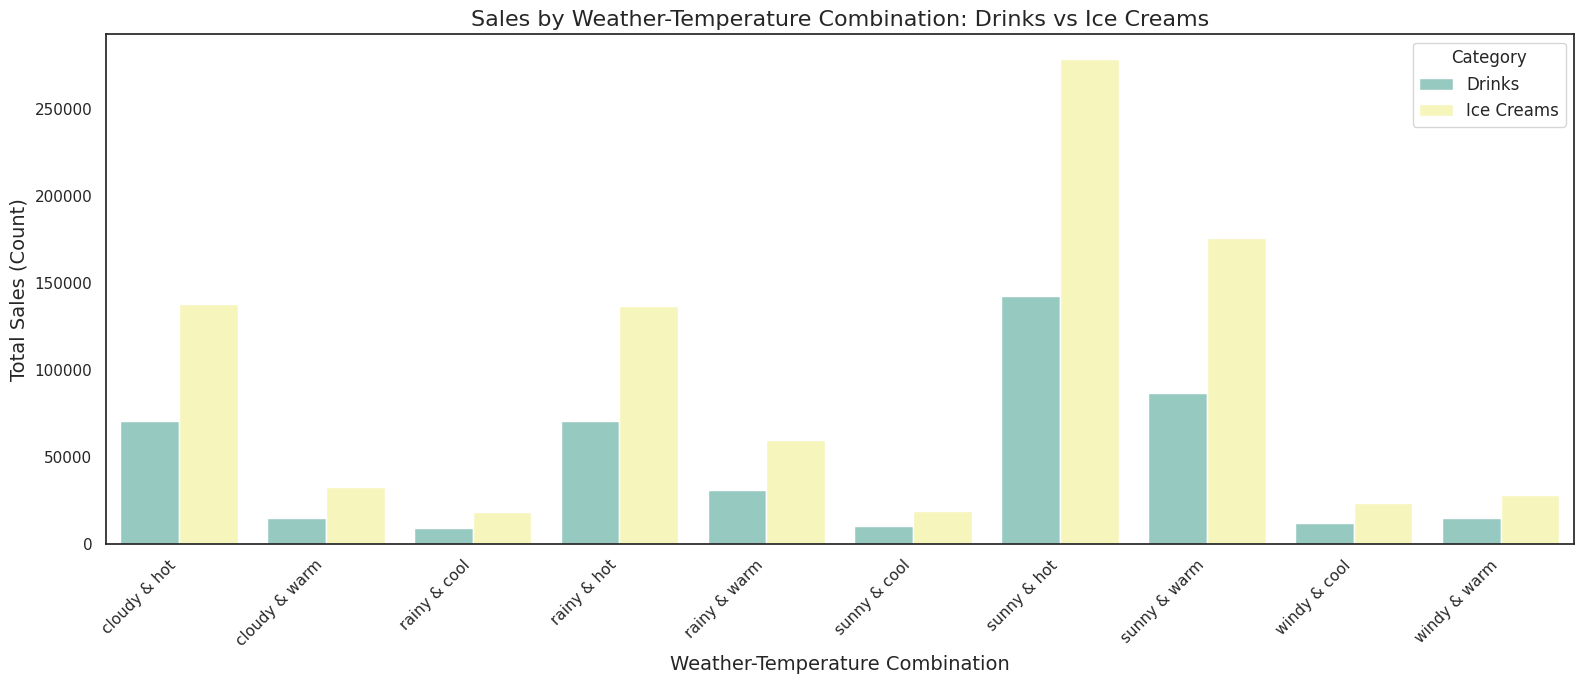

In [ ]:
# Aggregate sales by weather-temp combination and category
weather_temp_category_sales = data.groupby(['weather_temp_combined', 'category'])['daily_sales_count'].sum().reset_index()

# Visualization: Sales by Weather-Temperature Combination
plt.figure(figsize=(16, 7))
sns.barplot(
    x='weather_temp_combined', y='daily_sales_count', hue='category', data=weather_temp_category_sales, palette='Set3'
)
plt.title('Sales by Weather-Temperature Combination: Drinks vs Ice Creams', fontsize=16)
plt.xlabel('Weather-Temperature Combination', fontsize=14)
plt.ylabel('Total Sales (Count)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
cloudy_sales = weather_temp_category_sales[weather_temp_category_sales['weather_temp_combined'].str.contains('cloudy')]
cloudy_sales['percentage'] = (cloudy_sales['daily_sales_count'] / cloudy_sales['daily_sales_count'].sum()) * 100
print(cloudy_sales)


  weather_temp_combined    category  daily_sales_count  percentage
0          cloudy & hot      Drinks              70584   27.573706
1          cloudy & hot  Ice Creams             137909   53.874281
2         cloudy & warm      Drinks              14813    5.786712
3         cloudy & warm  Ice Creams              32677   12.765301


<ipython-input-44-787949c6b10d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudy_sales['percentage'] = (cloudy_sales['daily_sales_count'] / cloudy_sales['daily_sales_count'].sum()) * 100


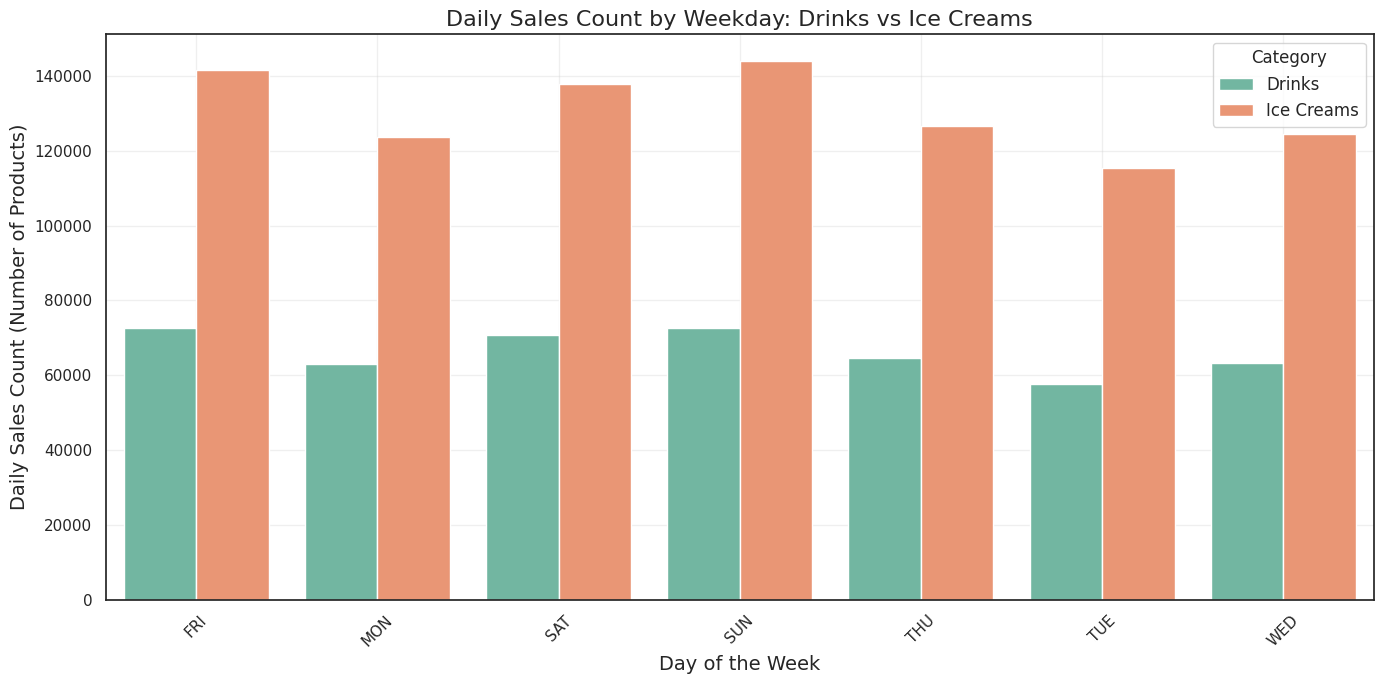

In [ ]:
# Ensure 'sales_date' is in datetime format
data['sales_date'] = pd.to_datetime(data['sales_date'])

# Extract the weekday name (e.g., Mon, Tue)
data['weekday_name'] = data['sales_date'].dt.strftime('%a').str.upper()

# Aggregate daily sales count by weekday and category
weekday_sales = data.groupby(['weekday_name', 'category'])['daily_sales_count'].sum().reset_index()


# Visualization: Bar Plot for Daily Sales Count with Weekday Labels
plt.figure(figsize=(14, 7))
sns.barplot(data=weekday_sales, x='weekday_name', y='daily_sales_count', hue='category', palette='Set2')
plt.title('Daily Sales Count by Weekday: Drinks vs Ice Creams', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Daily Sales Count (Number of Products)', fontsize=14)
plt.legend(title='Category', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


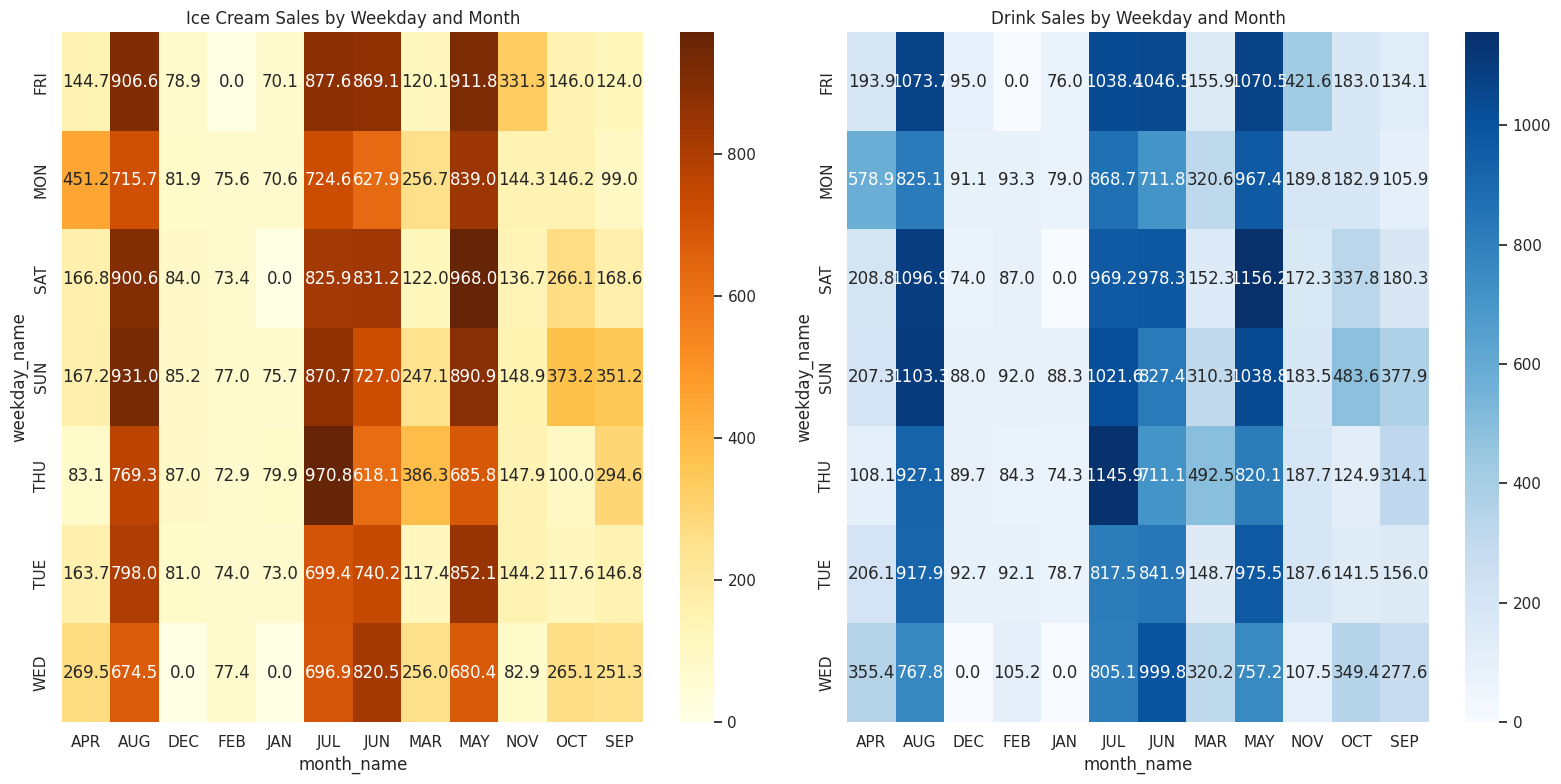

In [ ]:

#eda_df['weekday_name'] = pd.Categorical(eda_df['weekday_name'], categories=weekday_order, ordered=True)
#eda_df['month_name'] = pd.Categorical(eda_df['month_name'], categories=month_order, ordered=True)

# Filter for Ice Creams
ice_cream_data = eda_df[eda_df['product_type_label'] == 'Ice Creams']

# Create pivot table for Ice Creams
pivot_ice_cream = ice_cream_data.pivot_table(
    index='weekday_name',
    columns='month_name',
    values='daily_sales_count',
    aggfunc='mean',
    fill_value=0
)


# Filter for Drinks
drink_data = eda_df[eda_df['product_type_label'] == 'Drinks']

# Create pivot table for Drinks
pivot_drink = drink_data.pivot_table(
    index='weekday_name',
    columns='month_name',
    values='daily_sales_count',
    aggfunc='mean',
    fill_value=0
)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(pivot_ice_cream, annot=True, fmt=".1f", cmap='YlOrBr', ax=ax[0])
ax[0].set_title('Ice Cream Sales by Weekday and Month')
sns.heatmap(pivot_drink, annot=True, fmt=".1f", cmap='Blues', ax=ax[1])
ax[1].set_title('Drink Sales by Weekday and Month')
plt.tight_layout()
plt.show()


In [ ]:
# Define actual profit margins based on the analysis
profit_margins = {
    'Drinks': 0.4996,  # 49.96% profit margin
    'Ice Creams': 0.4883  # 48.83% profit margin
}

# Add the profit margin to the data
data['profit_margin'] = data['category'].map(profit_margins)

# Calculate profit contribution
data['profit_contribution'] = data['daily_sales_count'] * data['profit_margin']

# Group by category to calculate total profit contribution
profit_contribution = data.groupby('category')['profit_contribution'].sum()

# Total profit for all categories
total_profit = profit_contribution.sum()

# Calculate profit contribution percentage by category
profit_contribution_percentage = (profit_contribution / total_profit) * 100

print("Profit Contribution Percentage by Category:")
print(profit_contribution_percentage)

# Group sales by weather type and calculate total sales, ensuring case-insensitivity
weather_sales = data.groupby(data['dominant_weather_type'].str.lower())['daily_sales_count'].sum()

# Calculate total sales across all weather types
total_sales = weather_sales.sum()

# Safely access 'sunny' sales, handling cases where it's missing
sunny_sales = weather_sales.get('sunny', 0)  # Default to 0 if 'sunny' is not present
sunny_impact_score = (sunny_sales / total_sales) * 100

print(f"Weather Impact Score for Sunny Days: {sunny_impact_score:.2f}%")
print(f"Sunny days contribute {sunny_impact_score:.2f}% of total sales, highlighting their importance for Ice Creams.")


Profit Contribution Percentage by Category:
category
Drinks        34.211765
Ice Creams    65.788235
Name: profit_contribution, dtype: float64
Weather Impact Score for Sunny Days: 51.88%
Sunny days contribute 51.88% of total sales, highlighting their importance for Ice Creams.


Top 3 Drinks by Total Sales:
                                 product_name product_category  \
7             Pepsi Regular Cola 330ml bottle           Drinks   
1             Coca-Cola Soft Drink Can 330 ml           Drinks   
4  Fanta Zero Orange Soft Drink Bottle 500 ml           Drinks   

   daily_sales_count  
7             155407  
1             154762  
4             154194  

Top 3 Ice Creams by Total Sales:
               product_name product_category  daily_sales_count
9  Walls Feast Classic 90ml       Ice Creams             141010
0        Calippo Cola 105ml       Ice Creams             140499
8        Solero Exotic 90ml       Ice Creams             140191


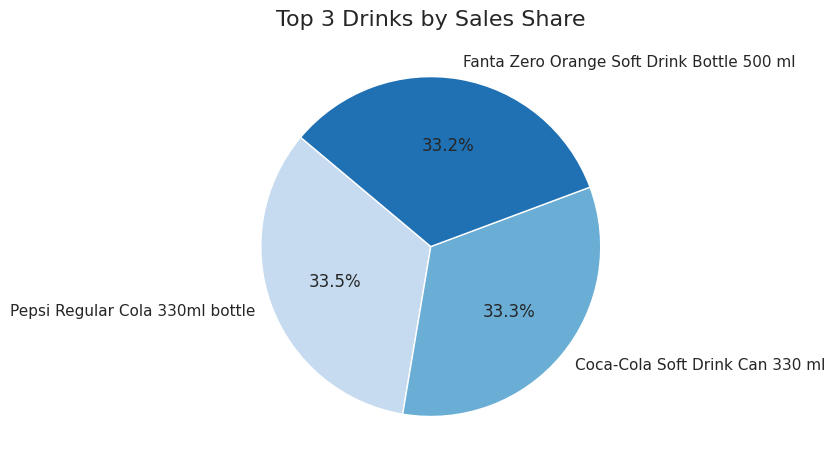

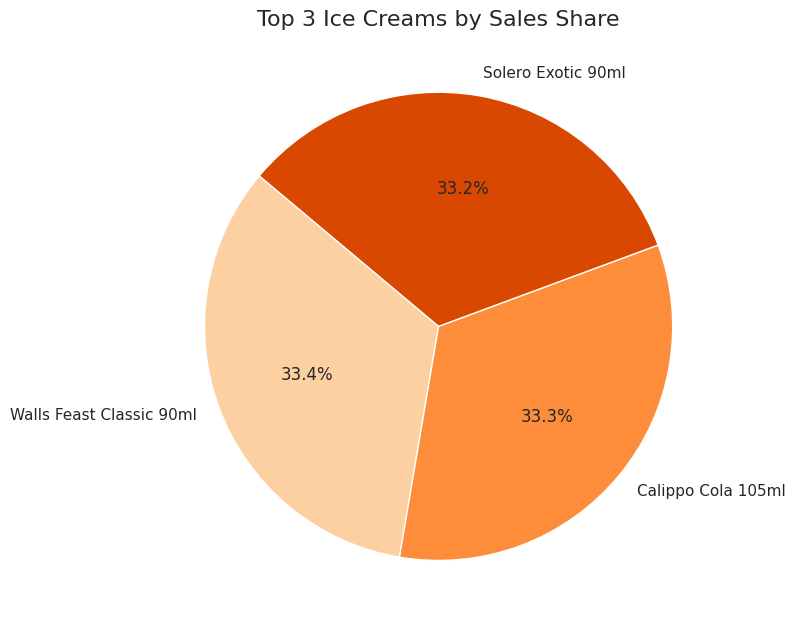

In [ ]:
# Aggregate sales by product and category
top_products = data.groupby(['product_name', 'product_category'])['daily_sales_count'].sum().reset_index()

# Sort the products by total sales count
top_products = top_products.sort_values(by='daily_sales_count', ascending=False)

# Get the top 3 products for each category
top_drinks = top_products[top_products['product_category'] == 'Drinks'].head(3)
top_ice_creams = top_products[top_products['product_category'] == 'Ice Creams'].head(3)

# Print the top 3 products for Drinks
print("Top 3 Drinks by Total Sales:")
print(top_drinks)

# Print the top 3 products for Ice Creams
print("\nTop 3 Ice Creams by Total Sales:")
print(top_ice_creams)

# Visualization: Pie Chart for Drinks (Top 3)
plt.figure(figsize=(8, 8))
plt.pie(
    top_drinks['daily_sales_count'],
    labels=top_drinks['product_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Blues', len(top_drinks))
)
plt.title('Top 3 Drinks by Sales Share', fontsize=16)
plt.tight_layout()
plt.show()

# Visualization: Pie Chart for Ice Creams (Top 3)
plt.figure(figsize=(8, 8))
plt.pie(
    top_ice_creams['daily_sales_count'],
    labels=top_ice_creams['product_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Oranges', len(top_ice_creams))
)
plt.title('Top 3 Ice Creams by Sales Share', fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-50-a266608a1c60>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='gross_profit', data=monthly_gross_profit, palette='coolwarm')


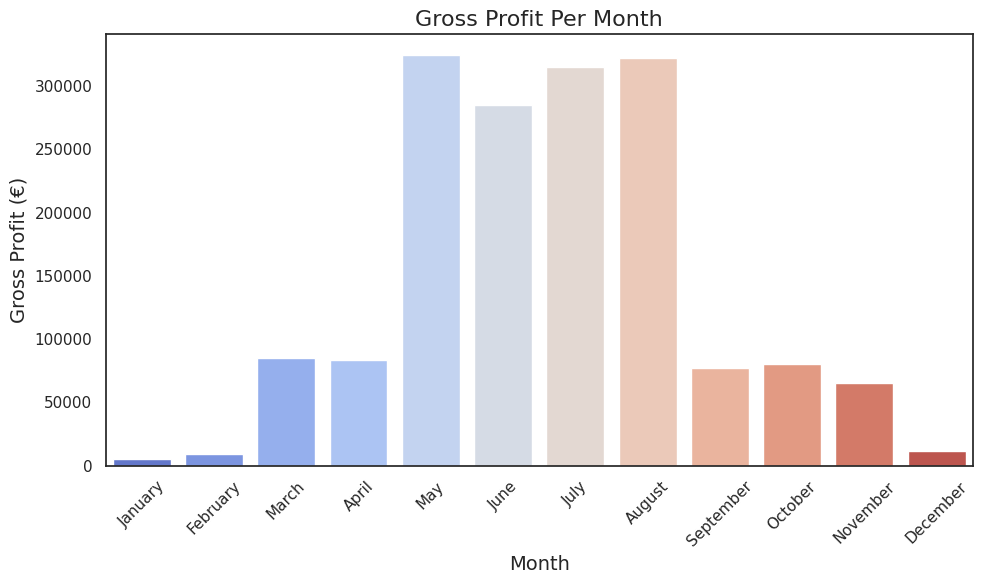

        month   gross_profit
4     January    5503.873943
3    February    8729.556730
7       March   84627.252046
0       April   83714.327560
8         May  324652.446281
6        June  285251.418722
5        July  315093.150776
1      August  322482.243012
11  September   77100.953973
10    October   79938.815549
9    November   65292.107899
2    December   11433.881418


In [ ]:

# Extract the month from the sales date
data['month'] = data['sales_date'].dt.month_name()


# Calculate gross profit using 'price' and 'daily_sales_count' instead
# Assuming 'profit_margin' is a global variable representing the profit margin
data['gross_profit'] = data['profit_margin'] * (data['price'] * data['daily_sales_count'])

# Group gross profit by month
monthly_gross_profit = data.groupby('month')['gross_profit'].sum().reset_index()

# Ensure months are ordered correctly

monthly_gross_profit['month'] = pd.Categorical(monthly_gross_profit['month'], categories=month_order, ordered=True)
monthly_gross_profit = monthly_gross_profit.sort_values('month')

# Visualization: Bar Chart for Monthly Gross Profit
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='gross_profit', data=monthly_gross_profit, palette='coolwarm')
plt.title('Gross Profit Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Gross Profit (€)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the gross profit table
print(monthly_gross_profit)

In [ ]:
# Recreating the manager column based on the day of the month, assuming your data has 'sales_date' column:
data['manager'] = data['sales_date'].dt.day.apply(lambda x: 'Lily' if x % 2 != 0 else 'Suzy')

manager_sales = data.groupby(['manager', 'weekday_name'])['daily_sales_count'].sum().reset_index()
print(manager_sales)

   manager weekday_name  daily_sales_count
0     Lily          FRI             118721
1     Lily          MON             109865
2     Lily          SAT             110578
3     Lily          SUN             110835
4     Lily          THU             105491
5     Lily          TUE              88475
6     Lily          WED              90420
7     Suzy          FRI              95494
8     Suzy          MON              76938
9     Suzy          SAT              97971
10    Suzy          SUN             105625
11    Suzy          THU              85852
12    Suzy          TUE              84394
13    Suzy          WED              97325


In [ ]:
# Add a column for absolute change in sales
monthly_sales['absolute_change'] = monthly_sales['daily_sales_count'].diff().fillna(0)

# Optional: Cap extreme growth rates (e.g., ±500%)
monthly_sales['capped_growth_rate'] = monthly_sales['growth_rate'].clip(lower=-500, upper=500)

# Display updated results
print(monthly_sales)




        month  daily_sales_count  growth_rate  absolute_change  \
4     January               4492     0.000000              0.0   
3    February               7260    61.620659           2768.0   
7       March              70245   867.561983          62985.0   
0       April              69453    -1.127482           -792.0   
8         May             268501   286.593812         199048.0   
6        June             236279   -12.000700         -32222.0   
5        July             260958    10.444855          24679.0   
1      August             267351     2.449820           6393.0   
11  September              63347   -76.305681        -204004.0   
10    October              66462     4.917360           3115.0   
9    November              54267   -18.348831         -12195.0   
2    December               9369   -82.735364         -44898.0   

    capped_growth_rate  
4             0.000000  
3            61.620659  
7           500.000000  
0            -1.127482  
8           286.

### **Analysis: Key Performance Indicators (KPIs)**

### **Overview**
This report evaluates sales trends using external factors, proposes KPIs to assess manager performance, product profitability, and overall business growth, and explains how these KPIs are influenced by external factors such as weather, temperature, seasonality, and day of the week. Additionally, insights on top-selling products are included to help managers focus on the most profitable items.

---

### **1. External Factors Affecting Sales**
Sales are influenced by various external factors, including:
- **Weather Conditions**: Weather significantly impacts customer preferences, especially for ice creams.
    - **Sunny and hot days** drive higher sales of ice creams.(51.88% contribution to total sales on sunny days).
    - Drinks show relatively steady demand but peak in warm and cloudy weather.(cloudy & hot: 27.57% for drinks).
- **Temperature Categories**: Sales patterns vary with temperature levels.
    - **Hot temperatures**:Lead to high demand for ice creams, especially in summer months.
    - **Warm Temperatures**: Sustain drink sales, ensuring stability when ice cream demand is moderate.
    - **Cool Temperatures**: Result in low sales for both categories, reducing profitability.
- **Seasonality**: Monthly trends indicate seasonal preferences.
    - Ice cream sales are significantly higher during **summer months (May–August)**, contributing significantly to gross profit during this period.
    - Drinks maintain a steady trend but peak slightly in warmer months.
- **Day of the Week**: Sales trends differ by weekday.
    - Weekends (Friday–Sunday) see higher sales, indicating busier shopping periods.
- **Top-Selling Products**:
    - Customer preferences for specific products remain steady and are less influenced by weather, making these items critical for overall sales.

---

### **2. Proposed KPIs**

#### **1. Manager Performance**
**Objective**: Assess Lily and Suzy’s individual contributions to sales.

#### **Findings**:
- **Sales Trends by Weekday**:
  - Sales consistently peak on **Friday to Sunday**, which suggests that Lily and Suzy’s schedules should prioritize these days.
  - Weekdays like **Monday and Tuesday** see lower sales, indicating potential opportunities for promotions during these periods.

- **Daily Sales Count**:
  - Ice cream contributes more significantly to total sales compared to drinks across all days.
  - Managers should focus on ice cream marketing during peak periods and on drinks during lower-demand times.

#### **Proposed KPIs**:
1. **Sales per Shift**:
   - Average sales value and volume for each shift managed by Lily or Suzy.
   - Tracks individual contributions and identifies underperformance during certain shifts.
2. **Sales by Day for Each Manager**:
   - Lily and Suzy’s performance should be assessed on a day-by-day basis, identifying patterns of high/low efficiency.

#### **Recommendations**:
- Adjust manager schedules to prioritize shifts during peak sales periods (weekends and summer months).
- Introduce incentives for managers to boost weekday performance, especially on slower days.

---

#### **2. Product Performance**
**Objective**: Compare profitability and sales efficiency of drinks and ice creams.

#### **Findings**:
- **Total Sales by Category**:
  - Ice cream sales significantly outperform drink sales overall, driven by strong demand during summer months.
  - Ice creams contribute more to overall profitability (65.79%), with drinks contributing 34.21%.
  - Drinks maintain consistent but lower sales across the year.

- **Sales Trends by Weather and Temperature**:
  - **Ice Cream**:
    - Highest sales occur on **sunny and hot days**, particularly in summer months.
  - **Drinks**:
    - More stable sales trends, with peaks during **warm and cloudy conditions**.

- **Top-Selling Products**:
  - **Top 3 Drinks**:
    - **Pepsi Regular Cola 330ml bottle**: 155,407 units sold.
    - **Coca-Cola Soft Drink Can 330ml**: 154,762 units sold.
    - **Fanta Zero Orange Soft Drink Bottle 500ml**: 154,194 units sold.
  - **Top 3 Ice Creams**:
    - **Walls Feast Classic 90ml**: 141,010 units sold.
    - **Calippo Cola 105ml**: 140,499 units sold.
    - **Solero Exotic 90ml**: 140,191 units sold.

#### **Proposed KPIs**:
1. **Profitability by Category**:
   - Track profit margins for drinks and ice creams separately to identify which product contributes more to overall profitability.
2. **Sales Efficiency (Units Sold per Day)**:
   - Assess daily sales volume relative to weather and temperature conditions.
3. **Top Product Performance**:
   - Monitor sales and profitability of the top-selling products across both categories.

#### **Recommendations**:
- Prioritize inventory and marketing efforts on **ice creams during summer** and sunny days.
- Leverage promotions for drinks during off-peak seasons to sustain steady sales growth.
- Focus on stocking and promoting the top 3 products in each category to maintain consistent sales.

---

#### **3. Overall Business Growth**
**Objective**: Provide insights into trends and opportunities for growth.

#### **Findings**:
- **Seasonality**:
  - Sales peak during **summer months**, driven by high demand for ice cream.
  - Winter months see reduced overall sales, creating opportunities for targeted promotions.

- **Sales by Weather-Temperature Combination**:
  - Ice creams dominate during **sunny & hot weather**.
  - Drinks show consistent performance across varying weather, with higher sales during **cloudy & warm days**.

- **Heatmaps**:
  - Weekday-month analysis highlights **weekend peaks in summer** for both drinks and ice creams.
  - Drinks perform better in colder months compared to ice creams.

#### **Proposed KPIs**:
1. **Seasonal Growth Rate**:
   - Measure growth in sales volume and revenue compared to the same period in previous years.
2. **Weather-Driven Sales Forecast**:
   - Use weather data to predict demand and adjust inventory dynamically.
3. **Top-Selling Products Share**:
   - Analyze the contribution of the top 3 products in each category to overall revenue growth.

#### **Recommendations**:
- Implement a **weather-driven inventory system** to dynamically adjust stock levels for ice creams and drinks based on weather forecasts.
- Introduce **winter promotions** targeting drinks to compensate for reduced ice cream sales during colder months.
- Develop strategies for **business growth in non-peak months**, such as discounts or bundled offers.
- Focus on promoting the top 3 products in each category year-round to sustain steady sales and customer loyalty.

---

### **Visualization Highlights**

1. **Total Sales by Category**: Bar chart shows ice creams as the dominant product category, with drinks providing steady sales.
2. **Sales Trends by Month**: Ice creams peak in summer (May–August), while drinks are more stable.
3. **Sales Trends by Weekday**: Weekends (Friday–Sunday) dominate sales, requiring more staff and inventory.
4. **Sales by Weather-Temperature Combination**: Sunny & hot weather leads to a surge in ice cream sales, while drinks peak in warm and cloudy conditions.
5. **Heatmaps for Ice Creams and Drinks**: Detailed weekday and monthly trends provide granular insights for each category.
6. **Pie Charts for Top-Selling Products**: Top 3 drinks and ice creams by sales share highlight the critical products driving overall sales.

---

### **4. Recommendations for Lily and Suzy**

1. **Optimize Inventory**:
   - Increase ice cream stock during summer months and on sunny & hot days.
   - Maintain steady drink inventory, with slight increases for warm and cloudy weather.

2. **Prioratize work scheduling**:
   - Redistribute work hours to ensure both Lily and Suzy are present during peak days
   - Schedule rest or lighter duties for one person on slower weekdays.
   - Implement a shared rotation plan to balance workload during high-demand periods.


3. **Targeted Promotions**:
   - Run promotions on drinks during winter to boost sales.
   - Focus ice cream promotions on weekdays with lower demand (e.g., Monday, Tuesday) in summer.

4. **Focus on Top-Selling Products**:
   - Ensure stock availability and promotions for the top 3 products in both drinks and ice creams to maximize profitability and meet customer preferences.

5. **Use Weather Forecasts**:
   - Align inventory and staffing based on weather predictions, particularly for sunny and hot days.


---

### **5. External Factors Affecting Sales and KPIs**

#### **Weather Conditions**
- **Effect on KPIs**:
  - **Profitability by Category**:
    - Positive: Sunny weather significantly increases ice cream sales, contributing to gross profit (51.88% of total sales on sunny days).
    - Negative: Cold and windy weather results in low sales, especially for ice creams, reducing profitability during winter.
  - **Weather-Driven Sales Efficiency**:
    - Positive: Drinks perform better during cloudy and warm conditions, stabilizing revenue when ice cream sales dip.
    - Negative: Sales efficiency for both categories is lowest during windy and cold weather.

#### **Temperature Categories**
- **Effect on KPIs**:
  - **Profitability by Category**:
    - Positive: Hot temperatures drive strong demand for ice creams, boosting profitability.
    - Negative: Cool temperatures reduce ice cream sales and profitability, as shown in gross profit trends for colder months.
  - **Weather-Driven Sales Efficiency**:
    - Positive: Warm conditions sustain drink sales across seasons.
    - Negative: Cool conditions significantly lower efficiency for both categories.

#### **Seasonality**
- **Effect on KPIs**:
  - **Seasonal Growth Rate**:
    - Positive: Summer months (May–August) see peaks in sales and profitability due to ice cream demand.
    - Negative: Winter months (November–February) see a sharp decline in overall sales and profitability, requiring targeted promotions.
  - **Gross Profit by Month**:
    - Positive: May–August drives the majority of gross profit.
    - Negative: Months like January and February show very low gross profit.

#### **Day of the Week**
- **Effect on KPIs**:
  - **Sales per Shift**:
    - Positive: Weekends (Friday–Sunday) consistently generate higher sales, making shifts during these days more profitable for Lily and Suzy.
    - Negative: Weekdays (Monday–Wednesday) are less productive and require strategies to increase sales.
  - **Weekend vs Weekday Efficiency**:
    - Positive: Ice creams perform better on weekends, while drinks have steadier trends across the week.
    - Negative: Weekday efficiency is lower overall, with dips in demand on Monday and Tuesday.

---



##Task 6: Profit-Sharing Proposal

• Propose a profit-sharing ratio based on total sales contributions

• Adjust the ratio considering efficiency metrics and KPIs

• Provide recommendations to ensure fairness and motivation

In [ ]:
# Ensure 'sales_date' is in date format
main_merged_data['sales_date'] = pd.to_datetime(main_merged_data['sales_date'], errors='coerce')

# Combine weather conditions into a single column
main_merged_data['weather_condition'] = main_merged_data.apply(
    lambda row: 'Rainy' if row['dominant_weather_type_rainy'] == 1 else
                'Sunny' if row['dominant_weather_type_sunny'] == 1 else
                'Windy' if row['dominant_weather_type_windy'] == 1 else 'Other', axis=1)

# Define KPIs: daily average sales, sales stability, and sales growth rate
kpis = main_merged_data.groupby(['manager', 'weather_condition']).agg(
    Daily_Average_Sales=('daily_sales_value', 'mean'),
    Sales_Stability=('daily_sales_value', 'std'),  # Sales volatility
    Sales_Growth_Rate=('daily_sales_value', lambda x: (x.max() - x.min()) / x.min() if x.min() > 0 else None)  # Growth rate
).reset_index()

In [ ]:
# Step 1: Calculate total sales contribution
total_sales = main_merged_data.groupby('manager')['daily_sales_value'].sum().reset_index()
total_sales.columns = ['manager', 'Total_Sales']
print("Step 1: Total Sales Contribution")
print(total_sales)

# Step 2: Calculate efficiency metrics (stability and growth rate)
efficiency_metrics = kpis.groupby('manager').agg(
    Average_Stability=('Sales_Stability', 'mean'),
    Average_Growth_Rate=('Sales_Growth_Rate', 'mean')
).reset_index()
print("\nStep 2: Efficiency Metrics (Stability and Growth Rate)")
print(efficiency_metrics)

# Step 3: Merge total sales and efficiency metrics
profit_sharing_data = pd.merge(total_sales, efficiency_metrics, on='manager')
print("\nStep 3: Merged Data (Total Sales + Efficiency Metrics)")
print(profit_sharing_data)

# Step 4: Calculate individual contribution weights
# Sales contribution
profit_sharing_data['Sales_Contribution'] = profit_sharing_data['Total_Sales'] / profit_sharing_data['Total_Sales'].sum()
print("\nStep 4.1: Sales Contribution")
print(profit_sharing_data[['manager', 'Sales_Contribution']])

# Stability weight
profit_sharing_data['Stability_Weight'] = 1 / profit_sharing_data['Average_Stability']  # Lower volatility is preferred
print("\nStep 4.2: Stability Weight")
print(profit_sharing_data[['manager', 'Stability_Weight']])

# Growth rate weight
profit_sharing_data['Growth_Weight'] = profit_sharing_data['Average_Growth_Rate'] / profit_sharing_data['Average_Growth_Rate'].sum()
print("\nStep 4.3: Growth Weight")
print(profit_sharing_data[['manager', 'Growth_Weight']])

# Step 5: Calculate adjusted contribution weights
profit_sharing_data['Adjusted_Contribution'] = (
    profit_sharing_data['Sales_Contribution'] * 0.4 +  # 40% weight to sales contribution
    profit_sharing_data['Stability_Weight'] * 0.4 +    # 40% weight to stability
    profit_sharing_data['Growth_Weight'] * 0.2         # 20% weight to growth rate
)
print("\nStep 5: Adjusted Contribution (Weighted Combination)")
print(profit_sharing_data[['manager', 'Adjusted_Contribution']])

# Step 6: Calculate final profit-sharing ratio
profit_sharing_data['Profit_Sharing_Ratio'] = profit_sharing_data['Adjusted_Contribution'] / profit_sharing_data['Adjusted_Contribution'].sum()
print("\nStep 6: Final Profit-Sharing Ratio")
print(profit_sharing_data[['manager', 'Profit_Sharing_Ratio']])

Step 1: Total Sales Contribution
  manager  Total_Sales
0    Lily   1805302.65
1    Suzy   1582490.01

Step 2: Efficiency Metrics (Stability and Growth Rate)
  manager  Average_Stability  Average_Growth_Rate
0    Lily         581.250356            12.030887
1    Suzy         617.280892            13.011022

Step 3: Merged Data (Total Sales + Efficiency Metrics)
  manager  Total_Sales  Average_Stability  Average_Growth_Rate
0    Lily   1805302.65         581.250356            12.030887
1    Suzy   1582490.01         617.280892            13.011022

Step 4.1: Sales Contribution
  manager  Sales_Contribution
0    Lily            0.532885
1    Suzy            0.467115

Step 4.2: Stability Weight
  manager  Stability_Weight
0    Lily           0.00172
1    Suzy           0.00162

Step 4.3: Growth Weight
  manager  Growth_Weight
0    Lily        0.48043
1    Suzy        0.51957

Step 5: Adjusted Contribution (Weighted Combination)
  manager  Adjusted_Contribution
0    Lily               0.30

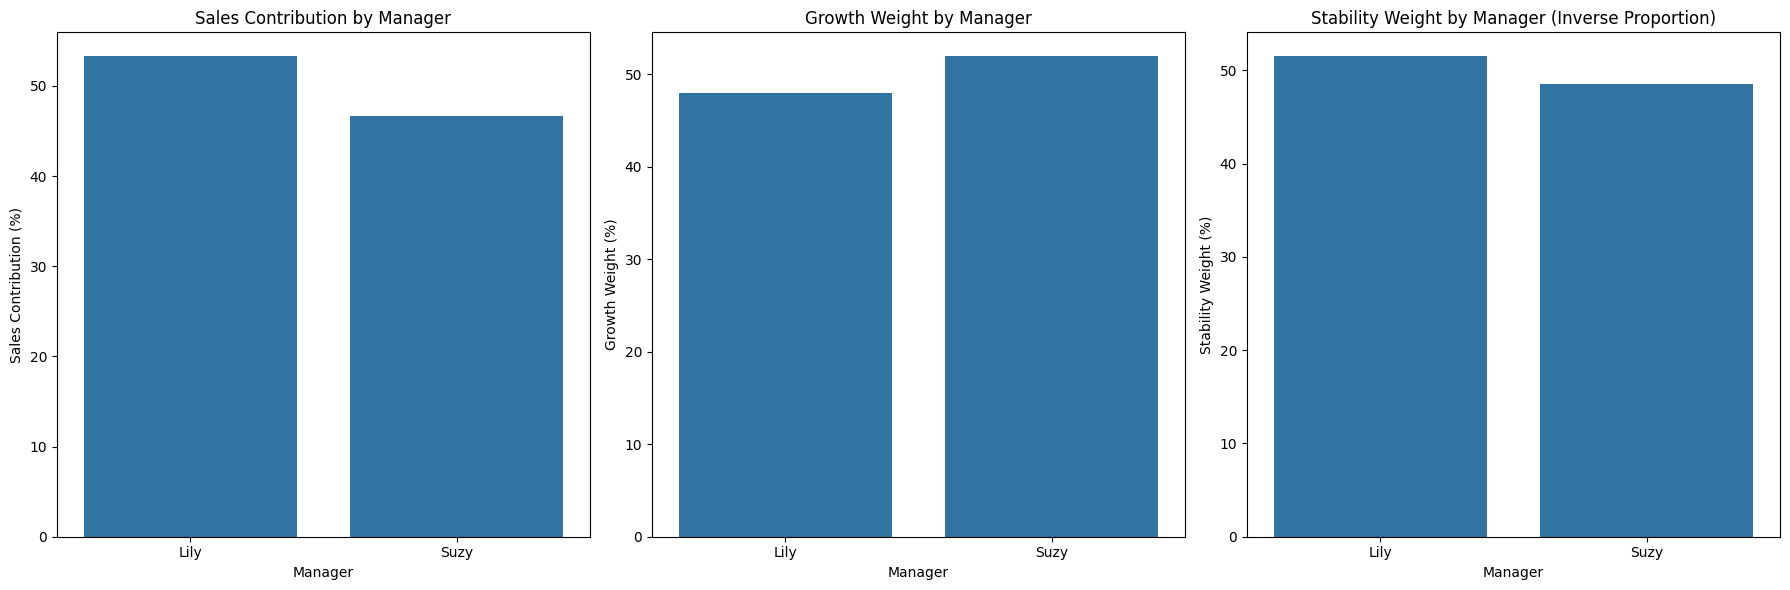

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your merged_data DataFrame contains the necessary information

# ... (Previous code for Sales Contribution and Stability calculations) ...

# Step 4.1: Sales Contribution
sales_contribution_data = pd.DataFrame({'manager': ['Lily', 'Suzy'], 'Sales_Contribution': [0.532885, 0.467115]})
sales_contribution = sales_contribution_data.set_index('manager')['Sales_Contribution'] * 100

# Step 4.3: Growth Weight
growth_weights = pd.DataFrame({'manager': ['Lily', 'Suzy'], 'Growth_Weight': [0.48043, 0.51957]})
growth_weights_percentage = growth_weights.set_index('manager')['Growth_Weight'] * 100

# Stability Weight (as percentage)
stability_weights = pd.DataFrame({'manager': ['Lily', 'Suzy'], 'Stability_Weight': [0.00172, 0.00162]})

# Calculate total stability weight
total_stability_weight = stability_weights['Stability_Weight'].sum()

# Calculate stability weight percentage for each manager
stability_weights['Stability_Weight_Percentage'] = (stability_weights['Stability_Weight'] / total_stability_weight) * 100

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Sales Contribution subplot
sns.barplot(x=sales_contribution_data['manager'], y=sales_contribution_data['Sales_Contribution'] * 100, ax=axes[0])
axes[0].set_title('Sales Contribution by Manager')
axes[0].set_xlabel('Manager')
axes[0].set_ylabel('Sales Contribution (%)')

# Growth Weight subplot
sns.barplot(x=growth_weights['manager'], y=growth_weights['Growth_Weight'] * 100, ax=axes[1])
axes[1].set_title('Growth Weight by Manager')
axes[1].set_xlabel('Manager')
axes[1].set_ylabel('Growth Weight (%)')

# Stability Weight subplot
sns.barplot(x=stability_weights['manager'], y=stability_weights['Stability_Weight_Percentage'], ax=axes[2])
axes[2].set_title('Stability Weight by Manager (Inverse Proportion)')  # Added "(Inverse Proportion)"
axes[2].set_xlabel('Manager')
axes[2].set_ylabel('Stability Weight (%)')

# Adjust layout and display
plt.tight_layout()
plt.show()

<ipython-input-71-5a285dc22515>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manager', y='Profit_Sharing_Ratio', data=profit_sharing_df, palette='viridis')


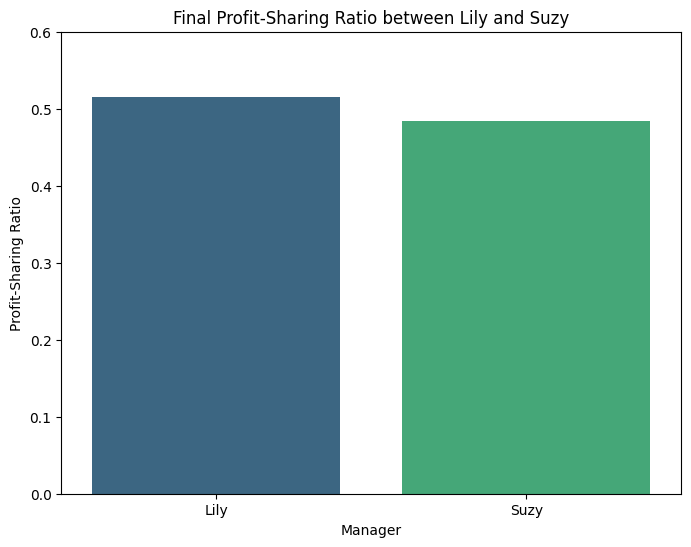

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

profit_sharing_df = pd.DataFrame({'manager': ['Lily', 'Suzy'], 'Profit_Sharing_Ratio': [0.515399, 0.484601]})

plt.figure(figsize=(8, 6))
sns.barplot(x='manager', y='Profit_Sharing_Ratio', data=profit_sharing_df, palette='viridis')
plt.title('Final Profit-Sharing Ratio between Lily and Suzy')
plt.xlabel('Manager')
plt.ylabel('Profit-Sharing Ratio')

# Set the y-axis limit to 60% (0.6)
plt.ylim(0, 0.6)

plt.show()

####Analysis Profit Sharing Proposal

###**Propose a profit-sharing ratio based on total sales contributions**
###**1.1.** Total sales contribution = Total sales of manager / Total sales of managers.
###**1.2.** Lily's total sales is 1805302.65, total sales contribution of Lily is 53.3%. Suzy's total sales is 1582490.01, total sales contribution of Suzy is 46.7%.
###**1.3.** So the Profit share ratio of Lily is 53.3%, the profit of share ratio of Suzy is 46.7% base on the total sales contribution.

##**2.** **Adjust the ratio considering efficiency metrics and KPIs**
###**2.1.** Theory about efficiency metrics in this ice cream business case.
###The manager's efficiency metrics consist of three components in this case: Sales contribution, Average stability and Average growth rate. According to Kaplan et al.'s “Balanced Scorecard” study, the four main perspectives that influence organisational performance are finance, customers, business processes within the organisation, and learning and growth. Continuous learning and growth of employees has a positive impact on an organisation's ability to innovate and perform (Kaplan, 1996).In this case, managers' sales contribution and growth rates are included in efficiency metrics.
###In the balanced scorecard study by kaplan et al, process quality and volatility are the core factors in measuring organisational efficiency. By monitoring the volatility of processes, organisations can identify the causes of wasted resources and improve the efficiency of organisational operations (Kaplan 1992). So manager's stability is also one of the important factor to define efficiency metrics in this case.
###**2.2.** Lily's Average stability is 581.25 and Average growth rate is 12.03%.
###Suzy's Average stability is 617.28 and Average growth rate is 13.01%.
###**2.3.** Lily's total sales is 1805302.65, total sales contribution of Lily is 53.3%.
###Suzy's total sales is 1582490.01, total sales contribution of Suzy is 46.7%.
###**2.4.** Stabiliity Weight = 1 / Average stability. Stability weight of Lily is 0.00172, Stability weight of Suzy is 0.00162. Suzy has higher sales stability.
###**2.5.** Growth weight = Growth weight of manager / Total Growth weight of managers. Growth weight of Lily is 48.04%, Growth weight of Suzy is 51.96%.
###**2.6.** In order to rationally assign the three metrics to the calculation of Lily and Suzy's weighted profit share ratio, we need to first define the strategy of this company. The business of this company is an ice cream truck, which is a fast moving consumer good. According to Miller's research, sales is the most important indicator for the FMCG industry and even the weight should be 90% (N. Miller, 2024). However combining this case, the sales of ice cream depend heavily on the weather. So even though managers' sales contribution should have a larger weight, the weight of stability is also important, especially for a product that is more sensitive to external factors. So to combine the strategies that should be followed for this ice cream truck, we would weight sales contribution at 40%, stability at 40%, and growth rate at 20%. The Adjusted profit contribution (Weighted combination). The adjusted contribution = 40% * Sales contribution + 40% * Average stability weight + 20% * Growth weight. Adjusted contribution of Lily is 30.99%, Adjusted contribution of Suzy is 29.14%.
###**2.7.** Calculate Profit share ratio based on Lily and Suzy's adjusted contributions. Profit share ratio = Adjuster contribution manager / Total Adjusted contribution managers. The final profit share ratio of Lily is 51.54%, final profit share ratio of Suzy is 48.46%.

##**3.** **Provide recommendations to ensure fairness and motivation**
###Based on current sales, Lily's sales contribution is greater than Suzy's and the weighted contribution is slightly greater than Suzy's. The business owner should consider not only the sales contribution of the two experiences, but also the efficiency metrics. That is, incentivise the two managers based on Adjust profit share ratio. However, since Suzy has a higher Growth weight than Lily, incentivising Suzy more may have a positive impact on their subsequent firm performance.

### **Product-Level Sales Efficiency Metrics Analysis**

---

### **1. Metrics Used**

1. **Total Sales**:
   - **Definition**: Aggregated sales revenue for each product.
   - **Formula**:
     \[
     \text{Total Sales} = \sum (\text{daily\_sales\_value})
     \]

2. **Units Sold**:
   - **Definition**: Total number of units sold for each product.
   - **Formula**:
     \[
     \text{Units Sold} = \sum (\text{daily\_sales\_count})
     \]

3. **Profit Per Unit**:
   - **Definition**: Average profit generated per unit sold.
   - **Formula**:
     \[
     \text{Profit Per Unit} = \frac{\text{Total Profit}}{\text{Units Sold}}
     \]

4. **Units Per Day**:
   - **Definition**: Average number of units sold daily for each product.
   - **Formula**:
     \[
     \text{Units Per Day} = \frac{\text{Units Sold}}{\text{Total Days}}
     \]

5. **Total Days**:
   - **Definition**: Number of unique days with sales data for each product.
   - **Formula**:
     \[
     \text{Total Days} = \text{Count of Unique Sales Dates}
     \]

6. **Total Profit**:
   - **Definition**: Total profit generated for each product.
   - **Formula**:
     \[
     \text{Total Profit} = \text{Total Sales} \times \text{Profit Margin}
     \]
   - **Assumption**: Profit Margin = 0.4 (40%).

7. **Total Costs**:
   - **Definition**: Total costs incurred for each product.
   - **Formula**:
     \[
     \text{Total Costs} = \text{Total Sales} - \text{Total Profit}
     \]

8. **Profit Per Day**:
   - **Definition**: Average profit generated daily for each product.
   - **Formula**:
     \[
     \text{Profit Per Day} = \frac{\text{Total Profit}}{\text{Total Days}}
     \]

9. **Average Daily Sales**:
   - **Definition**: Average daily sales revenue for each product.
   - **Formula**:
     \[
     \text{Average Daily Sales} = \frac{\text{Total Sales}}{\text{Total Days}}
     \]

10. **Volume Efficiency**:
    - **Definition**: Average profit generated per unit sold.
    - **Formula**:
      \[
      \text{Volume Efficiency} = \frac{\text{Total Profit}}{\text{Units Sold}}
      \]

---

### **2. Results**

| **Product Name**                              | **Total Sales** | **Units Sold** | **Profit Per Unit** | **Units Per Day** | **Total Days** | **Total Profit** | **Profit Per Day** | **Average Daily Sales** | **Total Costs** | **Volume Efficiency** |
|-----------------------------------------------|-----------------|----------------|----------------------|-------------------|----------------|------------------|--------------------|-------------------------|-----------------|-------------------------|
| Calippo Cola 105ml                            | 279,593.01      | 140,499        | 0.80                 | 466.77            | 301            | 111,837.20       | 371.55             | 928.88                  | 167,755.81      | 0.80                   |
| Coca-Cola Soft Drink Can 330 ml               | 230,595.38      | 154,762        | 0.60                 | 514.16            | 301            | 92,238.15        | 306.44             | 766.10                  | 138,357.23      | 0.60                   |
| Cornetto Classico 120ml                       | 457,397.64      | 114,636        | 1.60                 | 380.85            | 301            | 182,959.06       | 607.84             | 1,519.59                | 274,438.58      | 1.60                   |
| Cornetto Soft Chocolate 140ml                 | 466,969.65      | 117,035        | 1.60                 | 388.82            | 301            | 186,787.86       | 620.56             | 1,551.39                | 280,181.79      | 1.60                   |
| Fanta Zero Orange Soft Drink Bottle 500 ml    | 383,943.06      | 154,194        | 1.00                 | 512.27            | 301            | 153,577.22       | 510.22             | 1,275.56                | 230,365.84      | 1.00                   |
| Magnum Double Gold Caramel Billionaire 85ml   | 389,770.42      | 130,358        | 1.20                 | 433.08            | 301            | 155,908.17       | 517.97             | 1,294.92                | 233,862.25      | 1.20                   |
| Magnum Vegan Classic 90ml                     | 388,377.08      | 129,892        | 1.20                 | 431.53            | 301            | 155,350.83       | 516.12             | 1,290.29                | 233,026.25      | 1.20                   |
| Pepsi Regular Cola 330ml bottle               | 231,556.43      | 155,407        | 0.60                 | 516.30            | 301            | 92,622.57        | 307.72             | 769.29                  | 138,933.86      | 0.60                   |
| Solero Exotic 90ml                            | 278,980.09      | 140,191        | 0.80                 | 465.75            | 301            | 111,592.04       | 370.74             | 926.84                  | 167,388.05      | 0.80                   |
| Walls Feast Classic 90ml                      | 280,609.90      | 141,010        | 0.80                 | 468.47            | 301            | 112,243.96       | 372.90             | 932.26                  | 168,365.94      | 0.80                   |

---

### **3. Overall Summary**

- **High Performers**:
  - **Cornetto Soft Chocolate 140ml** and **Cornetto Classico 120ml** stand out with the highest **Profit Per Unit**, **Volume Efficiency**, and **Total Profit**, making them key drivers of overall profitability.
- **Steady Contributors**:
  - Products like **Fanta Zero Orange** and **Magnum Double Gold** demonstrate balanced profitability and sales volume, providing consistent support to total revenue.
- **Opportunities for Growth**:
  - **Coca-Cola Soft Drink Can** and **Pepsi Regular Cola Bottle** show lower profitability metrics. Strategies like price adjustments or cost optimizations could help improve their contribution.

---

### **Conclusion**

This analysis highlights the importance of aligning inventory priorities with high-performing products like the Cornetto range and Magnum variants. Efforts should focus on improving the profitability of low-margin products, such as Coca-Cola and Pepsi, to enhance overall sales efficiency. Balancing **Total Costs** with **Volume Efficiency** offers actionable insights for optimizing product-level performance.

## Task 7: Impact of Profit Margins

• Assume drinks have a larger profit margin than ice creams

• Recalculate profit shares factoring in profit margins

• Discuss how profit margins influence procurement and sales strategies

In [ ]:
# Step 1: Identify columns containing product names
product_columns = [col for col in main_merged_data.columns if 'product_name_' in col]

# Step 2: Transform multiple columns into a standardized structure
product_data = main_merged_data.melt(
    id_vars=[col for col in main_merged_data.columns if col not in product_columns],
    value_vars=product_columns,
    var_name='product_name',
    value_name='quantity'
)

# Filter out records with zero or missing quantities
product_data = product_data[product_data['quantity'] > 0]
print("\nStep 2.1: Filtered Product Data (Non-zero Quantities)")
print(product_data.head())

# Step 3: Extract actual product names
product_data['product_name'] = product_data['product_name'].str.replace('product_name_', '')
print("\nStep 3: Extracted Product Names")
print(product_data[['product_name', 'quantity']].head())

# Step 4: Define product categories and profit margins
product_category = {
    'Magnum Double Gold Caramel Billionaire 85ml': 'Ice Cream',
    'Cornetto Classico 120ml': 'Ice Cream',
    'Cornetto Soft Chocolate 140ml': 'Ice Cream',
    'Walls Feast Classic 90ml': 'Ice Cream',
    'Magnum Vegan Classic 90ml': 'Ice Cream',
    'Solero Exotic 90ml': 'Ice Cream',
    'Calippo Cola 105ml': 'Drink',
    'Coca-Cola Soft Drink Can 330 ml': 'Drink',
    'Pepsi Regular Cola 330ml bottle': 'Drink',
    'Fanta Zero Orange Soft Drink Bottle 500 ml': 'Drink'
}
profit_margins = {'Ice Cream': 0.3, 'Drink': 0.5}

product_data['Product_Category'] = product_data['product_name'].map(product_category)
product_data['Profit_Margin'] = product_data['Product_Category'].map(profit_margins)
print("\nStep 4: Product Categories and Profit Margins")
print(product_data[['product_name', 'Product_Category', 'Profit_Margin']].drop_duplicates())

# Step 5: Calculate profit for each transaction
product_data['Profit'] = product_data['quantity'] * product_data['price'] * product_data['Profit_Margin']
print("\nStep 5: Profit Calculation for Each Transaction")
print(product_data[['manager', 'product_name', 'Profit']].head())

# Step 6: Calculate total profits by manager
profit_shares = product_data.groupby('manager').agg(
    Total_Profit=('Profit', 'sum')
).reset_index()
print("\nStep 6: Total Profits by Manager")
print(profit_shares)

# Step 7: Normalize profit-sharing ratios
profit_shares['Profit_Sharing_Ratio'] = profit_shares['Total_Profit'] / profit_shares['Total_Profit'].sum()
print("\nStep 7: Profit Sharing Ratios")
print(profit_shares)



Step 2.1: Filtered Product Data (Non-zero Quantities)
   sales_date                GTIN  weekday_name  month_name  \
1  2019-01-04  GTIN-5017726133887             5           1   
11 2019-01-18  GTIN-5017726133887             5           1   
21 2019-01-24  GTIN-5017726133887             4           1   
31 2019-01-27  GTIN-5017726133887             7           1   
41 2019-01-28  GTIN-5017726133887             1           1   

    daily_sales_count  daily_sales_value           gtin  price  \
1                  80             119.20  5017726133887   1.49   
11                 82             122.18  5017726133887   1.49   
21                 76             113.24  5017726133887   1.49   
31                 91             135.59  5017726133887   1.49   
41                 88             131.12  5017726133887   1.49   

    dominant_weather_type_rainy  dominant_weather_type_sunny  \
1                             0                            0   
11                            0          

####**Analysis of profit margins**

Step 2.1: Filtered Product Data (Non-zero Quantities)
Action: The dataset is filtered to exclude products with zero or missing quantities.
Result: We are left with only the products that were sold, ensuring the data is clean and only relevant transactions are considered.

Step 3: Extracted Product Names
Action: The product names are extracted from the column names by removing the product_name_ prefix.
Result: This step gives us a clean list of actual product names, making the dataset more readable and ready for further analysis.

Step 4: Product Categories and Profit Margins
Action: Product categories (e.g., "Ice Cream" or "Drink") and profit margins are mapped to the products.
Result: Each product is assigned a category and a profit margin, with "Ice Cream" products having a profit margin of 0.3 and "Drink" products having a profit margin of 0.5.

Step 5: Profit Calculation for Each Transaction
Action: The profit for each product transaction is calculated using the formula:
Profit
=
Quantity
×
Price
×
Profit Margin
Profit=Quantity×Price×Profit Margin
Result: The profit for each product sold is calculated, and the first few rows show that products like Coca-Cola Soft Drink Can 330 ml contribute profits based on their quantity, price, and respective profit margin.

Step 6: Total Profits by Manager
Action: The total profits are calculated for each manager (Lily and Suzy) by summing the profit from all transactions they were responsible for.
Result:
Lily earned a total profit of 1225.67.
Suzy earned a total profit of 1217.55. This step shows the total contribution of each manager to the overall profits, allowing comparison between their performances.

Step 7: Profit Sharing Ratios
Action: The profit-sharing ratio for each manager is calculated by dividing each manager's total profit by the overall total profit.
Result:
Lily's profit-sharing ratio is 0.501661.
Suzy's profit-sharing ratio is 0.498339. This indicates that Lily and Suzy's profit distribution is almost equal, with Lily receiving a slightly higher share due to marginally higher total profits.

**Key Insights:**
Profit Contributions by Product Category:
Drinks (like Coca-Cola and Pepsi) have a higher profit margin (0.5), which means they contribute more to the profit for each sale compared to Ice Cream (which has a profit margin of 0.3). Despite the lower total sales volume for ice creams, their profitability per unit sold is higher.

**Manager Performance:**
Both Lily and Suzy contributed almost equally to the total profits, with a minor difference in total profits (Lily earned slightly more).
Profit Sharing Ratio:
The profit-sharing ratio reflects their contribution to the overall profit, ensuring a fair division. The ratios are nearly equal, which suggests an equitable distribution of the workload or sales.

**Conclusion:**
The analysis provides insights into the distribution of profits, with minor variations in performance between Lily and Suzy. The product categories (Ice Cream vs. Drinks) are differentiated by their profit margins, which influences the overall profitability. The calculated profit-sharing ratios ensure fairness in compensating the managers based on their contributions.

In [ ]:
# Step 1: Define sales data
sales_data = {
    'manager': ['A', 'B'],
    'Ice_Cream_Sales': [500, 300],  # Ice Cream sales quantity per manager
    'Drink_Sales': [200, 400],     # Drink sales quantity per manager
    'Ice_Cream_Price': 2.0,        # Ice Cream unit price
    'Drink_Price': 1.5             # Drink unit price
}

import pandas as pd
sales_df = pd.DataFrame(sales_data)

# Step 2: Extract sales values
S_ice_cream_A = sales_df.loc[sales_df['manager'] == 'A', 'Ice_Cream_Sales'].values[0] * sales_df['Ice_Cream_Price'].iloc[0]
S_ice_cream_B = sales_df.loc[sales_df['manager'] == 'B', 'Ice_Cream_Sales'].values[0] * sales_df['Ice_Cream_Price'].iloc[0]
S_drink_A = sales_df.loc[sales_df['manager'] == 'A', 'Drink_Sales'].values[0] * sales_df['Drink_Price'].iloc[0]
S_drink_B = sales_df.loc[sales_df['manager'] == 'B', 'Drink_Sales'].values[0] * sales_df['Drink_Price'].iloc[0]

# Step 3: Solve for the critical profit margin of Drink
from sympy import symbols, solve

P_ice_cream = symbols('P_ice_cream')  # Ice Cream profit margin
P_drink = symbols('P_drink')          # Drink profit margin

# Profit equations for both managers
profit_A = S_ice_cream_A * P_ice_cream + S_drink_A * P_drink
profit_B = S_ice_cream_B * P_ice_cream + S_drink_B * P_drink

# Solve for P_drink where profit_A equals profit_B
P_drink_critical = solve(profit_A - profit_B, P_drink)[0]
print(f"Critical Drink Profit Margin as a function of Ice Cream Profit Margin: {P_drink_critical}")


Critical Drink Profit Margin as a function of Ice Cream Profit Margin: 1.33333333333333*P_ice_cream


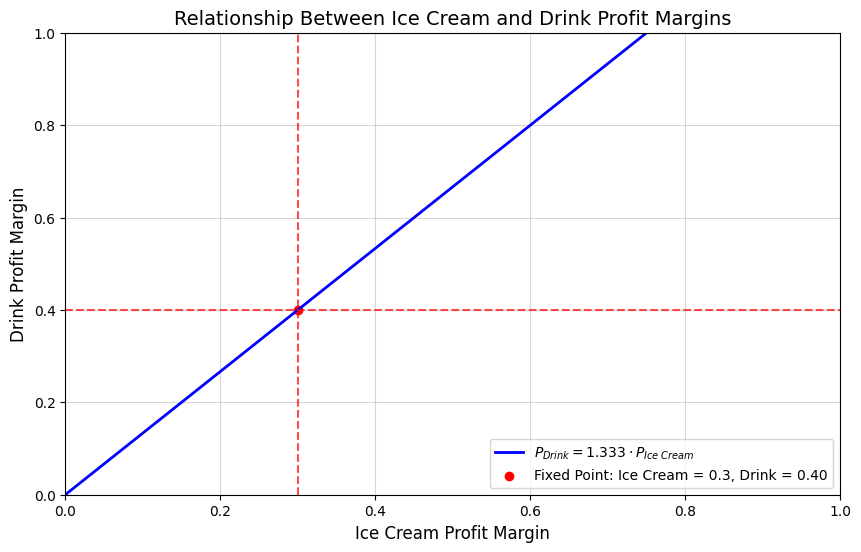

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the relationship
# P_drink = 1.333 * P_ice_cream
def drink_profit_margin(p_ice_cream):
    return 1.333 * p_ice_cream

# Step 2: Generate data
p_ice_cream_values = np.linspace(0, 1, 100)  # Ice Cream profit margins from 0 to 1
p_drink_values = drink_profit_margin(p_ice_cream_values)

# Step 3: Fixed Ice Cream profit margin
fixed_ice_cream_margin = 0.3
fixed_drink_margin = drink_profit_margin(fixed_ice_cream_margin)

# Step 4: Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(p_ice_cream_values, p_drink_values, label=r'$P_{Drink} = 1.333 \cdot P_{Ice\ Cream}$', color='blue', linewidth=2)

# Mark the fixed point
plt.scatter(fixed_ice_cream_margin, fixed_drink_margin, color='red', label=f'Fixed Point: Ice Cream = {fixed_ice_cream_margin}, Drink = {fixed_drink_margin:.2f}')
plt.axvline(x=fixed_ice_cream_margin, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=fixed_drink_margin, color='red', linestyle='--', alpha=0.7)

# Step 5: Add labels and title
plt.title("Relationship Between Ice Cream and Drink Profit Margins", fontsize=14)
plt.xlabel("Ice Cream Profit Margin", fontsize=12)
plt.ylabel("Drink Profit Margin", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Step 6: Display the graph
plt.show()


**Conclusion:**
Enhanced Business Recommendations with Data Insights
1. Focus on Ice Cream
Core Contribution: Ice Cream remains the cornerstone of the business, contributing the majority of both revenue (87.8%) and profit (81.2%).
Actionable Steps:
Expand the Ice Cream product line with premium offerings, such as Magnum Double Gold Caramel Billionaire, which has a solid profit margin (30%).
Focus on top-selling products like Cornetto Classico and Magnum Vegan Classic to sustain profitability.
Enhance procurement efficiency for key Ice Cream products, as they deliver consistent demand and profit.
2. Optimize Drinks
Profit Margins: Drinks like Coca-Cola and Pepsi yield a higher profit margin (50%) but contribute a smaller share of revenue and profit (12.2% and 18.8%, respectively).
Actionable Steps:
Bundle Drinks with Ice Cream to drive sales. For example, Coca-Cola could be paired with Cornetto Classico during promotions.
Introduce premium and health-conscious Drinks, such as Fanta Zero, to appeal to evolving customer preferences.
Reduce costs by negotiating better deals for bulk purchases of top-selling Drinks.
3. Balanced Manager Targets
Current Performance: Lily slightly outperforms Suzy in total profit (Lily: 1,225.67 vs. Suzy: 1,217.55), with a near-equal profit-sharing ratio (Lily: 50.17% vs. Suzy: 49.83%).
Actionable Steps:
Provide targeted training and resources to Suzy, especially in leveraging profitable items like Ice Cream and Drinks during promotions.
Encourage Lily to share her successful strategies for maximizing profits from Windy and Warm weather conditions, which are favorable for Ice Cream sales.
Data-Driven Insights for Strategies

**Procurement Strategies**

Ice Cream Procurement Focus:

*   Prioritize securing high-quality ingredients for bestselling products like Magnum and Cornetto.
Ensure uninterrupted supply of high-margin items such as Walls Feast Classic and Solero Exotic to capitalize on peak seasons.
Drink Cost Optimization:

*   Maximize the profitability of Coca-Cola and Pepsi by exploring cost-saving opportunities in sourcing or packaging.

**Sales Strategies**

Promote Ice Cream with Data-Driven Campaigns:

*   Leverage the dominance of Ice Cream during specific weather conditions (e.g., warm and sunny days).
Highlight premium features of top sellers like Magnum Double Gold and Magnum Vegan Classic in advertising campaigns.
Boost Drink Sales Through Bundling:

*   Create attractive combo offers (e.g., "Summer Refreshers" featuring Coca-Cola and Cornetto Classico) to cross-sell Drinks with Ice Cream.

**Manager-Specific Adjustments**

Support Suzy:

*   Focus on optimizing Suzy’s performance in Ice Cream sales (currently at 33.51%) to match Lily’s (47.69%).
Equip Suzy with tailored strategies for Windy and Rainy conditions, where her performance could improve.
Leverage Lily's Strengths:

*   Recognize Lily’s ability to perform well in varying weather conditions. Use her as a model to train Suzy in profit-maximizing strategies.
Profit Analysis and Sharing

**Profit Contributions by Managers:**

*   Both Lily and Suzy exhibit nearly equal contributions to total profit, indicating strong overall team performance.

Sharing Ratios:
*   Maintain the current profit-sharing balance (Lily: 50.17%, Suzy: 49.83%) while incentivizing Suzy to close the minor gap through targeted improvements.

***Summary of Key Recommendations***

*   Focus on Ice Cream as the primary growth driver by enhancing product lines and marketing.

*   Optimize Drink profitability through bundling, cost reductions, and premium offerings.

*   Balance manager performance with strategic training and resource allocation to Suzy, while reinforcing Lily's strengths.

*   Use weather and product data insights to align marketing campaigns and procurement with seasonal demand patterns.

By aligning these strategies with the provided data, the business can further solidify its market position, optimize profits, and maintain balanced team performance.

#**Reference**
* Kaplan, R.S. and Norton, D.P., 1992. The balanced scorecard: Measures that drive performance. Harvard Business Review, 70(1), pp.71–79.
* Kaplan, R.S. and Norton, D.P., 1996. Using the balanced scorecard as a strategic management system. Harvard Business Review, 74(1), pp.75–85.
* GoodsChecker. (n.d.). 10 Key Metrics FMCG Manufacturers Should Analyze This Year. Retrieved from GoodsChecker.com
* P S Gurskikh et al 2021 IOP Conf. Ser.: Earth Environ. Sci. 677 032076
* V. Jham, B. Gupta, P. Garg, CASES IN MANAGEMENT: INDIAN AND INTERNATIONAL PERSPECTIVES, pp. 275-280, Biztantra, 2009